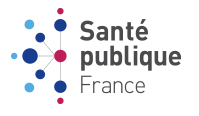

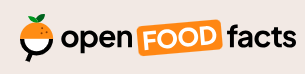

In [1]:
# add notebook summary
import jyquickhelper as jqh
from jyquickhelper import add_notebook_menu
add_notebook_menu(menu_id='OCDA_P3_N2_menu', raw=False, format='html',
                  header="NOTEBOOK 2 SUMMARY - Exploratory analysis", first_level=1, last_level=5, keep_item=None)

# Introduction - Load packages and check versions

In [2]:
# import librairies and functions needed for project
import json
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import scipy.stats as st
import scikit_posthocs as sp
import seaborn as sns
import seaborn.objects as so
import sklearn
import sys
import warnings
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

# import user-defined functions
from functions import *

# extract colors from school logo for ppt slideshow
ciel = findColor('light_blue.png')
cyan = findColor('dark_blue.png')
fuchsia = findColor('fuchsia.png')
zest = findColor('zest.png')
sap = findColor('pale_green.png')
leaf = findColor('dark_green.png')
col_A = findColor('nutri_A.png')
col_B = findColor('nutri_B.png')
col_C = findColor('nutri_C.png')
col_D = findColor('nutri_D.png')
col_E = findColor('nutri_E.png')


nutri_palette = [col_A, col_B, col_C, col_D, col_E]
viridis_sample = ['#481567FF','#453781FF','#39568CFF','#2D708EFF','#238A8DFF','#20A387FF','#3CBB75FF', '#73D055FF','#B8DE29FF']

print("ciel hex :", ciel)
print("cyan hex :", cyan)
print("fuchsia hex :", fuchsia)
print("zest hex :", zest)
print("pale green hex :", sap)
print("dark green hex :", leaf)
print("col A hex :", col_A)
print("col B hex :", col_B)
print("col C hex :", col_C)
print("col D hex :", col_D)
print("col E hex :", col_E)

# set dataframe display options
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)

# silence warnings after checking
pd.set_option('future.no_silent_downcasting', False)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

ciel hex : #50ace2
cyan hex : #193e90
fuchsia hex : #be1b57
zest hex : #ff8c14
pale green hex : #00961e
dark green hex : #00641e
col A hex : #00803d
col B hex : #86bc25
col C hex : #ffcc00
col D hex : #ef7d00
col E hex : #e53312


In [3]:
# check package versions
print("Packages versions : \n")
print("json -", json.__version__)
print("jyquickhelper -", jqh.__version__)
print("matplotlib -", mpl.__version__)
print("missingno -", msno.__version__)
print("numpy -", np.__version__)
print("pandas -", pd.__version__)
print("seaborn -", sns.__version__)
print("sklearn -", sklearn.__version__)
print("python -", sys.version[0:6])

Packages versions : 

json - 2.0.9
jyquickhelper - 0.4.220
matplotlib - 3.5.2
missingno - 0.4.1
numpy - 1.26.4
pandas - 2.2.2
seaborn - 0.13.2
sklearn - 1.0.2
python - 3.9.13


In [4]:
# !pip install seaborn --upgrade

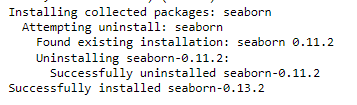

# 1. Load data

In [5]:
food_facts = pd.read_csv('data_trim.csv', encoding="utf-8", low_memory=False)
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68365 entries, 0 to 68364
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   fiber_100g                               33041 non-null  float64
 1   labels                                   35258 non-null  object 
 2   stores                                   42343 non-null  object 
 3   generic_name                             43335 non-null  object 
 4   purchase_places                          46925 non-null  object 
 5   nutrition-score-fr_100g                  50384 non-null  float64
 6   nutrition-score-uk_100g                  50384 non-null  float64
 7   nutrition_grade_fr                       50384 non-null  object 
 8   saturated-fat_100g                       51424 non-null  float64
 9   sugars_100g                              51625 non-null  float64
 10  sodium_100g                              51776

- Some columns have incorrect data types, typecasting will be addressed after NaNs.

In [6]:
food_facts.describe()

fiber_100g  nutrition-score-fr_100g  nutrition-score-uk_100g  \
count  33041.000000             50384.000000             50384.000000   
mean       2.717947                 8.324547                 7.868371   
std        3.936105                 9.183438                 9.669906   
min        0.000000               -15.000000               -15.000000   
25%        0.350000                 1.000000                 0.000000   
50%        1.600000                 8.000000                 6.000000   
75%        3.500000                15.000000                16.000000   
max       94.800000                40.000000                35.000000   

       saturated-fat_100g   sugars_100g   sodium_100g     salt_100g  \
count        51424.000000  51625.000000  51776.000000  51781.000000   
mean             5.423919     13.077669      0.346172      0.879198   
std              8.521886     18.675721      1.041034      2.644351   
min              0.000000     -0.100000      0.000000      0.000000   
25%              0.200000      1.000000      0.020000      0.050800   
50%              1.800000      4.200000      0.196850      0.500000   
75%              7.500000     16.000000      0.472441      1.200000   
max            210.000000    134.000000    117.165354    297.600000   

       carbohydrates_100g      fat_100g  proteins_100g   energy_100g  \
count        52027.000000  52442.000000   54309.000000  54781.000000   
mean            27.362090     13.540398       7.487107   1091.474459   
std             27.393978     17.735371       7.319530    814.448379   
min              0.000000      0.000000       0.000000      0.000000   
25%              4.000000      1.000000       1.500000    369.000000   
50%             13.800000      6.165000       5.840000    991.000000   
75%             53.000000     22.000000      10.600000   1645.000000   
max            190.000000    380.000000      86.000000  22000.000000   

       ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n  \
count                             57797.000000                 57797.000000   
mean                                  0.131131                     0.056906   
std                                   0.431219                     0.235223   
min                                   0.000000                     0.000000   
25%                                   0.000000                     0.000000   
50%                                   0.000000                     0.000000   
75%                                   0.000000                     0.000000   
max                                   5.000000                     2.000000   

        additives_n  
count  57797.000000  
mean       1.761476  
std        2.501255  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        3.000000  
max       31.000000

# 2. Select dependant and independant variables

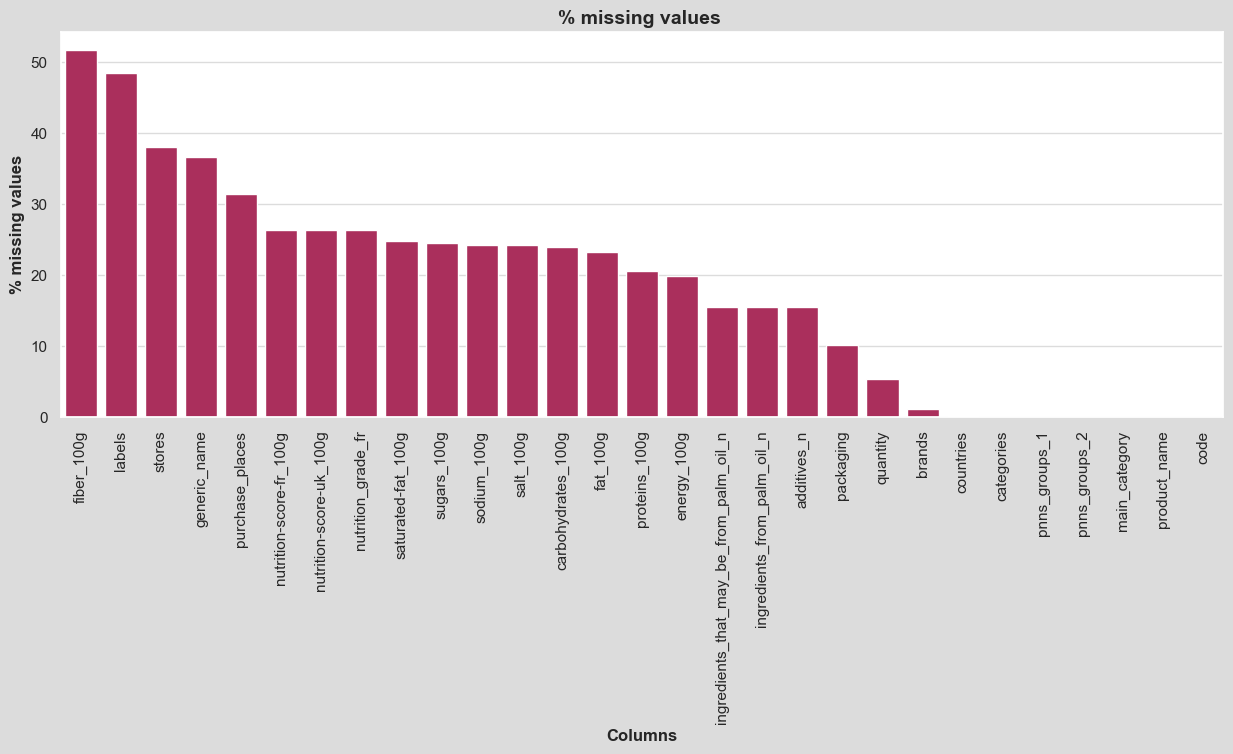

In [7]:
# plot % of missing values
food_facts_nulls = pd.DataFrame(food_facts.isnull().mean() * 100).sort_values(by=[0], ascending=False).reset_index()
food_facts_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)
sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_1 = sns.barplot(data = food_facts_nulls, x='Column', y='% missing values', color=fuchsia)
plt.title('% missing values ', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("graph_1.png", bbox_inches='tight')

<AxesSubplot:>

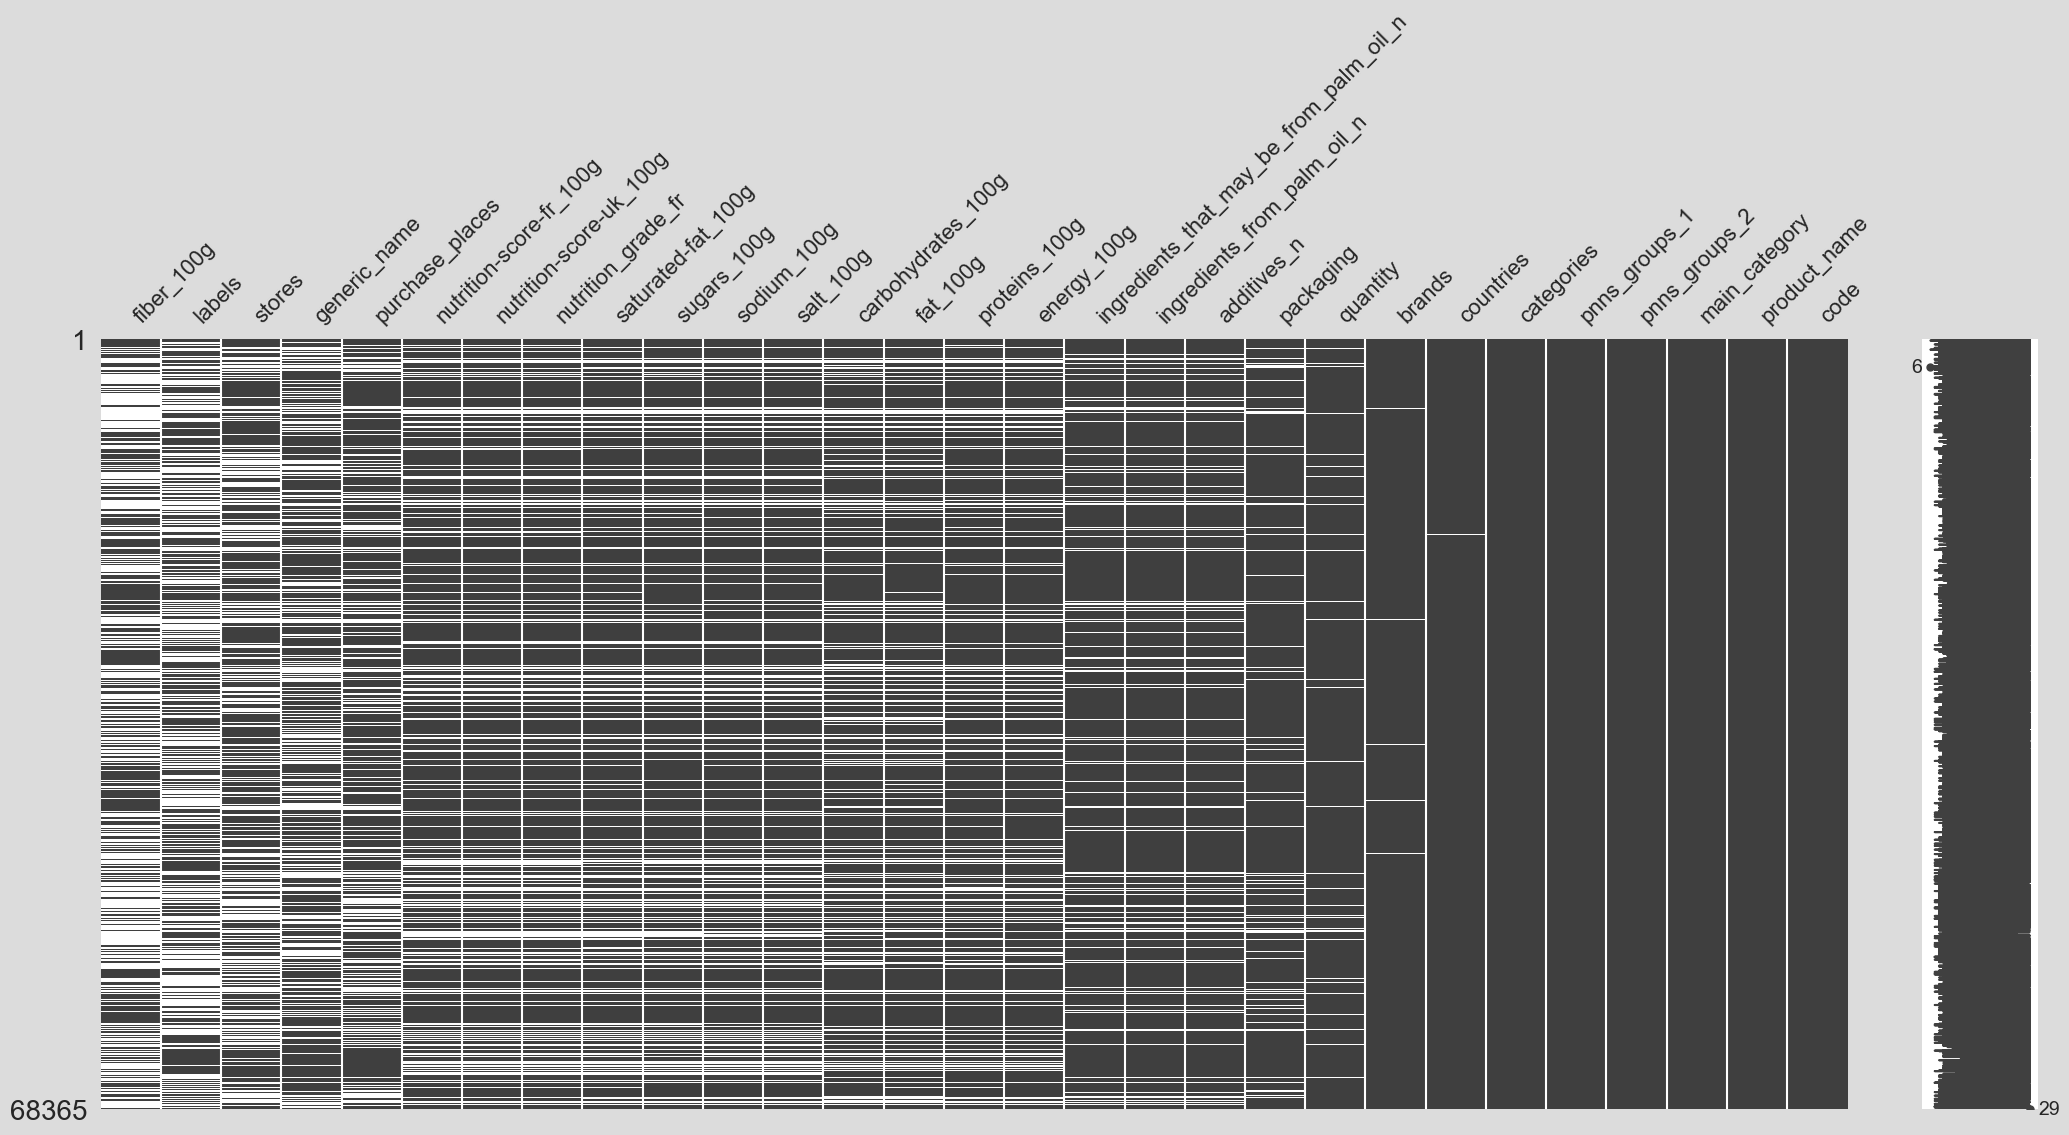

In [8]:
msno.matrix(food_facts)

In [9]:
food_facts.sample(axis=0, n=5)

fiber_100g                           labels        stores  \
26178         NaN                              NaN  Leader Price   
6328          9.9                              NaN           NaN   
35672         NaN  Bio européen,FR-BIO-01,AB,Vegan           NaN   
46534         NaN   Point Vert,Produit en Bretagne     Carrefour   
59547         NaN                              NaN           NaN   

                                                                                                                                                          generic_name  \
26178  6 cônes garnis de glace saveur cannelle et de glace saveur crème, chemisage au cacao maigre, coeur de génoise goût spéculoos et brisures de spéculoos, surgelés   
6328                                                                                                                                                               NaN   
35672                                                                                                                                                              NaN   
46534                                                                                                                                                              NaN   
59547                                                                                                                                                              NaN   

      purchase_places  nutrition-score-fr_100g  nutrition-score-uk_100g  \
26178     Bron,France                     18.0                     18.0   
6328              NaN                     15.0                     15.0   
35672             NaN                     11.0                     19.0   
46534   Rennes,France                      5.0                      5.0   
59547             NaN                      NaN                      NaN   

      nutrition_grade_fr  saturated-fat_100g  sugars_100g  sodium_100g  \
26178                  d                 9.3         28.0     0.086614   
6328                   d                 9.7         22.4     0.185039   
35672                  d                15.0          0.0     0.000000   
46534                  c                 5.9          0.9     0.275591   
59547                NaN                 NaN          NaN          NaN   

       salt_100g  carbohydrates_100g  fat_100g  proteins_100g  energy_100g  \
26178       0.22                38.8      10.8            2.9       1116.0   
6328        0.47                 NaN       NaN            7.8       1933.0   
35672       0.00                 0.0      90.0            0.0       3330.0   
46534       0.70                 2.5      12.2           15.1        756.0   
59547        NaN                 NaN       NaN            NaN          NaN   

       ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n  \
26178                                      1.0                          1.0   
6328                                       NaN                          NaN   
35672                                      0.0                          0.0   
46534                                      0.0                          0.0   
59547                                      NaN                          NaN   

       additives_n                    packaging quantity          brands  \
26178          9.0               Carton,Surgelé    396 g    Leader Price   
6328           NaN                          NaN    750 g      Knusperone   
35672          0.0              Bouteille,Verre    50 cl     Bio Planete   
46534          0.0  Bocal,Verre,Couvercle,Métal    100 g  Groix & Nature   
59547          NaN                          NaN      NaN          Migros   

      countries  \
26178    France   
6328     France   
35672    France   
46534    France   
59547    Suisse   

                                                                                                  categories  \
26178                                       Desserts,

In [10]:
# nutrition_grade_fr is our categorical variable of choice here. Its likely determinants are the nutritional composition
# of the food products (including the presence of palm oil and additives)
# remove all lines where nutriscore is missing
food_facts_trim = food_facts.loc[food_facts['nutrition_grade_fr'].isna() == False]
food_facts_trim.shape

(50384, 29)

# 3. Identify & address missing values

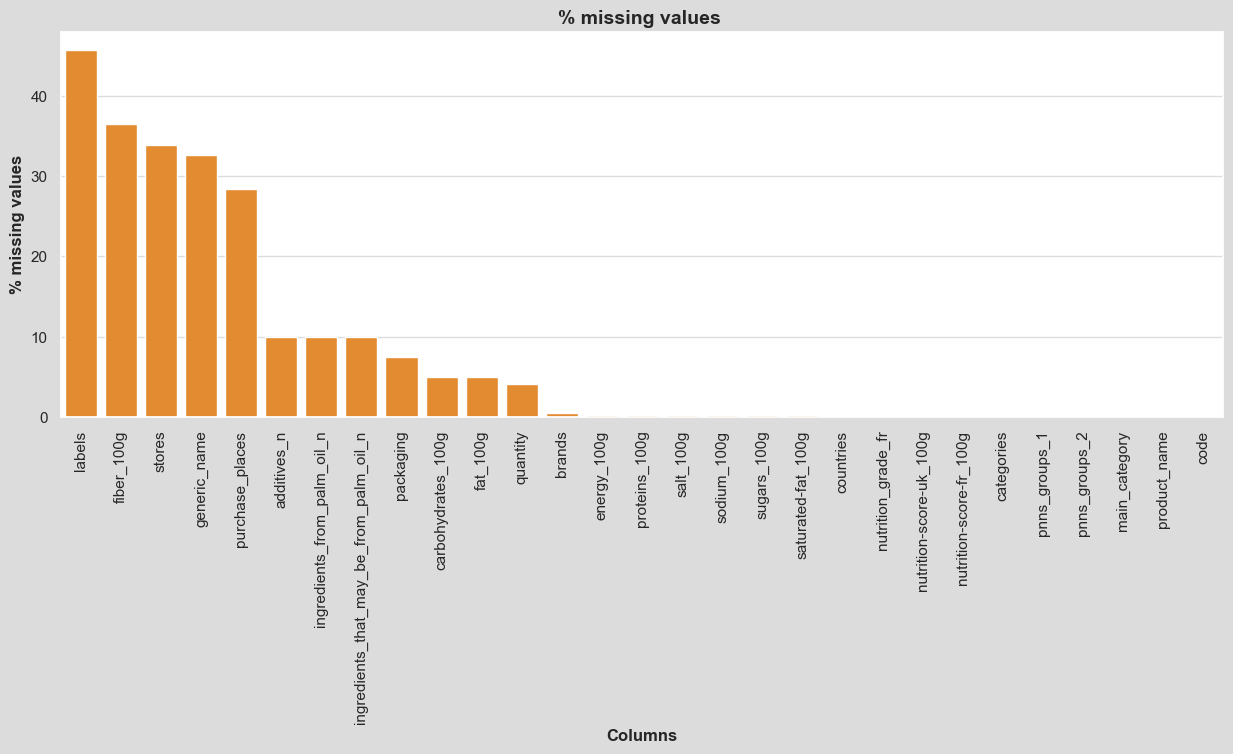

In [11]:
# plot % of missing values
food_facts_trim_nulls = pd.DataFrame(food_facts_trim.isnull().mean() * 100).sort_values(by=[0], ascending=False).reset_index()
food_facts_trim_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)
sns.set(rc={'figure.figsize':(15, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_1 = sns.barplot(data = food_facts_trim_nulls, x='Column', y='% missing values', color=zest)
plt.title('% missing values ', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("graph_2.png", bbox_inches='tight')

In [12]:
# columns labels, stores, generic_name, purchase_places, packaging, quantity and brands are unlikely to inform our analysis
# and contain a significant number of missing values. We take them out, as well as countries, categories and main_category
# and reorder the remaining columns.
food_facts_trim = food_facts_trim.drop(columns=['labels',  'stores' ,  'generic_name', 'purchase_places', 'packaging', 
                                                'quantity', 'brands', 'countries', 'categories','main_category'])[[ 'code', 
                                                                                                                   'product_name',
                                                                                                                   'pnns_groups_1',
                                                                                                                   'pnns_groups_2',
                                                                                                                    'energy_100g',
                                                                                                                   'proteins_100g',
                                                                                                                   'carbohydrates_100g', 
                                                                                                                   'sugars_100g',
                                                                                                                   'fat_100g',
                                                                                                                   'saturated-fat_100g',
                                                                                                                   'salt_100g', 
                                                                                                                   'sodium_100g',
                                                                                                                   'fiber_100g',
                                                                                                                   'ingredients_that_may_be_from_palm_oil_n', 
                                                                                                                   'ingredients_from_palm_oil_n',
                                                                                                                   'additives_n',
                                                                                                                   'nutrition_grade_fr',
                                                                                                                   'nutrition-score-fr_100g',
                                                                                                                   'nutrition-score-uk_100g']]

<AxesSubplot:>

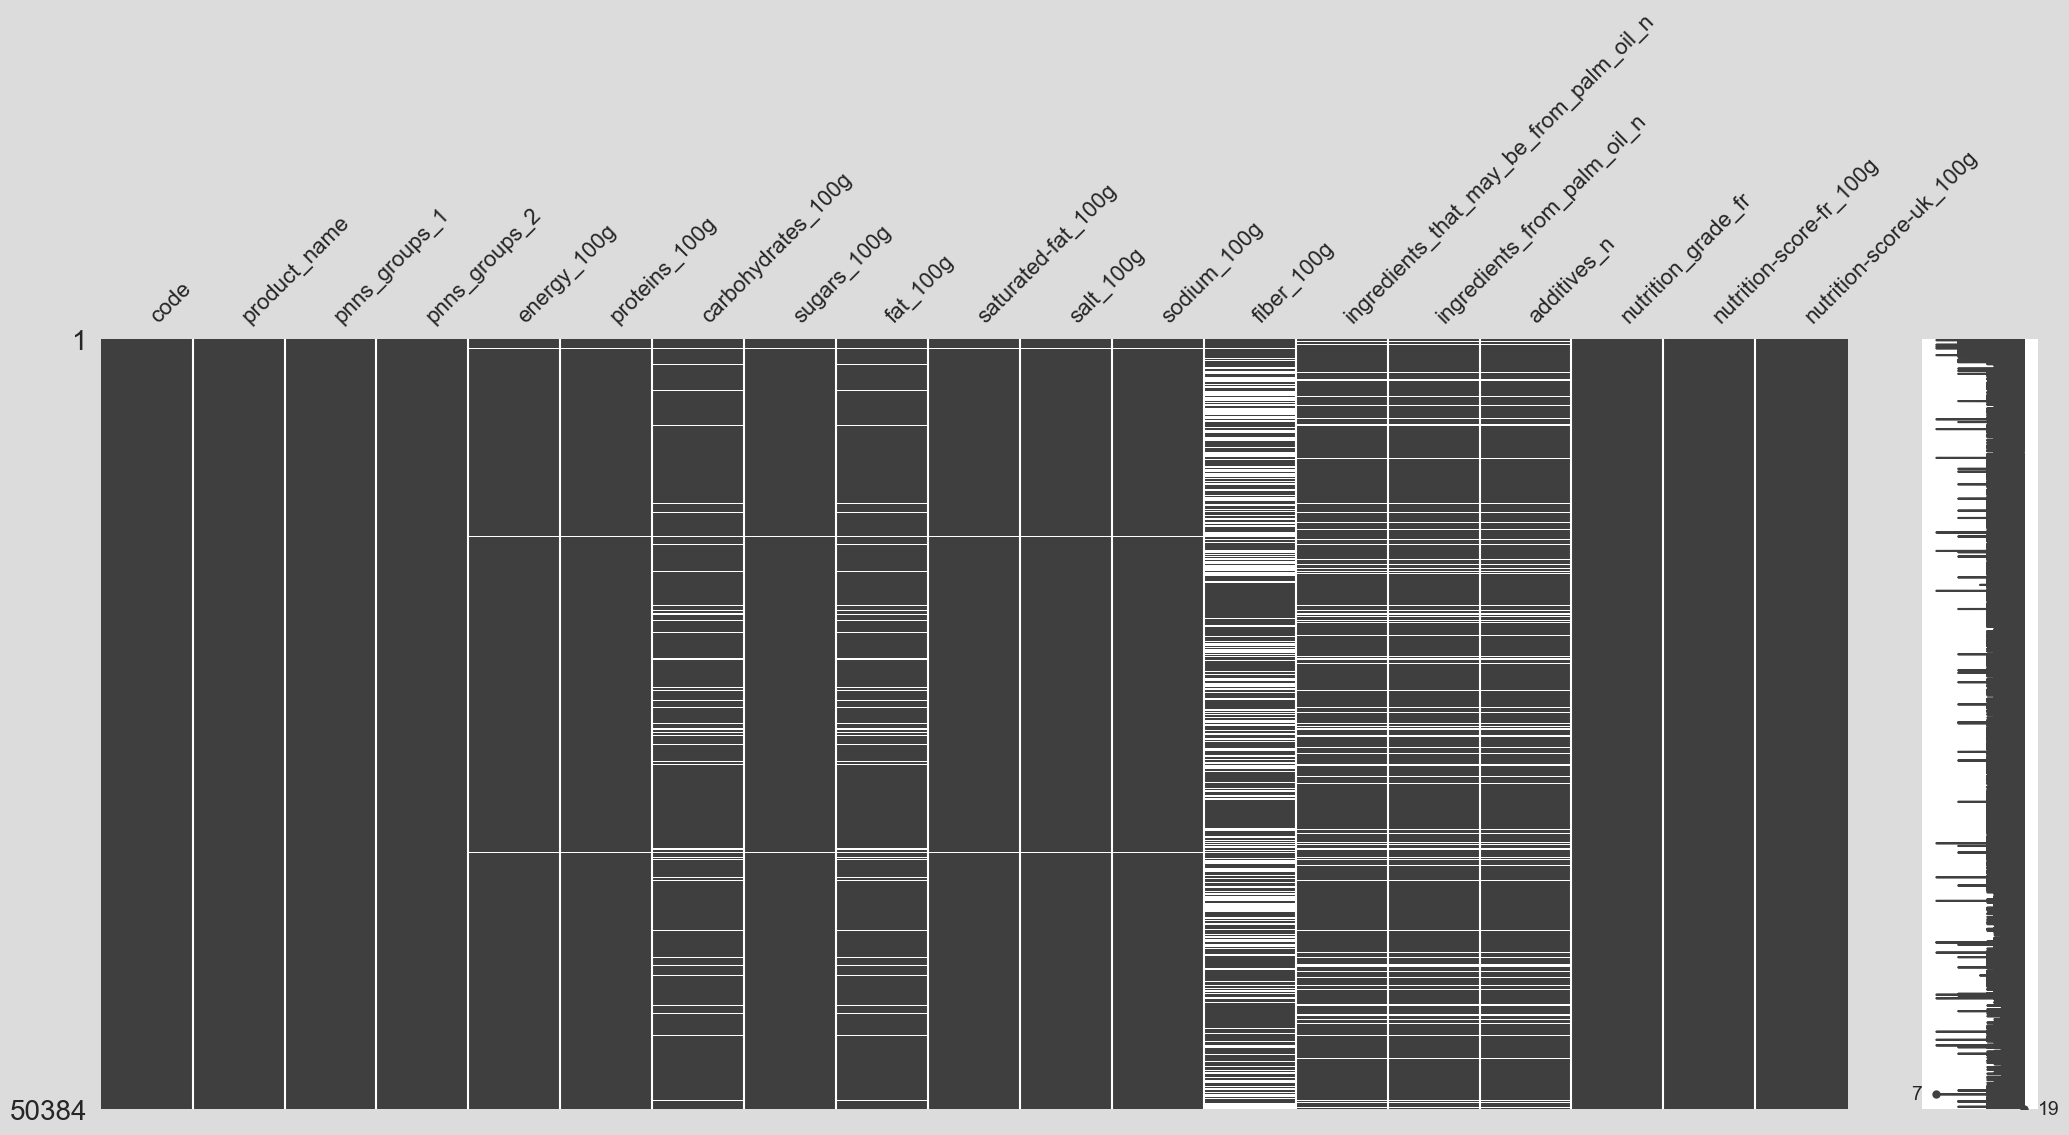

In [13]:
msno.matrix(food_facts_trim)

- 6071 imputations were made.

## 3.1- ingredients_that_may_be_from_palm_oil_n and ingredients_from_palm_oil_n columns

- Palm oil is a fat, so we set these 2 columns to 0 where the total fat content of the product is also 0.

In [14]:
print(food_facts_trim['ingredients_that_may_be_from_palm_oil_n'].isna().sum())
print(food_facts_trim['ingredients_from_palm_oil_n'].isna().sum())

5013
5013


In [15]:
food_facts_trim.loc[(food_facts_trim['fat_100g'] == 0) 
                    & (food_facts_trim['ingredients_that_may_be_from_palm_oil_n'].isna()),
                    'ingredients_that_may_be_from_palm_oil_n'] = 0
food_facts_trim.loc[(food_facts_trim['fat_100g'] == 0) 
                    & (food_facts_trim['ingredients_from_palm_oil_n'].isna()), 'ingredients_from_palm_oil_n'] = 0

In [16]:
print(food_facts_trim['ingredients_that_may_be_from_palm_oil_n'].isna().sum())
print(food_facts_trim['ingredients_from_palm_oil_n'].isna().sum())


4669
4669


- 344 imputations were made.

## 3.2 - energy_100g column

- Lines where energy_100g is missing are also missing proteins_100g, carbohydrates_100g and fat_100g. Energy_100g cannot be calculated for these lines so we remove them.

In [17]:
nutri_nulls = food_facts_trim.loc[(food_facts_trim['proteins_100g'].isna() == True) 
                                       & (food_facts_trim['carbohydrates_100g'].isna() == True)
                                      &(food_facts_trim['fat_100g'].isna() == True)]
nutri_nulls.shape

(113, 19)

In [18]:
list_nutri_nulls = nutri_nulls['code'].tolist()
len(list_nutri_nulls)

113

In [19]:
food_facts_trim = food_facts_trim.loc[food_facts_trim['code'].isin(list_nutri_nulls) == False]
food_facts_trim.shape

(50271, 19)

- 113 lines were removed.

In [20]:
# check for remaining NaNs
food_facts_trim['energy_100g'].isna().sum()

0

## 3.3 - fiber_100g column

In [21]:
food_facts_trim.loc[food_facts_trim['fiber_100g'].isna()]['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks              3789
Milk and dairy products    3681
Fish Meat Eggs             2959
Beverages                  1986
Composite foods            1764
Fat and sauces             1672
Cereals and potatoes        974
Fruits and vegetables       784
Salty snacks                627
Name: count, dtype: int64

- Products of animal origin typically have no fiber. NaNs are filled with 0 for these pnns_groups_1 (Milk and dairy products and  Fish Meat Eggs)

In [22]:
food_facts_trim.loc[(food_facts_trim['pnns_groups_1'] == "Milk and dairy products") 
                    & (food_facts_trim['fiber_100g'].isna()), 'fiber_100g'] = 0
food_facts_trim.loc[(food_facts_trim['pnns_groups_1'] == "Fish Meat Eggs") 
                    & (food_facts_trim['fiber_100g'].isna()), 'fiber_100g'] = 0

In [23]:
food_facts_trim.loc[food_facts_trim['fiber_100g'].isna()]['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks            3789
Beverages                1986
Composite foods          1764
Fat and sauces           1672
Cereals and potatoes      974
Fruits and vegetables     784
Salty snacks              627
Name: count, dtype: int64

- 6640 imputations were made.

In [24]:
food_facts_trim.loc[(food_facts_trim['pnns_groups_1'] == 'Beverages') & food_facts_trim['fiber_100g'].isna()
                   ]['pnns_groups_2'].value_counts()

pnns_groups_2
Sweetened beverages                 755
Non-sugared beverages               561
Fruit juices                        475
Fruit nectars                       109
Artificially sweetened beverages     86
Name: count, dtype: int64

- In the beverages category, only Fruit juices and Fruit nectars may contain residual fiber. We set the fiber value to 0 for other categories of beverages (Sweetened beverages, Non-sugared beverages and Artificially sweetened beverages).

In [25]:
food_facts_trim.loc[(food_facts_trim['pnns_groups_2'] == "Sweetened beverages") 
                    & (food_facts_trim['fiber_100g'].isna()), 'fiber_100g'] = 0
food_facts_trim.loc[(food_facts_trim['pnns_groups_2'] == "Non-sugared beverages") 
                    & (food_facts_trim['fiber_100g'].isna()), 'fiber_100g'] = 0
food_facts_trim.loc[(food_facts_trim['pnns_groups_2'] == "Artificially sweetened beverages") 
                    & (food_facts_trim['fiber_100g'].isna()), 'fiber_100g'] = 0

In [26]:
food_facts_trim.loc[(food_facts_trim['pnns_groups_1'] == 'Beverages') & food_facts_trim['fiber_100g'].isna()
                   ]['pnns_groups_2'].value_counts()

pnns_groups_2
Fruit juices     475
Fruit nectars    109
Name: count, dtype: int64

- 1402 imputations were made.

In [27]:
food_facts_trim.loc[food_facts_trim['fiber_100g'].isna()]['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks            3789
Composite foods          1764
Fat and sauces           1672
Cereals and potatoes      974
Fruits and vegetables     784
Salty snacks              627
Beverages                 584
Name: count, dtype: int64

## 3.4 - fat_100g column

In [28]:
food_facts_trim.loc[food_facts_trim['fat_100g'].isna()]['pnns_groups_1'].value_counts()

pnns_groups_1
Beverages                  662
Sugary snacks              396
Cereals and potatoes       261
Milk and dairy products    234
Fish Meat Eggs             204
Fruits and vegetables      199
Fat and sauces             192
Composite foods            147
Salty snacks                79
Name: count, dtype: int64

In [29]:
food_facts_trim.loc[(food_facts_trim['fat_100g'].isna()) 
                    & (food_facts_trim['pnns_groups_1'] == 'Beverages')]['pnns_groups_2'].value_counts()

pnns_groups_2
Non-sugared beverages               295
Fruit juices                        232
Sweetened beverages                 104
Fruit nectars                        30
Artificially sweetened beverages      1
Name: count, dtype: int64

- Non-dairy beverages typically contain no fat. We replace NaNs with 0 for all beverages.

In [30]:
food_facts_trim.loc[(food_facts_trim['pnns_groups_1'] == "Beverages") 
                    & (food_facts_trim['fat_100g'].isna()), 'fat_100g'] = 0

In [31]:
food_facts_trim.loc[food_facts_trim['fat_100g'].isna()]['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks              396
Cereals and potatoes       261
Milk and dairy products    234
Fish Meat Eggs             204
Fruits and vegetables      199
Fat and sauces             192
Composite foods            147
Salty snacks                79
Name: count, dtype: int64

- 662 imputations were made.

## 3.5- carbohydrates_100g column

- **Advice for calories counting and diabetes management:**
On Nutrition Facts food labels, the grams of dietary fiber are already included in the total carbohydrate count. But because fiber is a type of carbohydrate that your body can’t digest, it does not affect your blood sugar levels. You should subtract the grams of fiber from the total carbohydrate.
Source: https://dtc.ucsf.edu/living-with-diabetes/diet-and-nutrition/understanding-carbohydrates/counting-carbohydrates/learning-to-read-labels/understanding-fiber/#:~:text=On%20Nutrition%20Facts%20food%20labels,fiber%20from%20the%20total%20carbohydrate.

In [32]:
food_facts_trim.loc[food_facts_trim['carbohydrates_100g'].isna()]['pnns_groups_1'].value_counts()

pnns_groups_1
Beverages                  648
Sugary snacks              393
Milk and dairy products    285
Cereals and potatoes       247
Fat and sauces             214
Fish Meat Eggs             213
Fruits and vegetables      187
Composite foods            150
Salty snacks                82
Name: count, dtype: int64

- For columns where carbohydrates_100g is missing but sugars_100g AND fiber_100g are known, replace the NaNs in carbohydrates_100g with the sum of sugars_100g AND fiber_100g for pnns_groups Beverages, Milk and dairy products and Fish Meat Eggs, as they typically do not contain any complex carbohydrates in addition to sugars and fiber.

In [33]:
food_facts_trim.loc[(food_facts_trim['sugars_100g'].isna() == False) & (food_facts_trim['fiber_100g'].isna() == False) 
                    & (food_facts_trim['carbohydrates_100g'].isna()) 
                    & food_facts_trim['pnns_groups_1'].isin(['Beverages','Milk and dairy products', 'Fish Meat Eggs']),
                    'carbohydrates_100g'] = (food_facts_trim['sugars_100g'] + food_facts_trim['fiber_100g'])

In [34]:
food_facts_trim.loc[food_facts_trim['carbohydrates_100g'].isna()]['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks            393
Cereals and potatoes     247
Fat and sauces           214
Fruits and vegetables    187
Composite foods          150
Salty snacks              82
Name: count, dtype: int64

- 1146 imputations were made

## 3.6- Fill remaining NaNs with iterative imputer

<AxesSubplot:>

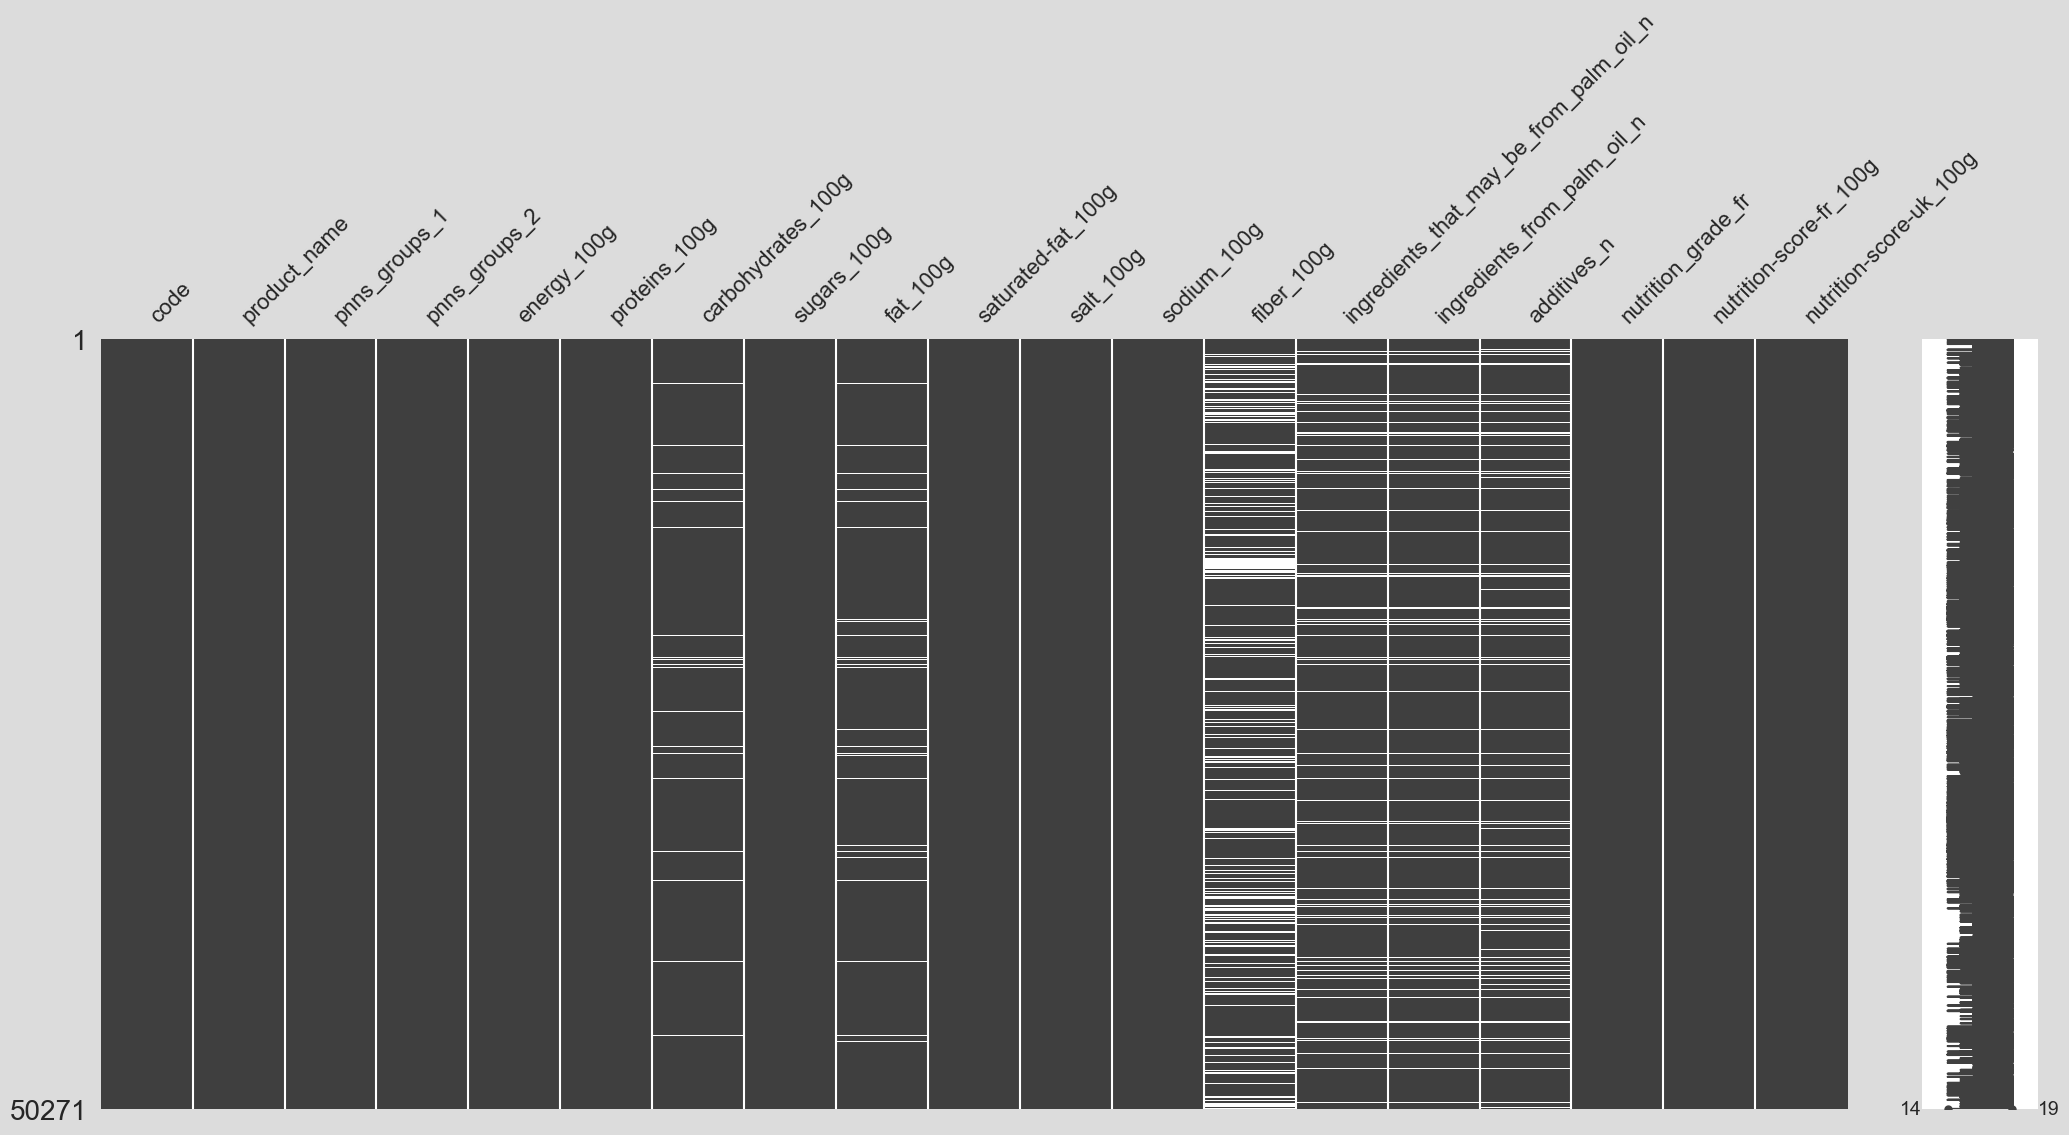

In [35]:
msno.matrix(food_facts_trim)

In [36]:
print(food_facts_trim.isna().sum().sum(), " NaNs still need imputing. Details : \n")
food_facts_trim.isna().sum()

27461  NaNs still need imputing. Details : 



code                                           0
product_name                                   0
pnns_groups_1                                  0
pnns_groups_2                                  0
energy_100g                                    0
proteins_100g                                  0
carbohydrates_100g                          1273
sugars_100g                                    0
fat_100g                                    1712
saturated-fat_100g                             0
salt_100g                                      0
sodium_100g                                    0
fiber_100g                                 10194
ingredients_that_may_be_from_palm_oil_n     4646
ingredients_from_palm_oil_n                 4646
additives_n                                 4990
nutrition_grade_fr                             0
nutrition-score-fr_100g                        0
nutrition-score-uk_100g                        0
dtype: int64

In [37]:
# category columns
food_facts_trim['pnns_groups_1'] = food_facts_trim['pnns_groups_1'].astype('category')
food_facts_trim['pnns_groups_2'] = food_facts_trim['pnns_groups_2'].astype('category')
food_facts_trim['nutrition_grade_fr'] = food_facts_trim['nutrition_grade_fr'].str.upper().astype('category')

# string columns
food_facts_trim['code'] = food_facts_trim['code'].astype('string')
food_facts_trim['product_name'] = food_facts_trim['product_name'].astype('string')

# integer columns
food_facts_trim['energy_100g'] = food_facts_trim['energy_100g'].astype(int, errors='ignore')
food_facts_trim['nutrition-score-fr_100g'] = food_facts_trim['nutrition-score-fr_100g'].astype(int, errors='ignore')
food_facts_trim['nutrition-score-uk_100g'] = food_facts_trim['nutrition-score-uk_100g'].astype(int, errors='ignore')

In [38]:
food_facts_ii = IterativeImputer(missing_values=np.nan, max_iter=10, tol=0.001, n_nearest_features=None,
                                 initial_strategy='mean', imputation_order='ascending',
                                 skip_complete=False,  verbose=1, random_state=42, add_indicator=False)

In [39]:
X = food_facts_trim.select_dtypes(include='number')

In [40]:
imputed = food_facts_ii.fit_transform(X)

[IterativeImputer] Completing matrix with shape (50271, 14)
[IterativeImputer] Change: 262.34439059487687, scaled tolerance: 22.0 
[IterativeImputer] Change: 78.62507582839748, scaled tolerance: 22.0 
[IterativeImputer] Change: 52.147937329560534, scaled tolerance: 22.0 
[IterativeImputer] Change: 35.260501541032944, scaled tolerance: 22.0 
[IterativeImputer] Change: 23.807840265327137, scaled tolerance: 22.0 
[IterativeImputer] Change: 16.066426683584734, scaled tolerance: 22.0 
[IterativeImputer] Early stopping criterion reached.


In [41]:
food_facts_trim_imputed = pd.DataFrame(imputed, columns=X.columns)
food_facts_trim_imputed.head()

energy_100g  proteins_100g  carbohydrates_100g  sugars_100g  fat_100g  \
0       1210.0          22.00               23.00        0.000     12.00   
1       1090.0           3.33               38.70       24.700     10.70   
2        478.0           5.36                7.86        0.714      6.79   
3       2257.0           4.70               53.80       51.500     33.30   
4       1284.0           3.90               54.20       44.000      7.00   

   saturated-fat_100g  salt_100g  sodium_100g  fiber_100g  \
0                7.00   2.160000     0.850000    2.000000   
1                2.00   0.647000     0.255000    2.000000   
2                2.86   0.499000     0.196000    0.357000   
3               21.10   0.090000     0.035433    2.332528   
4                3.60   0.199898     0.078700    4.700000   

   ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n  \
0                                      0.0                          0.0   
1                                      0.0                          0.0   
2                                      0.0                          0.0   
3                                      0.0                          0.0   
4                                      0.0                          0.0   

   additives_n  nutrition-score-fr_100g  nutrition-score-uk_100g  
0          0.0                      6.0                      6.0  
1          5.0                      9.0                      9.0  
2          3.0                      2.0                      2.0  
3          3.0                     26.0                     26.0  
4          5.0                     10.0                     10.0

In [42]:
food_facts_trim_imputed.shape

(50271, 14)

In [43]:
X_2 = food_facts_trim.select_dtypes(exclude='number').reset_index()

In [44]:
X_2.head()

index           code                  product_name          pnns_groups_1  \
0      0  0000000290616                  Salade Cesar  Fruits and vegetables   
1      3  0000001938067  Chaussons tressés aux pommes          Sugary snacks   
2      6  0000008237798               Quiche Lorraine        Composite foods   
3      9  0000020424640            Belgische Pralinen          Sugary snacks   
4     10  0000027533048      Luxury Christmas Pudding          Sugary snacks   

           pnns_groups_2 nutrition_grade_fr  
0             Vegetables                  C  
1     Biscuits and cakes                  C  
2  Pizza pies and quiche                  B  
3                 Sweets                  E  
4     Biscuits and cakes                  C

In [45]:
X_2.shape

(50271, 6)

In [46]:
food_facts_trim_final = X_2.join(food_facts_trim_imputed).drop(['index'], axis=1)
food_facts_trim_final.head()

code                  product_name          pnns_groups_1  \
0  0000000290616                  Salade Cesar  Fruits and vegetables   
1  0000001938067  Chaussons tressés aux pommes          Sugary snacks   
2  0000008237798               Quiche Lorraine        Composite foods   
3  0000020424640            Belgische Pralinen          Sugary snacks   
4  0000027533048      Luxury Christmas Pudding          Sugary snacks   

           pnns_groups_2 nutrition_grade_fr  energy_100g  proteins_100g  \
0             Vegetables                  C       1210.0          22.00   
1     Biscuits and cakes                  C       1090.0           3.33   
2  Pizza pies and quiche                  B        478.0           5.36   
3                 Sweets                  E       2257.0           4.70   
4     Biscuits and cakes                  C       1284.0           3.90   

   carbohydrates_100g  sugars_100g  fat_100g  saturated-fat_100g  salt_100g  \
0               23.00        0.000     12.00                7.00   2.160000   
1               38.70       24.700     10.70                2.00   0.647000   
2                7.86        0.714      6.79                2.86   0.499000   
3               53.80       51.500     33.30               21.10   0.090000   
4               54.20       44.000      7.00                3.60   0.199898   

   sodium_100g  fiber_100g  ingredients_that_may_be_from_palm_oil_n  \
0     0.850000    2.000000                                      0.0   
1     0.255000    2.000000                                      0.0   
2     0.196000    0.357000                                      0.0   
3     0.035433    2.332528                                      0.0   
4     0.078700    4.700000                                      0.0   

   ingredients_from_palm_oil_n  additives_n  nutrition-score-fr_100g  \
0                          0.0          0.0                      6.0   
1                          0.0          5.0                      9.0   
2                          0.0          3.0                      2.0   
3                          0.0          3.0                     26.0   
4                          0.0          5.0                     10.0   

   nutrition-score-uk_100g  
0                      6.0  
1                      9.0  
2                      2.0  
3                     26.0  
4                     10.0

<AxesSubplot:>

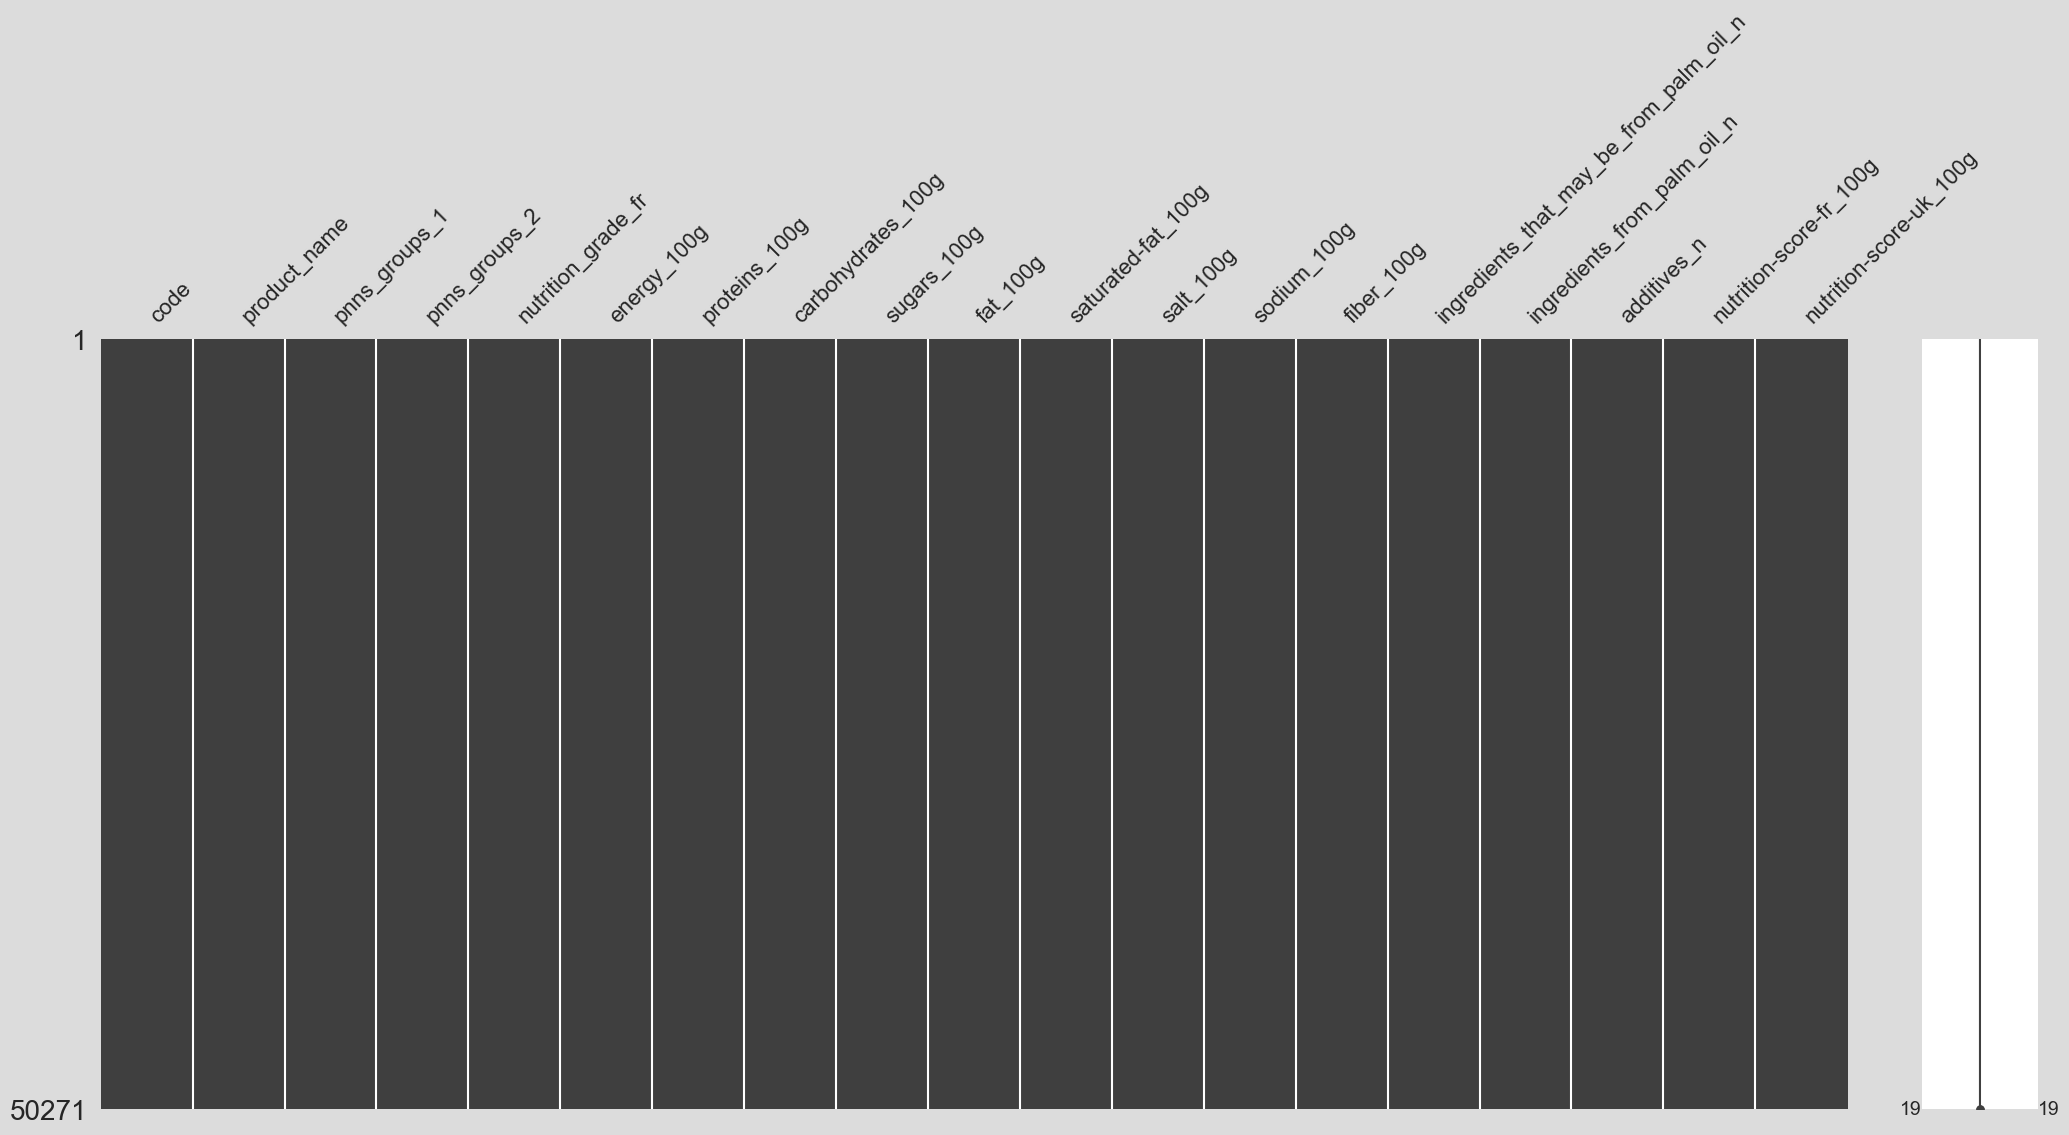

In [47]:
msno.matrix(food_facts_trim_final)

In [48]:
food_facts_trim_final.isna().sum().sum()

0

In [49]:
food_facts_trim_final.describe()

energy_100g  proteins_100g  carbohydrates_100g   sugars_100g  \
count  50271.000000   50271.000000        50271.000000  50271.000000   
mean    1102.535796       7.496233           27.361084     12.962259   
std      812.140023       7.271457           27.209185     18.500438   
min        0.000000       0.000000          -58.900519     -0.100000   
25%      385.000000       1.600000            4.100000      1.000000   
50%     1005.000000       5.900000           14.000000      4.100000   
75%     1664.000000      10.500000           52.900000     16.000000   
max    22000.000000      86.000000          190.000000    134.000000   

           fat_100g  saturated-fat_100g     salt_100g   sodium_100g  \
count  50271.000000        50271.000000  50271.000000  50271.000000   
mean      13.445912            5.417385      0.864288      0.340271   
std       17.422599            8.496073      2.578167      1.014930   
min      -25.805248            0.000000      0.000000      0.000000   
25%        1.000000            0.200000      0.054100      0.021280   
50%        6.300000            1.800000      0.500000      0.196850   
75%       22.000000            7.500000      1.200000      0.472441   
max      380.000000          210.000000    297.600000    117.165354   

         fiber_100g  ingredients_that_may_be_from_palm_oil_n  \
count  50271.000000                             50271.000000   
mean       2.106746                                 0.142745   
std        3.288219                                 0.426842   
min       -2.883210                                -1.210363   
25%        0.000000                                 0.000000   
50%        1.300000                                 0.000000   
75%        2.930987                                 0.000000   
max       86.200000                                 5.000000   

       ingredients_from_palm_oil_n   additives_n  nutrition-score-fr_100g  \
count                 50271.000000  50271.000000             50271.000000   
mean                      0.063660      1.918338                 8.344075   
std                       0.236991      2.432676                 9.184192   
min                      -0.804951    -19.492566               -15.000000   
25%                       0.000000      0.000000                 1.000000   
50%                       0.000000      1.000000                 8.000000   
75%                       0.000000      3.000000                15.000000   
max                       2.000000     31.000000                40.000000   

       nutrition-score-uk_100g  
count             50271.000000  
mean                  7.886674  
std                   9.672903  
min                 -15.000000  
25%                   0.000000  
50%                   6.000000  
75%                  16.000000  
max                  35.000000

In [50]:
print("Filled data shape:", food_facts_trim_final.shape[0],' lines x ', food_facts_trim_final.shape[1],' columns')
print("% NULLs in filled data: ", round((food_facts_trim_final.isnull().sum().sum()*100)
                                        /(food_facts_trim_final.shape[0]*food_facts_trim_final.shape[1]),2))

Filled data shape: 50271  lines x  19  columns
% NULLs in filled data:  0.0


## 3.7 - Data filling function

In [51]:
path_file = "data_trim_auto.csv"
fill_food_data(path_file)

[IterativeImputer] Completing matrix with shape (50271, 14)
[IterativeImputer] Change: 262.34520846931764, scaled tolerance: 22.0 
[IterativeImputer] Change: 78.62484960234099, scaled tolerance: 22.0 
[IterativeImputer] Change: 52.148014908557485, scaled tolerance: 22.0 
[IterativeImputer] Change: 35.26059270103211, scaled tolerance: 22.0 
[IterativeImputer] Change: 23.80792643645911, scaled tolerance: 22.0 
[IterativeImputer] Change: 16.06650193513004, scaled tolerance: 22.0 
[IterativeImputer] Early stopping criterion reached.
Filled data shape: 50271  lines x  19  columns
% NULLs in filled data:  0.0
Output file name : food_facts_trim_final_auto.csv


# 4. Data anomalies

## 4.1 - Elimination / correction of mathematical anomalies

- Before addressing outliers in each individual column, try and find products/rows where data was obviously incorrectly entered and remove these inaccuracies :

In [52]:
# rows where total weight of sum of main nutrients per 100g exceeds 100g
food_facts_trim_final['total_weight'] = (food_facts_trim_final['proteins_100g'] + food_facts_trim_final['carbohydrates_100g']
+ food_facts_trim_final['fat_100g'])
weight_over_100 = food_facts_trim_final.loc[food_facts_trim_final['total_weight'] > 100]
weight_over_100.shape
list_1 = weight_over_100['code'].tolist()
len(list_1)

226

In [53]:
# rows where saturated fat exceeds total fat
sat_over_fat = food_facts_trim_final.loc[food_facts_trim_final['saturated-fat_100g'] > food_facts_trim_final['fat_100g']]
sat_over_fat.shape
list_2 = sat_over_fat['code'].tolist()
len(list_2)

594

In [54]:
# rows where total calories declared exceed that of 100gr of pure fat (900kCal + 20% FDA allowance = 1080kCal)
# energy_over_pure_fat = food_facts_trim.loc[food_facts_trim['energy_100g'] > 1080][0:100]
energy_over_pure_fat = food_facts_trim_final.loc[food_facts_trim_final['energy_100g'] > (1080 * 4.184)]
energy_over_pure_fat.shape
list_3 = energy_over_pure_fat['code'].tolist()
len(list_3)

12

In [55]:
# rows where any nutrient expressed as "per 100g" is actually over 100g
nutrient_over_100 = food_facts_trim_final.loc[(food_facts_trim_final['proteins_100g'] > 100) |(food_facts_trim_final['carbohydrates_100g'] > 100) |
                                       (food_facts_trim_final['sugars_100g'] > 100) |(food_facts_trim_final['fat_100g'] > 100) |
                                       (food_facts_trim_final['saturated-fat_100g'] > 100) |(food_facts_trim_final['fiber_100g'] > 100) |
                                       (food_facts_trim_final['salt_100g'] > 100) |(food_facts_trim_final['sodium_100g'] > 100) ]
nutrient_over_100.shape
list_4 = nutrient_over_100['code'].tolist()
len(list_4)

33

In [56]:
# create empty list to store product codes to remove
codes_to_delete = list_1 + list_2 + list_3 + list_4
len(codes_to_delete)

865

In [57]:
food_facts_trim_final.shape[0]

50271

- It is not possible to find out the real values for these products in a time efficient manner. Given the limited number of rows (1.1% of total), we remove them from the analysis.

In [58]:
food_facts_trim_final = food_facts_trim_final.loc[food_facts_trim_final['code'].isin(codes_to_delete) == False]
food_facts_trim_final.shape

(49447, 20)

In [59]:
# rows where sugars + fiber content exceeds carbohydrates
# according to FDA rules a 20% error margin is allowed for nutrients content
sugar_over_carbs = food_facts_trim_final.loc[(food_facts_trim_final['sugars_100g'] + food_facts_trim_final['fiber_100g'])
                                             > (food_facts_trim_final['carbohydrates_100g'])*1.2]
sugar_over_carbs.shape
list_sugs = sugar_over_carbs['code'].tolist()
len(list_sugs)

3853

- For sugars and fiber, 7.8% of rows show abnormal values compared to the declared total carbohydrates content. We remove lines where these abnormal values exceed the FDA tolerance of 20%.

In [60]:
food_facts_trim_final = food_facts_trim_final.loc[food_facts_trim_final['code'].isin(list_sugs) == False]
food_facts_trim_final.shape

(45594, 20)

In [61]:
# rows where total energy declared on package deviates by more than 20% from energy calculated based on nutrients content
# 20% margin of error taken according to FDA rules
food_facts_trim_final['energy_100g_calc_kJ'] = (round((food_facts_trim_final['proteins_100g'] * 4 * 4.184
    + (food_facts_trim_final['carbohydrates_100g']
       - food_facts_trim_final['fiber_100g'])* 4 * 4.184
    + food_facts_trim_final['fat_100g'] * 9 * 4.184), 0))

food_facts_trim_final['energy_delta'] = (abs(food_facts_trim_final['energy_100g_calc_kJ']
                                                - food_facts_trim_final['energy_100g']) / food_facts_trim_final['energy_100g'])

energy_over_allowance = food_facts_trim_final.loc[food_facts_trim_final['energy_delta'] > 0.2]
energy_over_allowance.shape
list_cals = energy_over_allowance['code'].tolist()
len(list_cals)

3391

- Less than 10% of remaining lines have unacceptably erroneous calorie calculations. We remove these lines.

In [62]:
food_facts_trim_final = food_facts_trim_final.loc[food_facts_trim_final['code'].isin(list_cals) == False]
food_facts_trim_final.shape

(42203, 22)

In [63]:
# 5g (5,000mg) of salt is equivalent to 2,000mg of sodium in food
# https://www.heartfoundation.org.au/sodium-and-salt-converter
# identify rows where this is not the case
# careful this difference may be due to natural sodium contents of food even if no salt is added (+ tolerance margin FDA 20%)
salt_error = food_facts_trim_final.loc[((food_facts_trim_final['salt_100g']) > (food_facts_trim_final['sodium_100g']*2.5*1.2))]
salt_error.shape
list_sod = salt_error['code'].tolist()
len(list_sod)

0

- The data does not contain any anomalies on salt/sodium values outside of the FDA allowed margin of error.

## 4.2 - Correction of negative values

In [64]:
negs = food_facts_trim_final.loc[(food_facts_trim_final['carbohydrates_100g'] < 0) | (food_facts_trim_final['sugars_100g'] < 0)
                                | (food_facts_trim_final['fiber_100g'] < 0)| (food_facts_trim_final['fat_100g'] < 0)
                                | (food_facts_trim_final['saturated-fat_100g'] < 0)| (food_facts_trim_final['proteins_100g'] < 0)
                                | (food_facts_trim_final['sodium_100g'] < 0)| (food_facts_trim_final['salt_100g'] < 0)
                                | (food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'] < 0)
                                | (food_facts_trim_final['ingredients_from_palm_oil_n'] < 0)
                                | (food_facts_trim_final['additives_n'] < 0)| (food_facts_trim_final['energy_100g'] < 0)]

negs.shape

(1749, 22)

In [65]:
negs_check = food_facts_trim_final.select_dtypes(np.number).columns
negs_check.shape

(17,)

In [66]:
food_facts_trim_final[negs_check] = food_facts_trim_final[negs_check].abs()

In [67]:
negs_check

Index(['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g',
       'fat_100g', 'saturated-fat_100g', 'salt_100g', 'sodium_100g',
       'fiber_100g', 'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'total_weight', 'energy_100g_calc_kJ',
       'energy_delta'],
      dtype='object')

In [68]:
# check for products with negative fiber content
fiber_neg = food_facts_trim_final.loc[(food_facts_trim_final['fiber_100g'] < 0)]
fiber_neg.head()

Empty DataFrame
Columns: [code, product_name, pnns_groups_1, pnns_groups_2, nutrition_grade_fr, energy_100g, proteins_100g, carbohydrates_100g, sugars_100g, fat_100g, saturated-fat_100g, salt_100g, sodium_100g, fiber_100g, ingredients_that_may_be_from_palm_oil_n, ingredients_from_palm_oil_n, additives_n, nutrition-score-fr_100g, nutrition-score-uk_100g, total_weight, energy_100g_calc_kJ, energy_delta]
Index: []

In [69]:
# replace these values with positive values
food_facts_trim_final.loc[(food_facts_trim_final['fiber_100g'] < 0), ['fiber_100g']] = food_facts_trim_final[
    'fiber_100g'] * (-1)

In [70]:
# check for products with negative fiber content
fiber_neg = food_facts_trim_final.loc[(food_facts_trim_final['fiber_100g'] < 0)]
fiber_neg.head()

Empty DataFrame
Columns: [code, product_name, pnns_groups_1, pnns_groups_2, nutrition_grade_fr, energy_100g, proteins_100g, carbohydrates_100g, sugars_100g, fat_100g, saturated-fat_100g, salt_100g, sodium_100g, fiber_100g, ingredients_that_may_be_from_palm_oil_n, ingredients_from_palm_oil_n, additives_n, nutrition-score-fr_100g, nutrition-score-uk_100g, total_weight, energy_100g_calc_kJ, energy_delta]
Index: []

In [71]:
negs = food_facts_trim_final.loc[(food_facts_trim_final['carbohydrates_100g'] < 0) | (food_facts_trim_final['sugars_100g'] < 0)
                                | (food_facts_trim_final['fiber_100g'] < 0)| (food_facts_trim_final['fat_100g'] < 0)
                                | (food_facts_trim_final['saturated-fat_100g'] < 0)| (food_facts_trim_final['proteins_100g'] < 0)
                                | (food_facts_trim_final['sodium_100g'] < 0)| (food_facts_trim_final['salt_100g'] < 0)
                                | (food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'] < 0)
                                | (food_facts_trim_final['ingredients_from_palm_oil_n'] < 0)
                                | (food_facts_trim_final['additives_n'] < 0)| (food_facts_trim_final['energy_100g'] < 0)]

negs.shape

(0, 22)

In [72]:
# check for products with negative fiber content
sodium_neg = food_facts_trim_final.loc[(food_facts_trim_final['sodium_100g'] < 0)]
sodium_neg.head()

Empty DataFrame
Columns: [code, product_name, pnns_groups_1, pnns_groups_2, nutrition_grade_fr, energy_100g, proteins_100g, carbohydrates_100g, sugars_100g, fat_100g, saturated-fat_100g, salt_100g, sodium_100g, fiber_100g, ingredients_that_may_be_from_palm_oil_n, ingredients_from_palm_oil_n, additives_n, nutrition-score-fr_100g, nutrition-score-uk_100g, total_weight, energy_100g_calc_kJ, energy_delta]
Index: []

In [73]:
# check for products with negative fiber content
salt_neg = food_facts_trim_final.loc[(food_facts_trim_final['salt_100g'] < 0)]
salt_neg.head()

Empty DataFrame
Columns: [code, product_name, pnns_groups_1, pnns_groups_2, nutrition_grade_fr, energy_100g, proteins_100g, carbohydrates_100g, sugars_100g, fat_100g, saturated-fat_100g, salt_100g, sodium_100g, fiber_100g, ingredients_that_may_be_from_palm_oil_n, ingredients_from_palm_oil_n, additives_n, nutrition-score-fr_100g, nutrition-score-uk_100g, total_weight, energy_100g_calc_kJ, energy_delta]
Index: []

In [74]:
# check for products with negative fiber content
add_neg = food_facts_trim_final.loc[(food_facts_trim_final['additives_n'] < 0)]
add_neg.shape

(0, 22)

In [75]:
# replace these values with positive values
food_facts_trim_final.loc[(food_facts_trim_final['additives_n'] < 0), ['additives_n']] = food_facts_trim_final[
    'additives_n'] * (-1)

In [76]:
# check for products with negative fiber content
palm_neg = food_facts_trim_final.loc[(food_facts_trim_final['ingredients_from_palm_oil_n'] < 0)]
palm_neg.shape

(0, 22)

In [77]:
# replace these values with positive values
food_facts_trim_final.loc[(food_facts_trim_final['ingredients_from_palm_oil_n'] < 0), ['ingredients_from_palm_oil_n']] = food_facts_trim_final[
    'ingredients_from_palm_oil_n'] * (-1)

In [78]:
# check for products with negative fiber content
maybe_palm_neg = food_facts_trim_final.loc[(food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'] < 0)]
maybe_palm_neg.shape

(0, 22)

In [79]:
# replace these values with positive values
food_facts_trim_final.loc[(food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'] < 0), ['ingredients_that_may_be_from_palm_oil_n']] = food_facts_trim_final[
    'ingredients_that_may_be_from_palm_oil_n'] * (-1)

In [80]:
# check for products with negative fiber content
sugar_neg = food_facts_trim_final.loc[(food_facts_trim_final['sugars_100g'] < 0)]
sugar_neg.shape

(0, 22)

In [81]:
# replace these values with positive values
food_facts_trim_final.loc[(food_facts_trim_final['sugars_100g'] < 0), ['sugars_100g']] = food_facts_trim_final[
    'sugars_100g'] * (-1)

In [82]:
negs = food_facts_trim_final.loc[(food_facts_trim_final['carbohydrates_100g'] < 0) | (food_facts_trim_final['sugars_100g'] < 0)
                                | (food_facts_trim_final['fiber_100g'] < 0)| (food_facts_trim_final['fat_100g'] < 0)
                                | (food_facts_trim_final['saturated-fat_100g'] < 0)| (food_facts_trim_final['proteins_100g'] < 0)
                                | (food_facts_trim_final['sodium_100g'] < 0)| (food_facts_trim_final['salt_100g'] < 0)
                                | (food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'] < 0)
                                | (food_facts_trim_final['ingredients_from_palm_oil_n'] < 0)
                                | (food_facts_trim_final['additives_n'] < 0)| (food_facts_trim_final['energy_100g'] < 0)]

negs

Empty DataFrame
Columns: [code, product_name, pnns_groups_1, pnns_groups_2, nutrition_grade_fr, energy_100g, proteins_100g, carbohydrates_100g, sugars_100g, fat_100g, saturated-fat_100g, salt_100g, sodium_100g, fiber_100g, ingredients_that_may_be_from_palm_oil_n, ingredients_from_palm_oil_n, additives_n, nutrition-score-fr_100g, nutrition-score-uk_100g, total_weight, energy_100g_calc_kJ, energy_delta]
Index: []

## 4.3 - Correction of integer values

- The number of additives and palm oil derivatives can only be an integer. We round values in these columns to the nearest integer.

In [83]:
food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'] = round(food_facts_trim_final[
    'ingredients_that_may_be_from_palm_oil_n'])
food_facts_trim_final['ingredients_from_palm_oil_n'] = round(food_facts_trim_final['ingredients_from_palm_oil_n'])
food_facts_trim_final['additives_n'] = round(food_facts_trim_final['additives_n'])


In [84]:
print("Filled clean data shape:", food_facts_trim_final.shape[0],' lines x ', food_facts_trim_final.shape[1],' columns')
print("% NULLs in filled clean data: ", round((food_facts_trim_final.isnull().sum().sum()*100)
                                       /(food_facts_trim_final.shape[0]*food_facts_trim_final.shape[1]),2))
data_negs = food_facts_trim_final.select_dtypes(include='number') <0
print("Negative values in filled clean data: ", data_negs.sum().sum())

Filled clean data shape: 42203  lines x  22  columns
% NULLs in filled clean data:  0.01
Negative values in filled clean data:  0


## 4.4 - Data anomalies cleaning function

In [85]:
path_file = "food_facts_trim_final_auto.csv"
food_data_extrim(path_file)

Filled clean data shape: 42188  lines x  19  columns
% NULLs in filled clean data:  0.0
Negative values in filled clean data:  0
Output file name : food_facts_trim_final_autoClean.csv


In [86]:
path_file = "data_trim_auto.csv"
fill_food_data(path_file)

[IterativeImputer] Completing matrix with shape (50271, 14)
[IterativeImputer] Change: 262.34520846931764, scaled tolerance: 22.0 
[IterativeImputer] Change: 78.62484960234099, scaled tolerance: 22.0 
[IterativeImputer] Change: 52.148014908557485, scaled tolerance: 22.0 
[IterativeImputer] Change: 35.26059270103211, scaled tolerance: 22.0 
[IterativeImputer] Change: 23.80792643645911, scaled tolerance: 22.0 
[IterativeImputer] Change: 16.06650193513004, scaled tolerance: 22.0 
[IterativeImputer] Early stopping criterion reached.
Filled data shape: 50271  lines x  19  columns
% NULLs in filled data:  0.0
Output file name : food_facts_trim_final_auto.csv


In [87]:
path_file = "food_facts_trim_final_auto.csv"
food_data_extrim(path_file)

Filled clean data shape: 42188  lines x  19  columns
% NULLs in filled clean data:  0.0
Negative values in filled clean data:  0
Output file name : food_facts_trim_final_autoClean.csv


## 4.5 - Identification of outliers

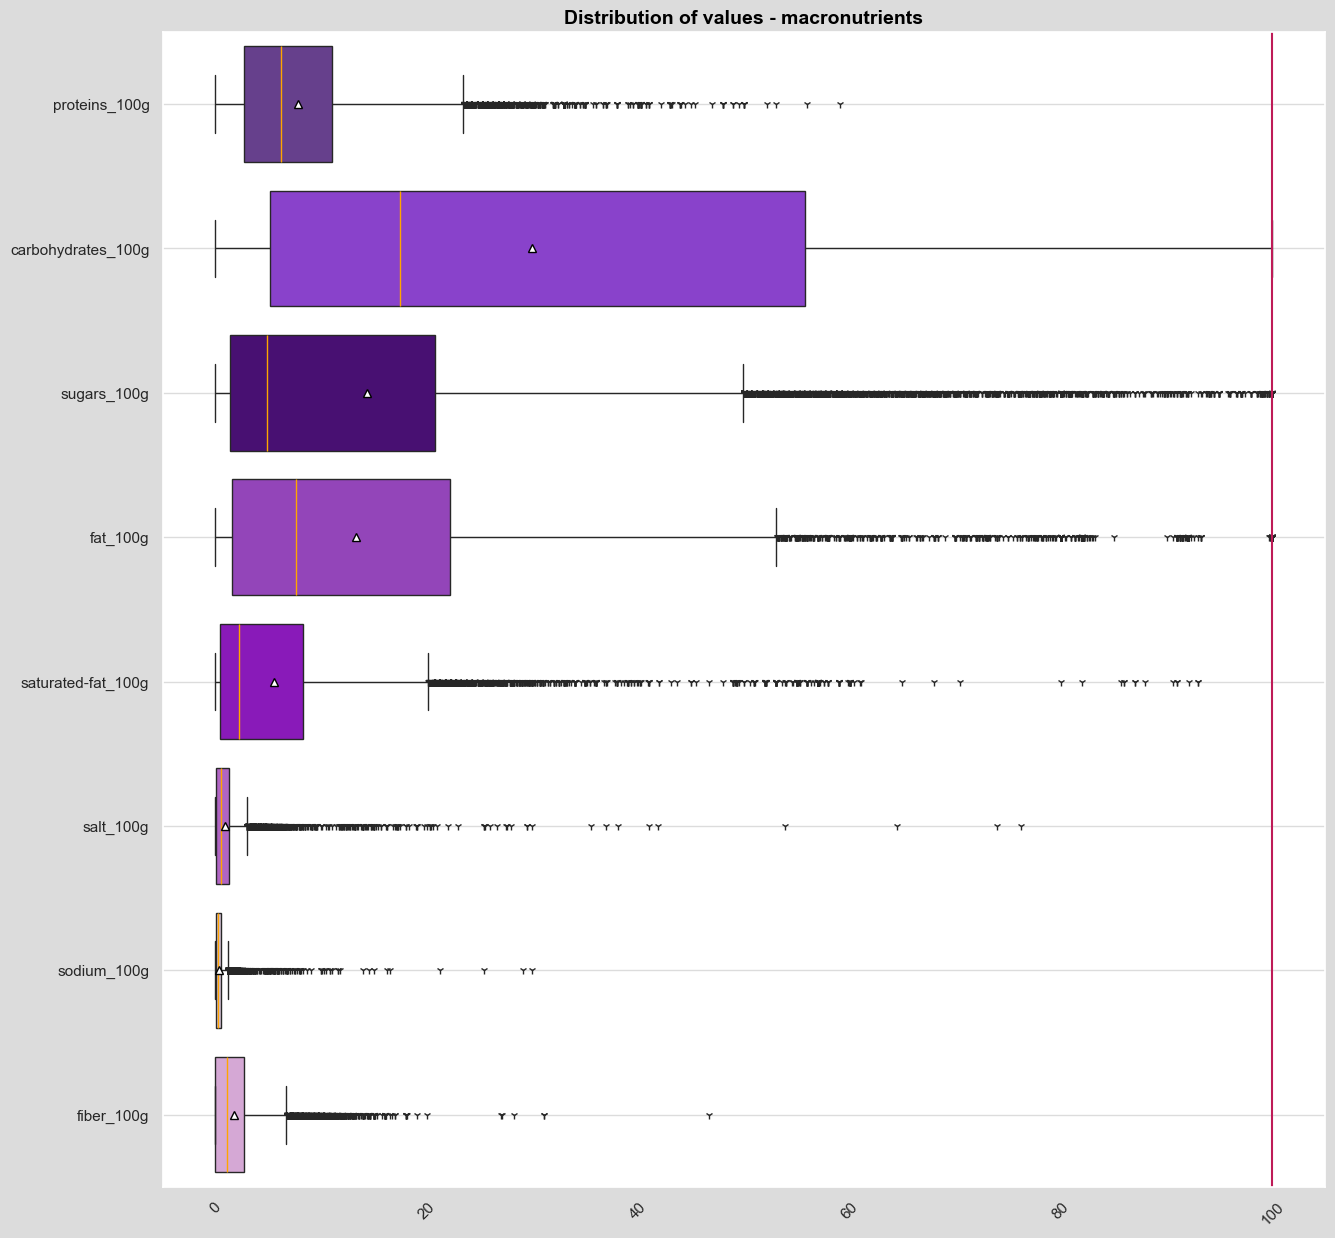

In [88]:
# find and analyse outliers in each numerical column
sns.set(rc={'figure.figsize':(15,15), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
data_graph45a = food_facts_trim_final[['proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'fat_100g',
                                      'saturated-fat_100g', 'salt_100g', 'sodium_100g', 'fiber_100g']]
graph45a = sns.boxplot(data=data_graph45a, flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="h", color=zest,
                       showmeans=True, dodge=False, palette=['rebeccapurple', 'blueviolet', 'indigo', 'darkorchid','darkviolet',
                                                            'mediumorchid', 'thistle', 'plum', 'violet', fuchsia, 'magenta',
                                                            'orchid','mediumvioletred', 'deeppink'], legend=False)
plt.xticks(rotation=45)
plt.ylabel("", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of values - macronutrients",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')
plt.axvline(100, color=fuchsia)
plt.savefig("graph45a.png", bbox_inches='tight')
plt.show()

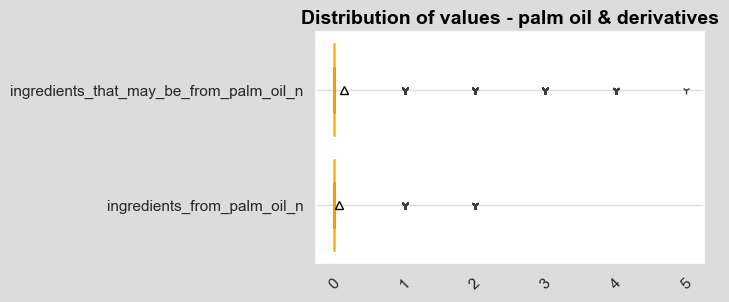

In [89]:
# find and analyse outliers in each numerical column
sns.set(rc={'figure.figsize':(5,3), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
data_graph45b = food_facts_trim_final[['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n']]
graph45b = sns.boxplot(data=data_graph45b, flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="h", color=zest,
                       showmeans=True, dodge=False, palette=['rebeccapurple', 'blueviolet', 'indigo'], legend=False)
plt.xticks(rotation=45)
plt.ylabel("", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of values - palm oil & derivatives",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')
plt.savefig("graph45b.png", bbox_inches='tight')
plt.show()

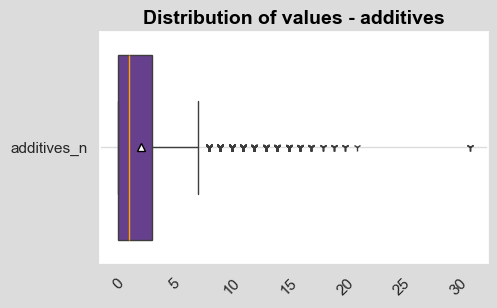

In [90]:
# find and analyse outliers in each numerical column
sns.set(rc={'figure.figsize':(5,3), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
data_graph45c = food_facts_trim_final[['additives_n']]
graph45c = sns.boxplot(data=data_graph45c, flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="h", color=zest,
                       showmeans=True, dodge=False, palette=['rebeccapurple'], legend=False)
plt.xticks(rotation=45)
plt.ylabel("", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of values - additives",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')
plt.savefig("graph45c.png", bbox_inches='tight')
plt.show()

In [91]:
food_facts_trim_final.columns

Index(['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2',
       'nutrition_grade_fr', 'energy_100g', 'proteins_100g',
       'carbohydrates_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g',
       'salt_100g', 'sodium_100g', 'fiber_100g',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'total_weight', 'energy_100g_calc_kJ',
       'energy_delta'],
      dtype='object')

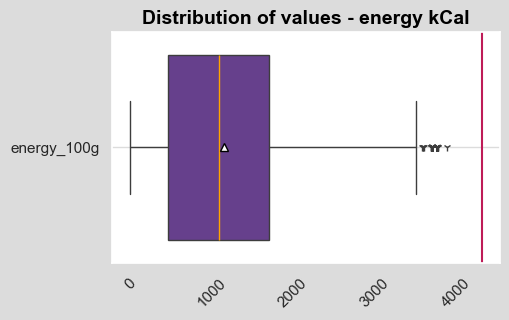

In [92]:
# find and analyse outliers in each numerical column
sns.set(rc={'figure.figsize':(5,3), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
data_graph45d = food_facts_trim_final[['energy_100g']]
graph45d = sns.boxplot(data=data_graph45d, flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="h", color=zest,
                       showmeans=True, dodge=False, palette=['rebeccapurple', 'blueviolet', 'indigo', 'darkorchid','darkviolet',
                                                            'mediumorchid', 'thistle', 'plum', 'violet', fuchsia, 'magenta',
                                                            'orchid','mediumvioletred', 'deeppink'], legend=False)
plt.xticks(rotation=45)
plt.ylabel("", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of values - energy kCal",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')
plt.axvline(4320, color=fuchsia)
plt.savefig("graph45d.png", bbox_inches='tight')
plt.show()

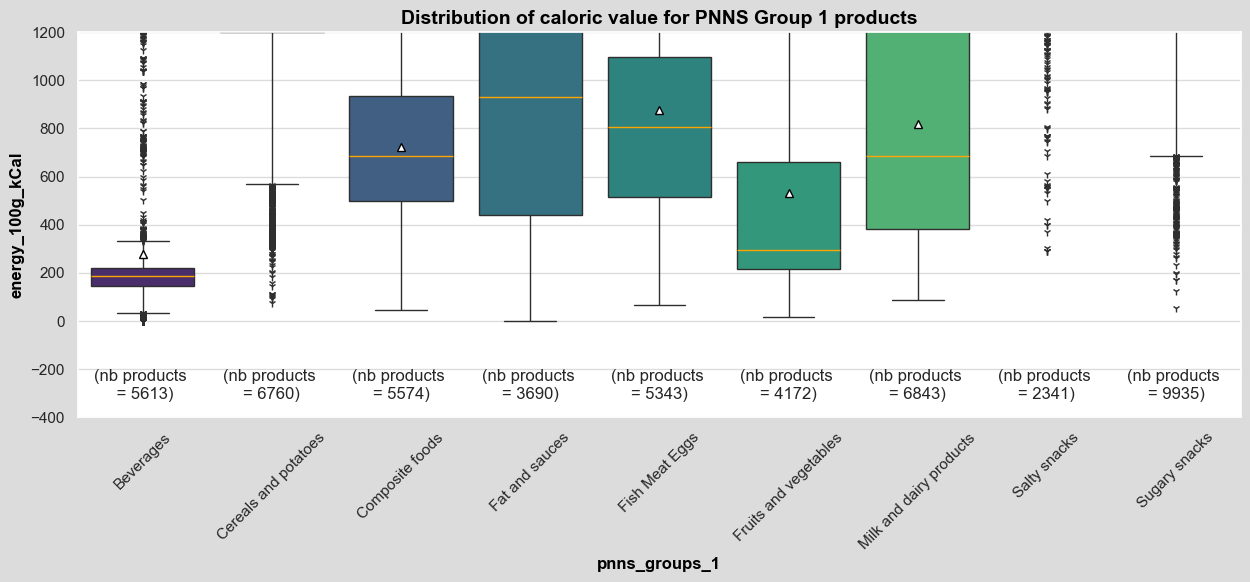

In [93]:
# plot caloric value of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_cal = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="energy_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-400, 1200)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("energy_100g_kCal", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of caloric value for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
nb_products = food_facts_trim.groupby('pnns_groups_1')['code'].count().reset_index()
plt.text(0, -200,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -200,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -200,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -200,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -200,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(5, -200,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -200,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -200,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -200,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_cal.png", bbox_inches='tight')
plt.show()

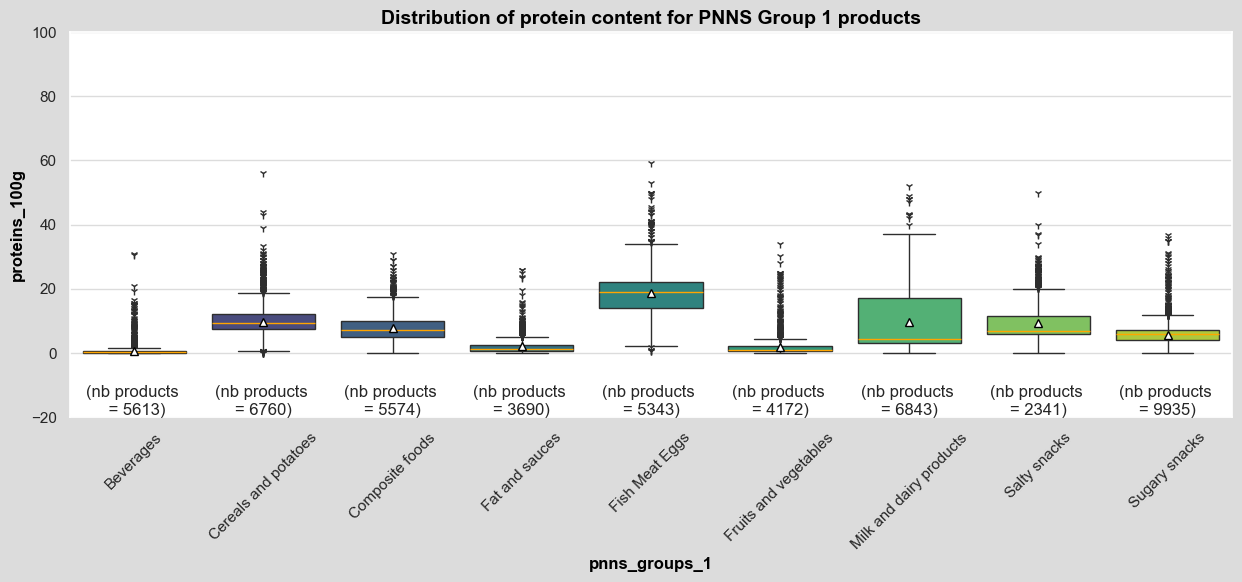

In [94]:
# plot protein content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_prot = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="proteins_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-20, 100)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("proteins_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of protein content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -10,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -10,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -10,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -10,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -10,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -10,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -10,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -10,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -10,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_prot.png", bbox_inches='tight')
plt.show()

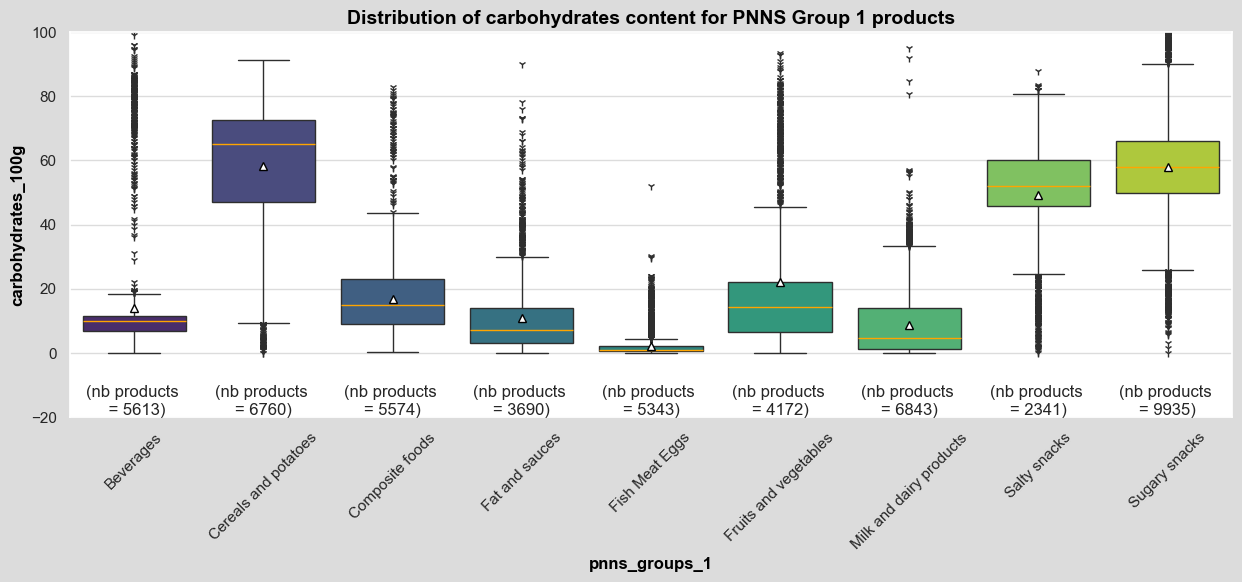

In [95]:
# plot carbohydrates content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_carbs = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="carbohydrates_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-20, 100)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("carbohydrates_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of carbohydrates content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -10,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -10,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -10,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -10,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -10,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -10,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -10,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -10,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -10,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_carbs.png", bbox_inches='tight')
plt.show()


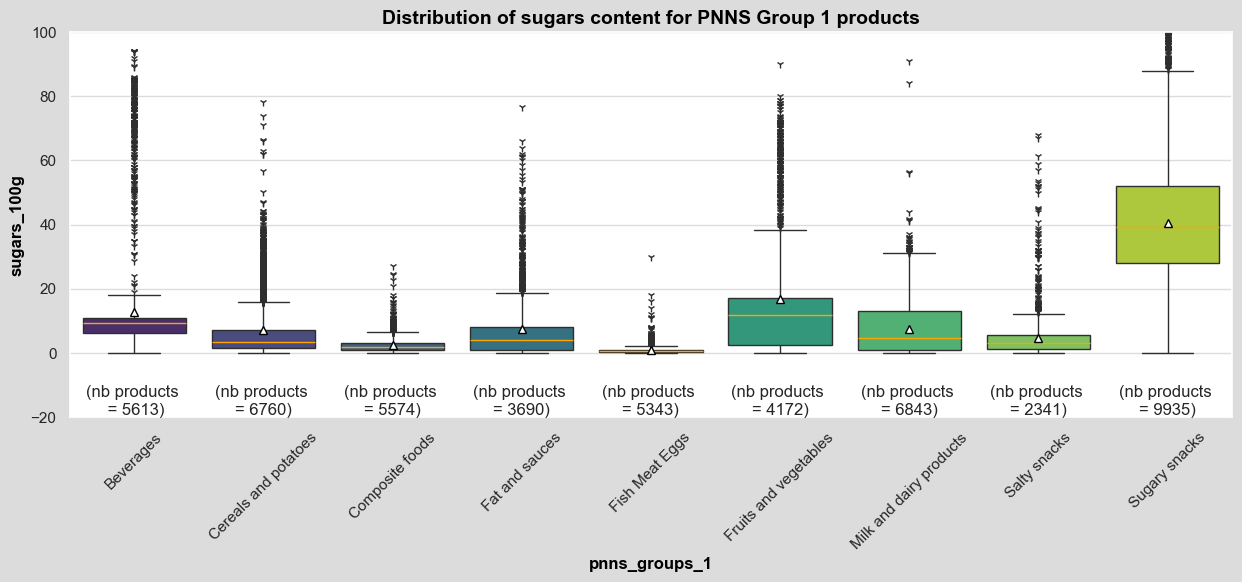

In [96]:
# plot sugars content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_sug = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="sugars_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-20, 100)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("sugars_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of sugars content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -10,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -10,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -10,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -10,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -10,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -10,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -10,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -10,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -10,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_sug.png", bbox_inches='tight')
plt.show()



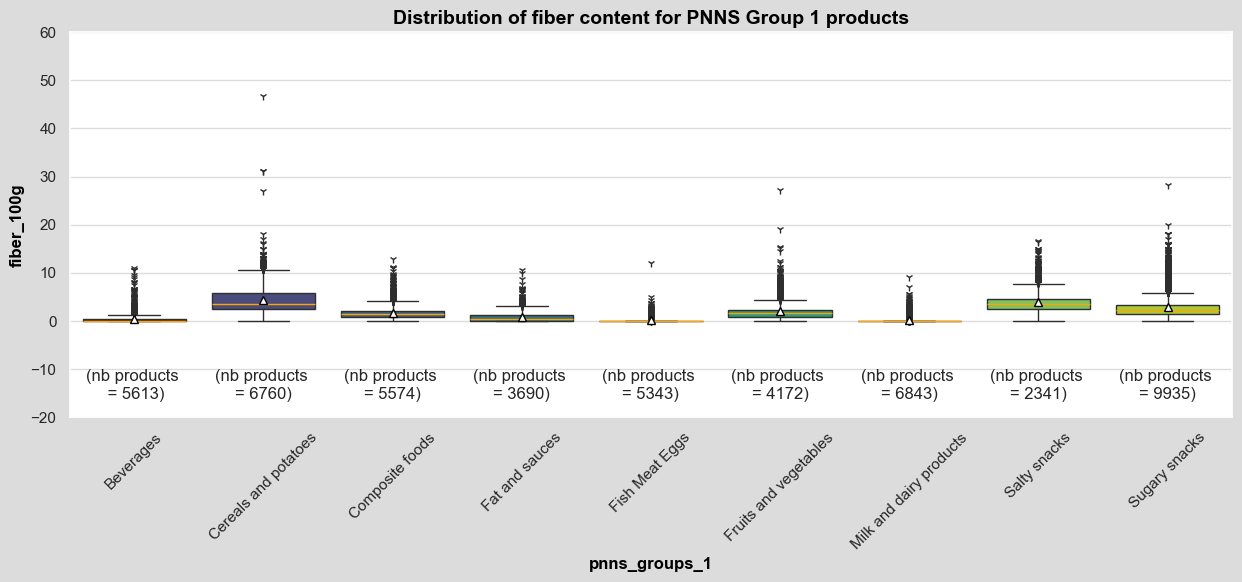

In [97]:
# plot fiber content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_fib = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="fiber_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-20, 60)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("fiber_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of fiber content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -10,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -10,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -10,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -10,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -10,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -10,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -10,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -10,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -10,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_fib.png", bbox_inches='tight')
plt.show()




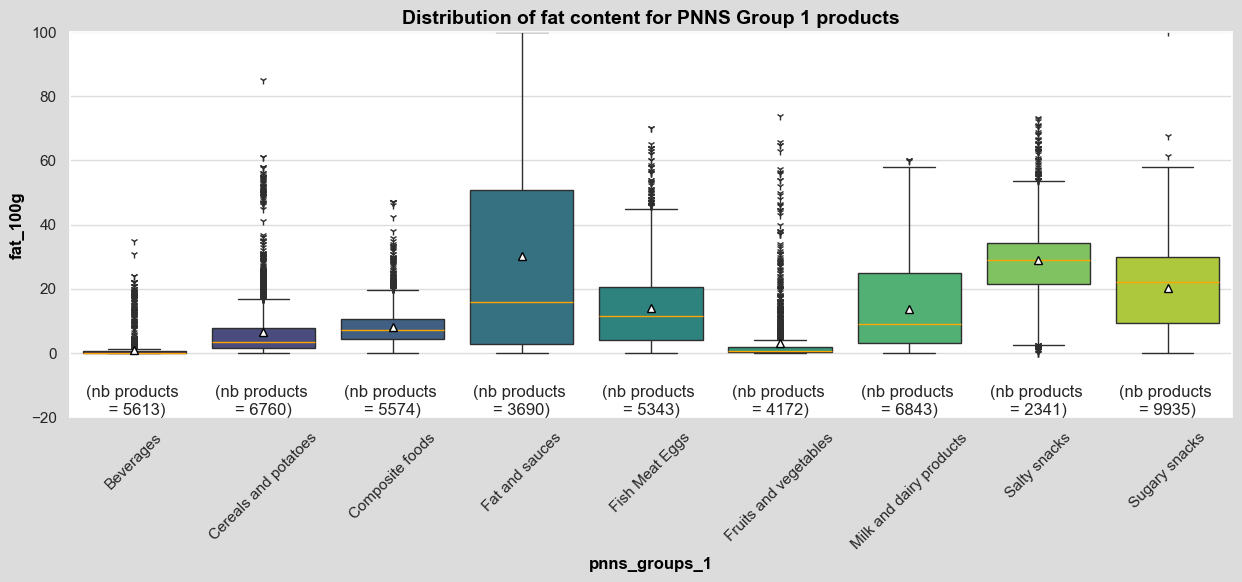

In [98]:
# plot fat content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_fat = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="fat_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-20, 100)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("fat_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of fat content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -10,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -10,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -10,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -10,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -10,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -10,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -10,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -10,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -10,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_fat.png", bbox_inches='tight')
plt.show()



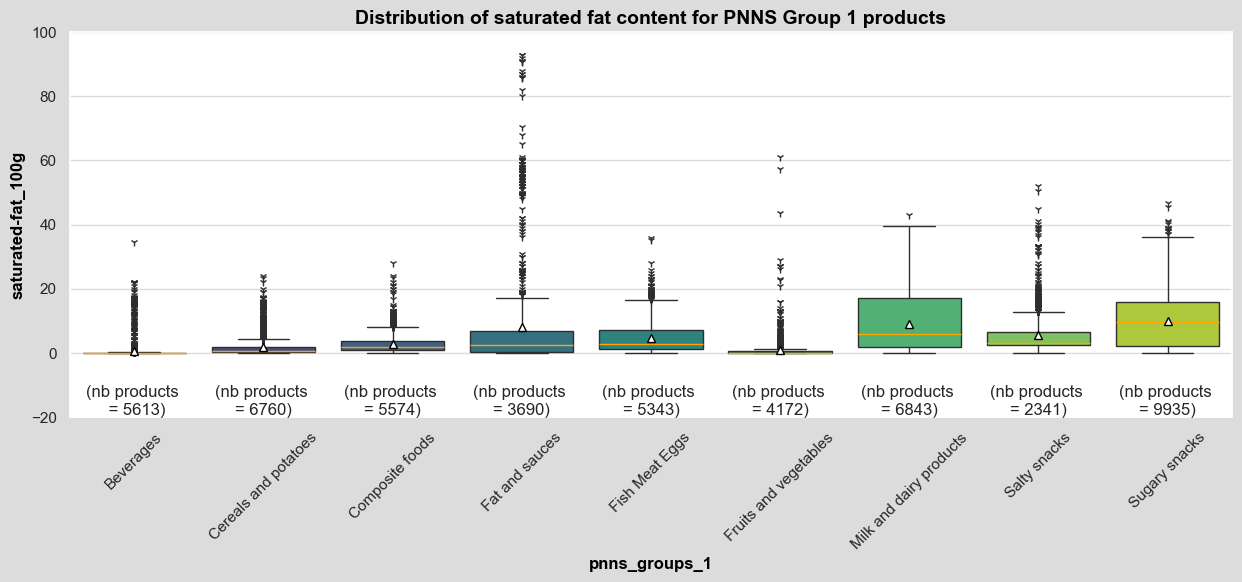

In [99]:
# plot saturated fat content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_satfat = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="saturated-fat_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-20, 100)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("saturated-fat_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of saturated fat content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -10,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -10,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -10,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -10,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -10,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -10,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -10,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -10,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -10,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_satfat.png", bbox_inches='tight')
plt.show()


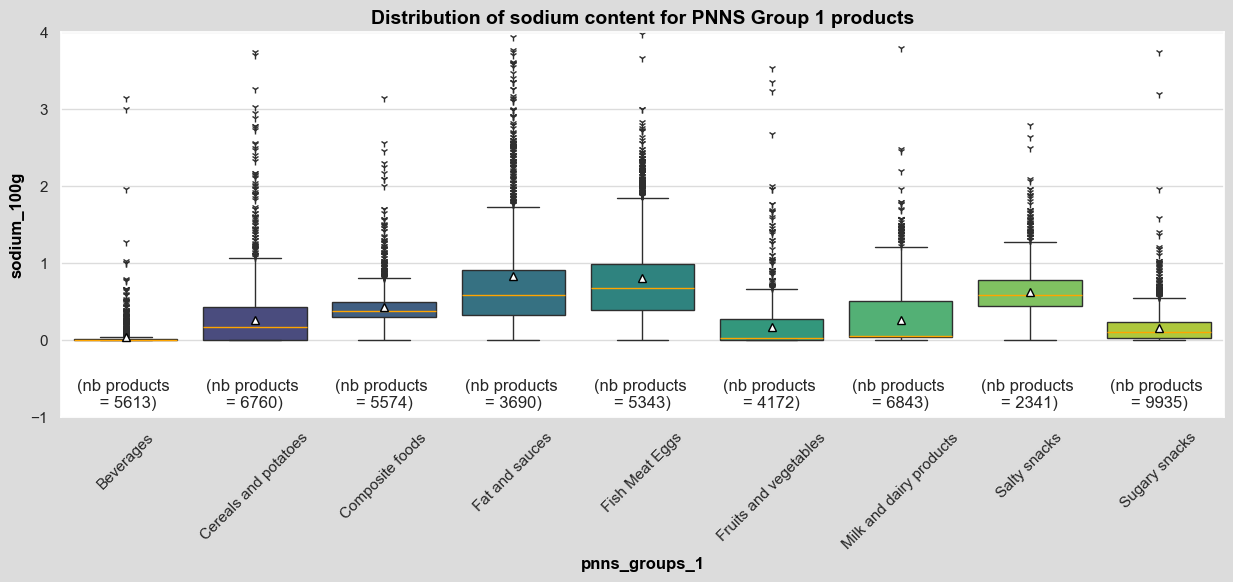

In [100]:
# plot sodium content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_sod = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="sodium_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-1, 4)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("sodium_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of sodium content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -0.5,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -0.5,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -0.5,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -0.5,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -0.5,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -0.5,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -0.5,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -0.5,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -0.5,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_sod.png", bbox_inches='tight')
plt.show()


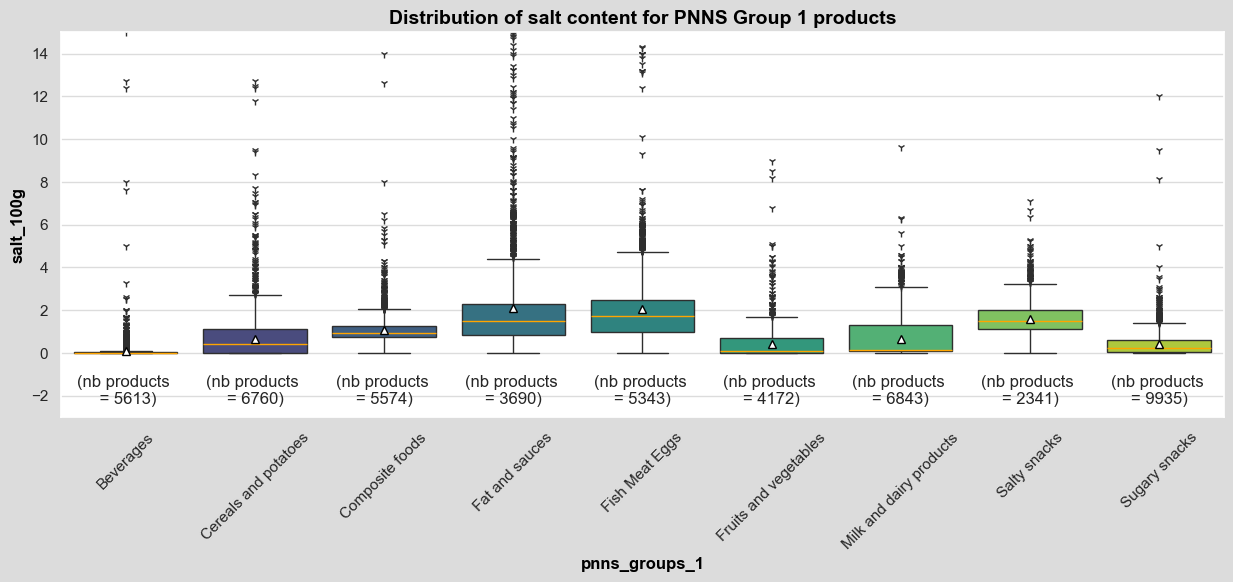

In [101]:
# plot salt content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_salt = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="salt_100g", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-3, 15)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("salt_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of salt content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -1,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -1,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -1,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -1,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -1,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -1,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -1,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -1,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -1,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_salt.png", bbox_inches='tight')
plt.show()



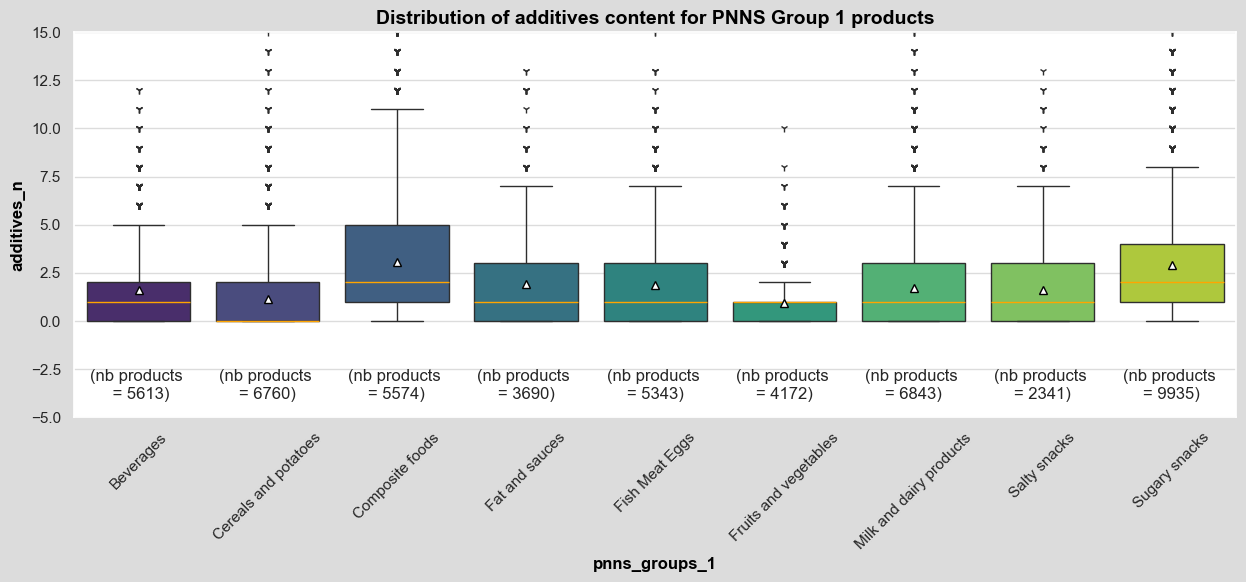

In [102]:
# plot additives content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_add = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="additives_n", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-5, 15)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("additives_n", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of additives content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -2.5,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -2.5,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -2.5,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -2.5,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -2.5,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -2.5,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -2.5,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -2.5,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -2.5,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_add.png", bbox_inches='tight')
plt.show()


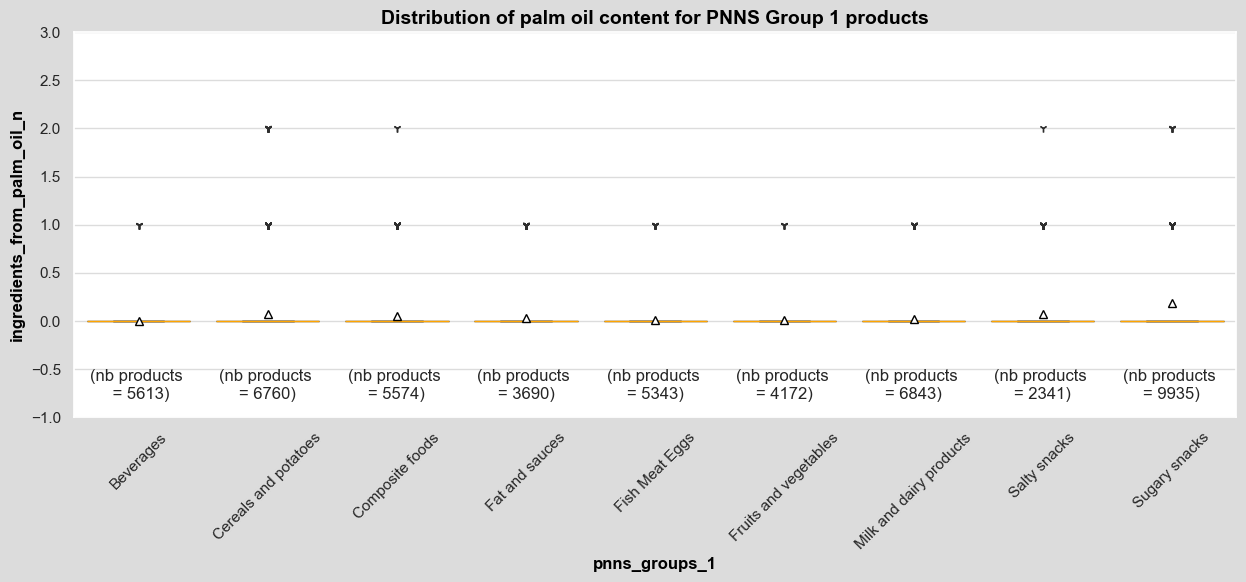

In [103]:
# plot palm oil content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_palmoil = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1", y="ingredients_from_palm_oil_n", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-1, 3)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("ingredients_from_palm_oil_n", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of palm oil content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -0.5,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -0.5,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -0.5,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -0.5,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -0.5,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -0.5,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -0.5,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -0.5,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -0.5,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_palmoil.png", bbox_inches='tight')
plt.show()



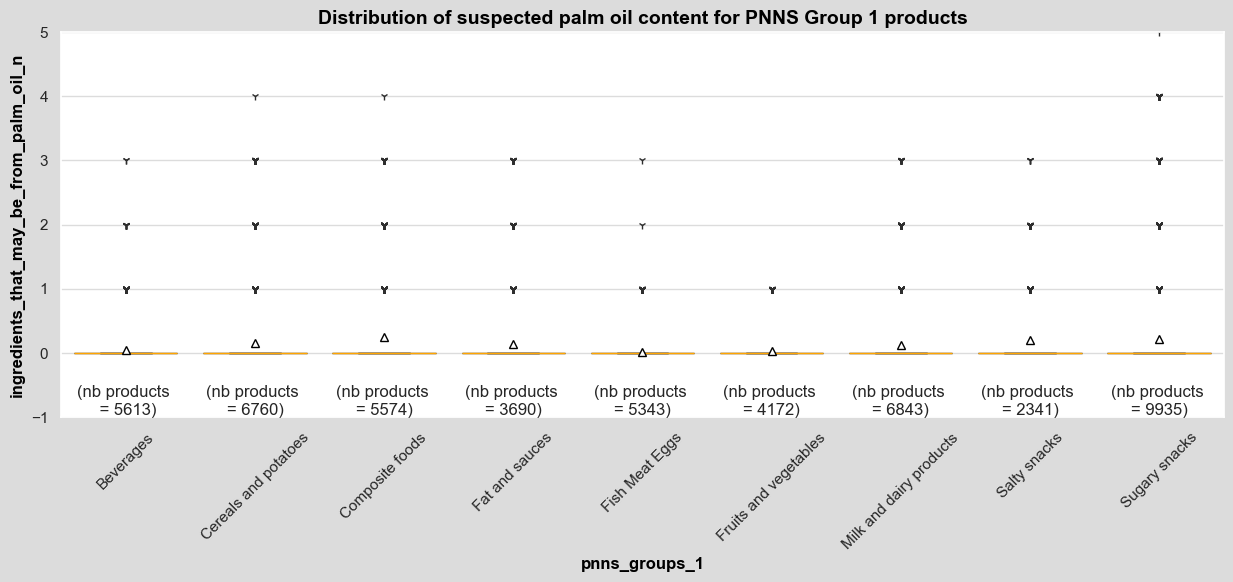

In [104]:
# plot suspected palm oil content of product across pnns 1 groups on a box plot
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_pnns_1_maybe_palmoil = sns.boxplot(data=food_facts_trim_final, x="pnns_groups_1",
                                       y="ingredients_that_may_be_from_palm_oil_n", hue="pnns_groups_1",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette='viridis', legend=False)
plt.ylim(-1, 5)
plt.xticks(rotation=45)
plt.xlabel("pnns_groups_1", fontweight='bold', fontsize=12, color='black')
plt.ylabel("ingredients_that_may_be_from_palm_oil_n", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of suspected palm oil content for PNNS Group 1 products",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -0.5,"(nb products \n = {})".format(nb_products.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -0.5,"(nb products \n= {})".format(nb_products.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -0.5,"(nb products \n= {})".format(nb_products.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -0.5,"(nb products \n= {})".format(nb_products.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -0.5,"(nb products \n= {})".format(nb_products.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(5, -0.5,"(nb products \n= {})".format(nb_products.iloc[5, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(6, -0.5,"(nb products \n= {})".format(nb_products.iloc[6, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(7, -0.5,"(nb products \n= {})".format(nb_products.iloc[7, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.text(8, -0.5,"(nb products \n= {})".format(nb_products.iloc[8, 1]), horizontalalignment='center',
        verticalalignment='top')
plt.savefig("box_pnns_1_maybe_palmoil.png", bbox_inches='tight')
plt.show()


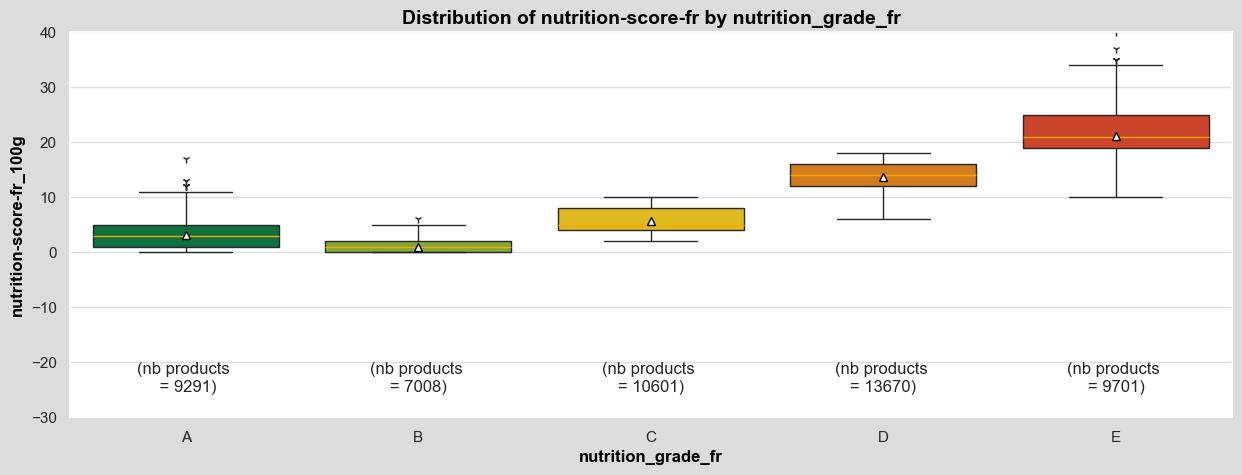

In [105]:
# plot distribution of 'nutrition-score-fr_100g' by 'nutrition_grade_fr'
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_score_fr_grade = sns.boxplot(data=food_facts_trim_final, x="nutrition_grade_fr",
                                       y="nutrition-score-fr_100g", hue="nutrition_grade_fr",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette=nutri_palette, legend=False)
plt.ylim(-30, 40)
plt.xticks([0, 1, 2, 3, 4], ['A', 'B', 'C', 'D', 'E'])
plt.xlabel("nutrition_grade_fr", fontweight='bold', fontsize=12, color='black')
plt.ylabel("nutrition-score-fr_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of nutrition-score-fr by nutrition_grade_fr",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
nb_products_2 = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -20,"(nb products \n = {})".format(nb_products_2.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -20,"(nb products \n= {})".format(nb_products_2.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -20,"(nb products \n= {})".format(nb_products_2.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -20,"(nb products \n= {})".format(nb_products_2.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -20,"(nb products \n= {})".format(nb_products_2.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.savefig("box_score_fr_grade.png", bbox_inches='tight')
plt.show()


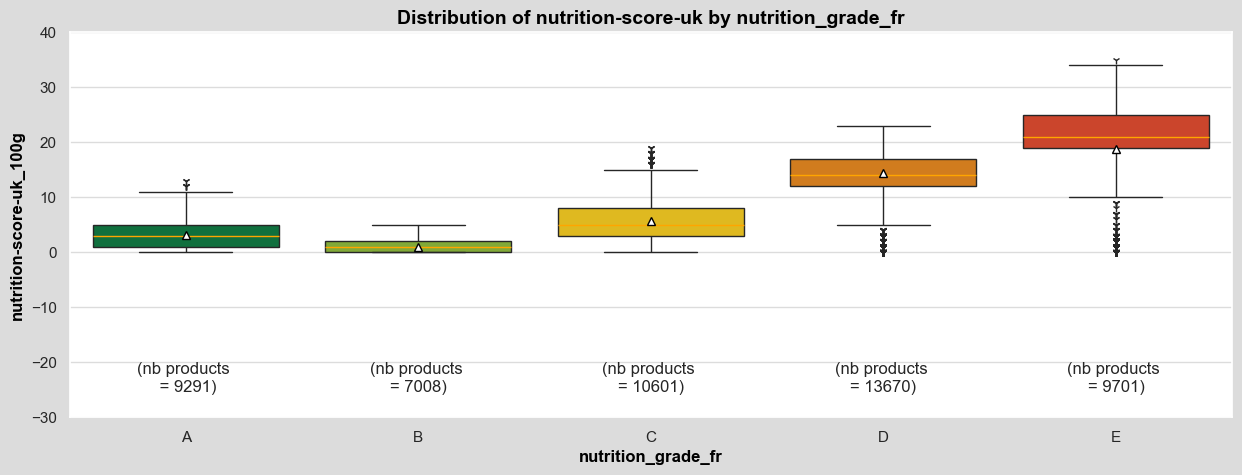

In [106]:
# plot distribution of 'nutrition-score-uk_100g' by 'nutrition_grade_fr'
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_score_uk_grade = sns.boxplot(data=food_facts_trim_final, x="nutrition_grade_fr",
                                       y="nutrition-score-uk_100g", hue="nutrition_grade_fr",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette=nutri_palette, legend=False)
plt.ylim(-30, 40)
plt.xticks([0, 1, 2, 3, 4], ['A', 'B', 'C', 'D', 'E'])
plt.xlabel("nutrition_grade_fr", fontweight='bold', fontsize=12, color='black')
plt.ylabel("nutrition-score-uk_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of nutrition-score-uk by nutrition_grade_fr",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products_2 = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -20,"(nb products \n = {})".format(nb_products_2.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -20,"(nb products \n= {})".format(nb_products_2.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -20,"(nb products \n= {})".format(nb_products_2.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -20,"(nb products \n= {})".format(nb_products_2.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -20,"(nb products \n= {})".format(nb_products_2.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.savefig("box_score_fr_grade.png", bbox_inches='tight')
plt.show()

# 5. Feature engineering

In [107]:
# add column to tag diet products, to be used later to test if these products contain more additives than "regular" products
food_facts_trim_final.loc[food_facts_trim_final['product_name'].str.lower().str.contains('gluten free| sans gluten| sin gluten|sans sucre|sugar free|lowfat|nonfat|low fat| light|allégé'), "diet_product"] = True
food_facts_trim_final.fillna({'diet_product':False}, inplace=True)
food_facts_trim_final.sample(5)

code                               product_name  \
10766  3210791906550                        Muesli Crispy Light   
24437  3350030185381              Maxi Jambon Emmental Crudités   
26256  3421371510252  Tuiles Chocolat Blanc aux Éclats de Mûres   
12931  3245390014900                Chocolat Noir 72 % de cacao   
49183  8712100776403        Velouté de poireaux pommes de terre   

               pnns_groups_1       pnns_groups_2 nutrition_grade_fr  \
10766   Cereals and potatoes   Breakfast Cereals                  C   
24437        Composite foods            Sandwich                  C   
26256          Sugary snacks  Chocolate products                  E   
12931          Sugary snacks  Chocolate products                  D   
49183  Fruits and vegetables               Soups                  B   

       energy_100g  proteins_100g  carbohydrates_100g  sugars_100g  fat_100g  \
10766       1738.0            9.8                71.4         11.2      8.40   
24437       1015.0           10.0                20.0          5.6     13.00   
26256       2302.0            5.5                59.0         58.0     33.00   
12931       2212.0            9.5                34.0         28.0     40.00   
49183        199.0            0.8                 6.4          1.6      1.92   

       saturated-fat_100g  salt_100g  sodium_100g  fiber_100g  \
10766                3.70     0.5800     0.228346   11.600000   
24437                2.80     1.4732     0.580000    3.000000   
26256               20.00     0.1900     0.074803    2.714538   
12931               25.00     0.0254     0.010000   11.000000   
49183                0.72     0.6800     0.268000    0.720000   

       ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n  \
10766                                      0.0                          0.0   
24437                                      1.0                          0.0   
26256                                      0.0                          0.0   
12931                                      0.0                          0.0   
49183                                      0.0                          0.0   

       additives_n  nutrition-score-fr_100g  nutrition-score-uk_100g  \
10766          2.0                      7.0                      7.0   
24437         11.0                      8.0                      8.0   
26256          2.0                     26.0                     26.0   
12931          1.0                     17.0                     17.0   
49183          1.0                      1.0                      1.0   

       total_weight  energy_100g_calc_kJ  energy_delta  diet_product  
10766         89.60               1481.0      0.147871          True  
24437         43.00                941.0      0.072906         False  
26256         97.50               2277.0      0.010860         False  
12931         83.50               2050.0      0.073237         False  
49183          9.12                181.0      0.090452         False

In [108]:
food_facts_trim_final['diet_product'].value_counts()

diet_product
False    41687
True       516
Name: count, dtype: int64

- 1.4% of products are labelled as diet or gluten free. We will use this information later to see if their nutriscore differs significantly from that of conventional products, and if they more frequently contain additives than conventional products;

In [109]:
food_facts_trim_final[['product_name','pnns_groups_1','pnns_groups_2','additives_n']].sample(10)

product_name  \
3059                                      Saucisse de Lyon en tranches   
39818                                                   Oatbran Crisp    
8383                                       Ribs de Porc Sauce Barbecue   
31828  Yaourts au lait entier de haute Savoie sur lit de fruits jaunes   
28192                           Pêche Bellini fines bulles sans alcool   
15193                           Pépites de Chocolat Tartine et Cuisine   
39917                                                            Vimto   
28132                                                   Miel de fleurs   
19578                                                   Chips barbecue   
43308                                               Plaque de chocolat   

                 pnns_groups_1        pnns_groups_2  additives_n  
3059            Fish Meat Eggs       Processed meat          4.0  
39818     Cereals and potatoes    Breakfast Cereals          4.0  
8383           Composite foods       One-dish meals          0.0  
31828  Milk and dairy products      Milk and yogurt          3.0  
28192                Beverages  Sweetened beverages          4.0  
15193           Fat and sauces                 Fats          1.0  
39917                Beverages  Sweetened beverages          5.0  
28132            Sugary snacks               Sweets          3.0  
19578             Salty snacks           Appetizers          3.0  
43308            Sugary snacks   Chocolate products          2.0

In [110]:
# add column to identify organic products
food_facts_trim_final.loc[food_facts_trim_final['product_name'].str.lower().str.contains('biologique|Biologique|organic|Organic|bio|Bio'),
                   'organic_product'] = True
food_facts_trim_final.fillna({'organic_product':False}, inplace=True)
food_facts_trim_final.sample(5)

code  \
22536  3276770007816   
46926  8410500018023   
10355  3179140503249   
23780  3329770048935   
23315  3302741939104   

                                                               product_name  \
22536                   Les Terrines Marines Saumon et pointe de Ciboulette   
46926  Postre de soja &quot;Savia&quot; Natural con azúcar de caña integral   
10355                                                Noisettes Décortiquées   
23780                                              Mini Yop, Goût Framboise   
23315                                   Le Bâtonnet Moelleux (18 Bâtonnets)   

                 pnns_groups_1     pnns_groups_2 nutrition_grade_fr  \
22536           Fish Meat Eggs  Fish and seafood                  B   
46926  Milk and dairy products   Milk and yogurt                  B   
10355             Salty snacks              Nuts                  B   
23780  Milk and dairy products   Milk and yogurt                  B   
23315           Fish Meat Eggs  Fish and seafood                  C   

       energy_100g  proteins_100g  carbohydrates_100g  sugars_100g  fat_100g  \
22536        850.0            8.3                 3.5          1.8      17.2   
46926        357.0            4.0                12.1          9.8       1.8   
10355       2736.0           17.0                10.0          4.0      60.0   
23780        323.0            2.8                12.3         12.0       1.3   
23315        481.0            8.0                10.5          3.0       4.5   

       saturated-fat_100g  salt_100g  sodium_100g  fiber_100g  \
22536                 2.3   1.200000     0.472441    1.600000   
46926                 0.3   0.105816     0.041660    0.000000   
10355                 5.0   0.010000     0.003937    7.249249   
23780                 0.9   0.110000     0.043307    0.100000   
23315                 0.4   1.800000     0.708661    0.500000   

       ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n  \
22536                                      0.0                          0.0   
46926                                      0.0                          0.0   
10355                                      0.0                          0.0   
23780                                      0.0                          0.0   
23315                                      0.0                          0.0   

       additives_n  nutrition-score-fr_100g  nutrition-score-uk_100g  \
22536          4.0                      2.0                      2.0   
46926          1.0                      1.0                      1.0   
10355          0.0                      2.0                      2.0   
23780          0.0                      1.0                      1.0   
23315          0.0                      4.0                      4.0   

       total_weight  energy_100g_calc_kJ  energy_delta  diet_product  \
22536          29.0                818.0      0.037647         False   
46926          17.9                337.0      0.056022         False   
10355          87.0               2590.0      0.053363         False   
23780          16.4                300.0      0.071207         False   
23315          23.0                471.0      0.020790         False   

       organic_product  
22536            False  
46926            False  
10355            False  
23780            False  
23315            False

In [111]:
food_facts_trim_final['organic_product'].value_counts()

organic_product
False    40592
True      1611
Name: count, dtype: int64

- 3.9% of products are labelled as bio/organic. We will use this information later to see if their nutriscore differs significantly from that of conventional products, and if they less frequently contain palm oil derivatives than conventional products;

In [112]:
# add total for ingredients that are or may be from palm oil
food_facts_trim_final['palm_oil_total'] = round(food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n']
+  food_facts_trim_final['ingredients_from_palm_oil_n']).astype(int)

In [113]:
# add columns to identify products that may or do contain palm oil
food_facts_trim_final.loc[(food_facts_trim_final['palm_oil_total'] != 0) & (food_facts_trim_final['palm_oil_total'].isna() == False),
                    'contains_palm_oil'] = True
food_facts_trim_final.loc[(food_facts_trim_final['palm_oil_total'] == 0), 'contains_palm_oil'] = False
food_facts_trim_final['contains_palm_oil'] = food_facts_trim_final['contains_palm_oil'].astype(bool)
food_facts_trim_final.head(10)

code                  product_name          pnns_groups_1  \
0  0000000290616                  Salade Cesar  Fruits and vegetables   
1  0000001938067  Chaussons tressés aux pommes          Sugary snacks   
2  0000008237798               Quiche Lorraine        Composite foods   
3  0000020424640            Belgische Pralinen          Sugary snacks   
4  0000027533048      Luxury Christmas Pudding          Sugary snacks   
5  0000040608754         Pepsi, Nouveau goût !              Beverages   
6  0000087177756                           7Up              Beverages   
7         000010             Madeleines nature          Sugary snacks   
8         000030                 Cakes Raisins          Sugary snacks   
9         000031              Cakes aux Fruits          Sugary snacks   

           pnns_groups_2 nutrition_grade_fr  energy_100g  proteins_100g  \
0             Vegetables                  C       1210.0          22.00   
1     Biscuits and cakes                  C       1090.0           3.33   
2  Pizza pies and quiche                  B        478.0           5.36   
3                 Sweets                  E       2257.0           4.70   
4     Biscuits and cakes                  C       1284.0           3.90   
5    Sweetened beverages                  E        177.0           0.00   
6    Sweetened beverages                  E        177.0           0.00   
7     Biscuits and cakes                  D       1900.0           6.00   
8     Biscuits and cakes                  D       1768.0           5.80   
9     Biscuits and cakes                  D       1670.0           4.90   

   carbohydrates_100g  sugars_100g  fat_100g  saturated-fat_100g  salt_100g  \
0               23.00        0.000     12.00                7.00   2.160000   
1               38.70       24.700     10.70                2.00   0.647000   
2                7.86        0.714      6.79                2.86   0.499000   
3               53.80       51.500     33.30               21.10   0.090000   
4               54.20       44.000      7.00                3.60   0.199898   
5               10.40       10.400      0.00                0.00   0.025400   
6               10.40       10.400      0.00                0.00   0.100000   
7               55.00       26.000     23.00                2.50   0.660000   
8               56.00       28.000     19.00                2.50   0.650000   
9               60.00       34.000     15.00                2.00   0.600000   

   sodium_100g  fiber_100g  ingredients_that_may_be_from_palm_oil_n  \
0     0.850000    2.000000                                      0.0   
1     0.255000    2.000000                                      0.0   
2     0.196000    0.357000                                      0.0   
3     0.035433    2.332528                                      0.0   
4     0.078700    4.700000                                      0.0   
5     0.010000    0.000000                                      0.0   
6     0.039370    0.000000                                      0.0   
7     0.259843    1.500000                                      1.0   
8     0.255906    1.800000                                      1.0   
9     0.236220    1.500000                                      1.0   

   ingredients_from_palm_oil_n  additives_n  nutrition-score-fr_100g  \
0                          0.0          0.0                      6.0   
1                          0.0          5.0                      9.0   
2                          0.0          3.0                      2.0   
3                          0.0          3.0                     26.0   
4                          0.0          5.0                     10.0   
5                          0.0          2.0                     13.0   
6                          0.0          3.0                     13.0   
7                          0.0          5.0                     12.0   
8                          0.0          5.0                     13.0   
9         

In [114]:
food_facts_trim_final['contains_palm_oil'].value_counts()

contains_palm_oil
False    35577
True      6626
Name: count, dtype: int64

- Just over 19.6% of products contain or may contain palm oil.

In [115]:
# add column to identify products that may be eaten daily as per nutritional guidelines
food_facts_trim_final.loc[(food_facts_trim_final['nutrition_grade_fr'] == 'A') 
                           | (food_facts_trim_final['nutrition_grade_fr'] == 'B' ), 'can_eat_daily'] = True
food_facts_trim_final.loc[(food_facts_trim_final['nutrition_grade_fr'] == 'C' )
                           | (food_facts_trim_final['nutrition_grade_fr'] == 'D')
                          |(food_facts_trim_final['nutrition_grade_fr'] == 'E'), 'can_eat_daily'] = False
food_facts_trim_final['can_eat_daily'] = food_facts_trim_final['can_eat_daily'].astype(bool)
food_facts_trim_final.sample(axis=0, n=5)

code                        product_name  \
18481  3258561450964            Saucisson à l'ail nature   
16548  3256221672114      Riz Soufflé Enrobé de Chocolat   
34486  3700214614389  Lait de coco gingembre citronnelle   
34645  3700311821123           Tous les jours Bacon fumé   
26298  3421557401091                    Tartines Ki'Kroc   

              pnns_groups_1          pnns_groups_2 nutrition_grade_fr  \
18481        Fish Meat Eggs         Processed meat                  E   
16548  Cereals and potatoes      Breakfast Cereals                  D   
34486             Beverages  Non-sugared beverages                  D   
34645        Fish Meat Eggs                   Meat                  D   
26298  Cereals and potatoes                  Bread                  A   

       energy_100g  proteins_100g  carbohydrates_100g  sugars_100g   fat_100g  \
18481       1305.0           14.0                 1.0          1.0  31.287732   
16548       1519.0            5.4                86.0         33.6   2.500000   
34486        682.0            2.0                 2.2          1.5  17.000000   
34645        468.0           20.0                 1.0          0.5   3.000000   
26298       1540.0           13.5                78.0          5.0   3.000000   

       saturated-fat_100g  salt_100g  sodium_100g  fiber_100g  \
18481                28.0     2.1800     0.858268         0.0   
16548                 1.3     1.1300     0.444882         2.2   
34486                15.0     0.0700     0.027559         0.5   
34645                 1.3     2.5400     1.000000         0.0   
26298                 0.7     0.5842     0.230000        11.0   

       ingredients_that_may_be_from_palm_oil_n  ingredients_from_palm_oil_n  \
18481                                      0.0                          0.0   
16548                                      1.0                          0.0   
34486                                      0.0                          0.0   
34645                                      0.0                          0.0   
26298                                      0.0                          0.0   

       additives_n  nutrition-score-fr_100g  nutrition-score-uk_100g  \
18481          2.0                     22.0                     22.0   
16548          3.0                     13.0                     13.0   
34486          2.0                     12.0                     12.0   
34645          3.0                     12.0                     12.0   
26298          0.0                      3.0                      3.0   

       total_weight  energy_100g_calc_kJ  energy_delta  diet_product  \
18481     46.287732               1429.0      0.095019         False   
16548     93.900000               1587.0      0.044766         False   
34486     21.200000                702.0      0.029326         False   
34645     24.000000                464.0      0.008547         False   
26298     94.500000               1460.0      0.051948         False   

       organic_product  palm_oil_total  contains_palm_oil  can_eat_daily  
18481            False               0              False          False  
16548            False               1               True          False  
34486            False               0              False          False  
34645            False               0              False          False  
26298            False               0              False           True

In [116]:
# express energetic value in kCal instead of kJ
food_facts_trim_final['energy_100g_kCal'] = round(food_facts_trim_final['energy_100g'] / 4.184, 0)
food_facts_trim_final.rename(columns={"energy_100g": "energy_100g_kJ"}, inplace=True)
food_facts_trim_final.head()

code                  product_name          pnns_groups_1  \
0  0000000290616                  Salade Cesar  Fruits and vegetables   
1  0000001938067  Chaussons tressés aux pommes          Sugary snacks   
2  0000008237798               Quiche Lorraine        Composite foods   
3  0000020424640            Belgische Pralinen          Sugary snacks   
4  0000027533048      Luxury Christmas Pudding          Sugary snacks   

           pnns_groups_2 nutrition_grade_fr  energy_100g_kJ  proteins_100g  \
0             Vegetables                  C          1210.0          22.00   
1     Biscuits and cakes                  C          1090.0           3.33   
2  Pizza pies and quiche                  B           478.0           5.36   
3                 Sweets                  E          2257.0           4.70   
4     Biscuits and cakes                  C          1284.0           3.90   

   carbohydrates_100g  sugars_100g  fat_100g  saturated-fat_100g  salt_100g  \
0               23.00        0.000     12.00                7.00   2.160000   
1               38.70       24.700     10.70                2.00   0.647000   
2                7.86        0.714      6.79                2.86   0.499000   
3               53.80       51.500     33.30               21.10   0.090000   
4               54.20       44.000      7.00                3.60   0.199898   

   sodium_100g  fiber_100g  ingredients_that_may_be_from_palm_oil_n  \
0     0.850000    2.000000                                      0.0   
1     0.255000    2.000000                                      0.0   
2     0.196000    0.357000                                      0.0   
3     0.035433    2.332528                                      0.0   
4     0.078700    4.700000                                      0.0   

   ingredients_from_palm_oil_n  additives_n  nutrition-score-fr_100g  \
0                          0.0          0.0                      6.0   
1                          0.0          5.0                      9.0   
2                          0.0          3.0                      2.0   
3                          0.0          3.0                     26.0   
4                          0.0          5.0                     10.0   

   nutrition-score-uk_100g  total_weight  energy_100g_calc_kJ  energy_delta  \
0                      6.0         57.00               1172.0      0.031405   
1                      9.0         52.73               1073.0      0.015596   
2                      2.0         20.01                471.0      0.014644   
3                     26.0         91.80               2194.0      0.027913   
4                     10.0         65.10               1157.0      0.098910   

   diet_product  organic_product  palm_oil_total  contains_palm_oil  \
0         False            False               0              False   
1         False            False               0              False   
2         False            False               0              False   
3         False            False               0              False   
4         False            False               0              False   

   can_eat_daily  energy_100g_kCal  
0          False             289.0  
1          False             261.0  
2           True             114.0  
3          False             539.0  
4          False             307.0

In [117]:
# typecasting
food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'] = food_facts_trim_final['ingredients_that_may_be_from_palm_oil_n'
                                                                            ].astype(int, errors='ignore')
food_facts_trim_final['ingredients_from_palm_oil_n'] = food_facts_trim_final['ingredients_from_palm_oil_n'].astype(int, errors='ignore')
food_facts_trim_final['additives_n'] = food_facts_trim_final['additives_n'].astype(int, errors='ignore')

In [118]:
food_facts_trim_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42203 entries, 0 to 50269
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   code                                     42203 non-null  string  
 1   product_name                             42203 non-null  string  
 2   pnns_groups_1                            42203 non-null  category
 3   pnns_groups_2                            42203 non-null  category
 4   nutrition_grade_fr                       42203 non-null  category
 5   energy_100g_kJ                           42203 non-null  float64 
 6   proteins_100g                            42203 non-null  float64 
 7   carbohydrates_100g                       42203 non-null  float64 
 8   sugars_100g                              42203 non-null  float64 
 9   fat_100g                                 42203 non-null  float64 
 10  saturated-fat_100g                     

In [119]:
# re-check absence of duplicated in final dataframe
food_facts_trim_final.duplicated().sum()

0

In [120]:
# re-check absence of NaNs in final dataframe
food_facts_trim_final.isna().sum().sum()

139

# 6. Data analysis

## 6.1 - Univariate analyses

### 6.1.1 - Product groups distribution

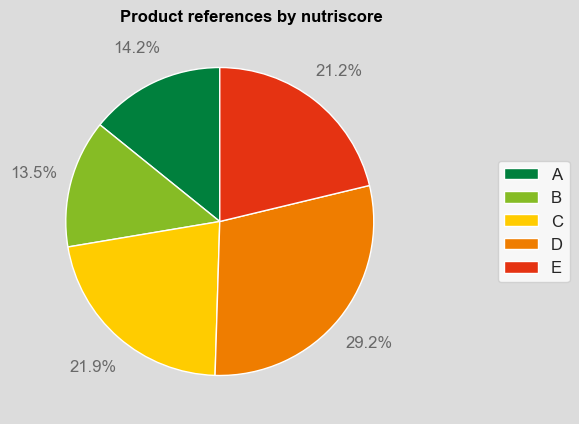

In [121]:
# plot pie by nutriscore
data_pie = food_facts_trim_final.groupby(['nutrition_grade_fr'], sort=True)['code'].count()
fig, ax = plt.subplots(figsize=(5,5))
fig.set_facecolor('gainsboro')
ax.pie(data_pie, radius=1,
      colors=nutri_palette, autopct = '%1.1f%%', pctdistance=1.25,
       wedgeprops=dict(edgecolor='w'), textprops={'fontsize': 12, 'color':'dimgray'},startangle=90)
ax.legend(title="", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=12, labels=['A', 'B', 'C', 'D', 'E'])
plt.text(-0.65, 1.3, "Product references by nutriscore", fontsize=12, fontweight='bold', color='black')
plt.savefig("pie.png", bbox_inches='tight')
plt.show()

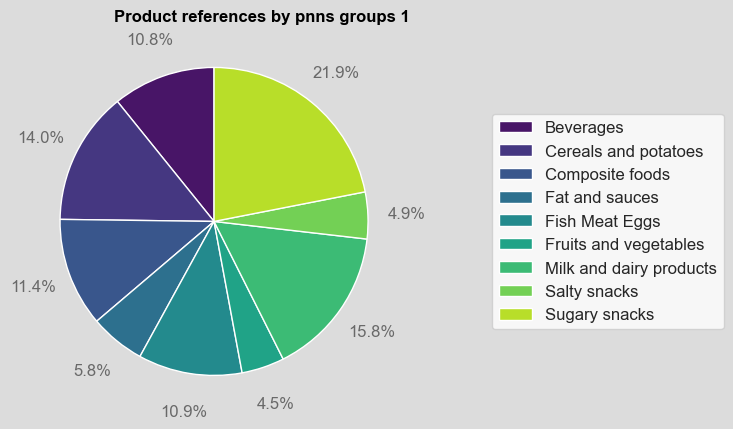

In [122]:
# plot pie by pnns groups 1
data_pie_2 = food_facts_trim_final.groupby('pnns_groups_1')['code'].count()
fig, ax = plt.subplots(figsize=(5,5))
fig.set_facecolor('gainsboro')
ax.pie(data_pie_2, radius=1, colors=viridis_sample, autopct = '%1.1f%%', pctdistance=1.25,
       wedgeprops=dict(edgecolor='w'), textprops={'fontsize': 12, 'color':'dimgray'},startangle=90)
ax.legend(title="", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=12, 
          labels=data_pie_2.reset_index().pnns_groups_1)
plt.text(-0.65, 1.3, "Product references by pnns groups 1", fontsize=12, fontweight='bold', color='black')
plt.savefig("pie_2.png", bbox_inches='tight')
plt.show()

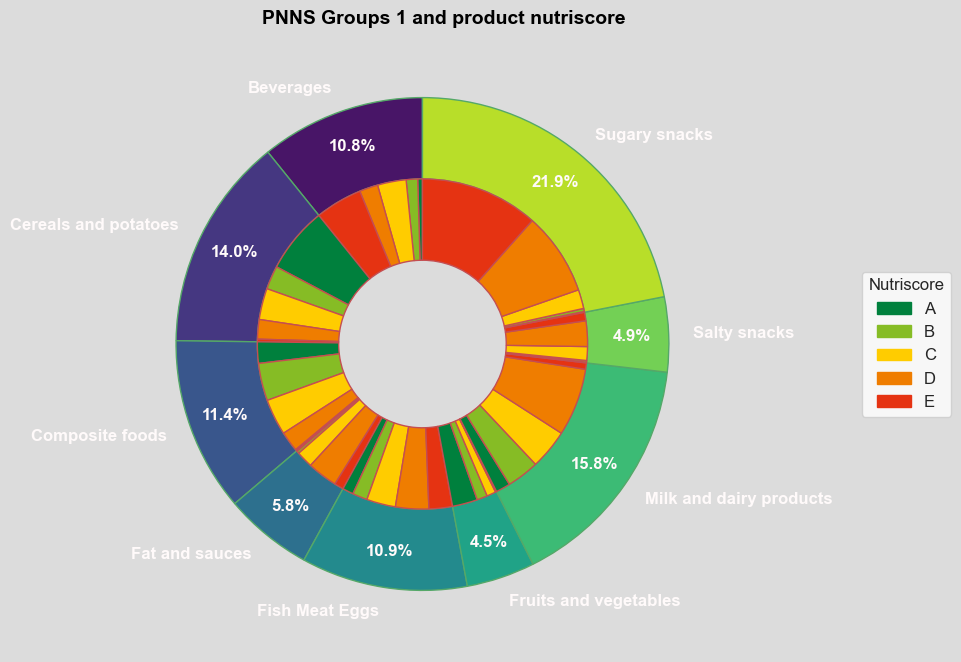

In [123]:
# plot nested donut chart by PNNS Group 1 and nutriscore
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor('gainsboro')
size = 0.33

# plot outer donut by PNNS Groups 1
ax.pie(food_facts_trim_final.groupby('pnns_groups_1')['code'].count(), radius=1,
       colors=viridis_sample, labels=data_pie_2.reset_index().pnns_groups_1, autopct=my_autopct,
       pctdistance=0.85, wedgeprops=dict(width=size, edgecolor='g'), textprops={'fontsize': 12, 'color':'snow',
                                                                                'fontweight':'bold'},startangle=90)

# plot inner donut by nutriscore
ax.pie(food_facts_trim_final.groupby(['pnns_groups_1','nutrition_grade_fr'])['code'].count(), radius=1-size,
      colors=nutri_palette, wedgeprops=dict(width=size, edgecolor='r'), startangle=90)

# add custom legend and colours
ax.legend(title="Nutriscore", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1), fontsize=12, labels=['A','B','C','D','E'])
leg = ax.get_legend()
leg.legendHandles[0].set_color(col_A)
leg.legendHandles[1].set_color(col_B)
leg.legendHandles[2].set_color(col_C)
leg.legendHandles[3].set_color(col_D)
leg.legendHandles[4].set_color(col_E)

# add title
plt.text(-0.65, 1.3, "PNNS Groups 1 and product nutriscore", fontsize=14, fontweight='bold', color='black')
plt.savefig("double_donut.png", bbox_inches='tight')
plt.show()

- PNNS Groups 1 including products of animal origin comprise mostly products with a poor nutriscore (C, D or E) whereas PNNS Groups 1 including products of plant origin comprise mostly products with a good nutriscore (A or B). 

### 6.2.2 - Normality tests

In [124]:
# perform Kolmogorov-Smirnov test on all continuous numerical variables in food data
cont_vars = food_facts_trim_final[['carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'fat_100g', 'saturated-fat_100g',
       'proteins_100g', 'sodium_100g', 'salt_100g', 'energy_100g_kCal']]

for column in cont_vars:
    print('********\n{}'.format(column))
    mu = food_facts_trim_final[column].mean()
    sigma = food_facts_trim_final[column].std()
    normed_column = (food_facts_trim_final[column] - mu) / sigma
    # stat, p = st.kstest(food_facts_trim_final[column], 'norm', 
    #                  args=(food_facts_trim_final[column].mean(), food_facts_trim_final[column].std()))
    stat, p = st.kstest(normed_column, 'norm')
    
    alpha = 0.05
    print("Statistic = {:.4f}".format(stat))
    print("p-value = {:.4f}".format(p))
    if p < alpha:  # null hypothesis: cont_vars column follows a Normal distribution
        print("Reject H0 : {} does not follow a normal distribution".format(column))
    else:
        print("Not enough information to reject H0: {} follows a normal distribution. ")

********
carbohydrates_100g
Statistic = 0.1804
p-value = 0.0000
Reject H0 : carbohydrates_100g does not follow a normal distribution
********
sugars_100g
Statistic = 0.2262
p-value = 0.0000
Reject H0 : sugars_100g does not follow a normal distribution
********
fiber_100g
Statistic = 0.2162
p-value = 0.0000
Reject H0 : fiber_100g does not follow a normal distribution
********
fat_100g
Statistic = 0.1905
p-value = 0.0000
Reject H0 : fat_100g does not follow a normal distribution
********
saturated-fat_100g
Statistic = 0.2338
p-value = 0.0000
Reject H0 : saturated-fat_100g does not follow a normal distribution
********
proteins_100g
Statistic = 0.1345
p-value = 0.0000
Reject H0 : proteins_100g does not follow a normal distribution
********
sodium_100g
Statistic = 0.2810
p-value = 0.0000
Reject H0 : sodium_100g does not follow a normal distribution
********
salt_100g
Statistic = 0.2809
p-value = 0.0000
Reject H0 : salt_100g does not follow a normal distribution
********
energy_100g_kCal
St

- The Kolmogorov-Smirnov test confirms that none of our continuous variables follows a Gaussian distribution. As this is a pre-requisite to all ANOVA analyses, we will perform non-parametric tests instead (Mann-Whitney or Kruskal-Wallis tests depending on the number of samples to test - see below in part 6.4). We will nevertheless perform Eta Squared calculations on one varialbe (sodium - see below in part 6.4.2.1).

## 6.2 - Bivariate analyses

### 6.2.1 - Pairplot

In [125]:
data = food_facts_trim_final[['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2',
       'nutrition_grade_fr', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'fat_100g', 'saturated-fat_100g',
       'proteins_100g', 'sodium_100g', 'salt_100g',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'additives_n', 'nutrition-score-fr_100g', 'energy_100g_kCal']]
data.shape

(42203, 18)

In [126]:
data.head()

code                  product_name          pnns_groups_1  \
0  0000000290616                  Salade Cesar  Fruits and vegetables   
1  0000001938067  Chaussons tressés aux pommes          Sugary snacks   
2  0000008237798               Quiche Lorraine        Composite foods   
3  0000020424640            Belgische Pralinen          Sugary snacks   
4  0000027533048      Luxury Christmas Pudding          Sugary snacks   

           pnns_groups_2 nutrition_grade_fr  carbohydrates_100g  sugars_100g  \
0             Vegetables                  C               23.00        0.000   
1     Biscuits and cakes                  C               38.70       24.700   
2  Pizza pies and quiche                  B                7.86        0.714   
3                 Sweets                  E               53.80       51.500   
4     Biscuits and cakes                  C               54.20       44.000   

   fiber_100g  fat_100g  saturated-fat_100g  proteins_100g  sodium_100g  \
0    2.000000     12.00                7.00          22.00     0.850000   
1    2.000000     10.70                2.00           3.33     0.255000   
2    0.357000      6.79                2.86           5.36     0.196000   
3    2.332528     33.30               21.10           4.70     0.035433   
4    4.700000      7.00                3.60           3.90     0.078700   

   salt_100g  ingredients_that_may_be_from_palm_oil_n  \
0   2.160000                                        0   
1   0.647000                                        0   
2   0.499000                                        0   
3   0.090000                                        0   
4   0.199898                                        0   

   ingredients_from_palm_oil_n  additives_n  nutrition-score-fr_100g  \
0                            0            0                      6.0   
1                            0            5                      9.0   
2                            0            3                      2.0   
3                            0            3                     26.0   
4                            0            5                     10.0   

   energy_100g_kCal  
0             289.0  
1             261.0  
2             114.0  
3             539.0  
4             307.0

In [127]:
data_pairs = data[['carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'fat_100g', 'saturated-fat_100g',
                   'proteins_100g', 'sodium_100g', 'salt_100g','nutrition_grade_fr','nutrition-score-fr_100g',
                   'energy_100g_kCal']]

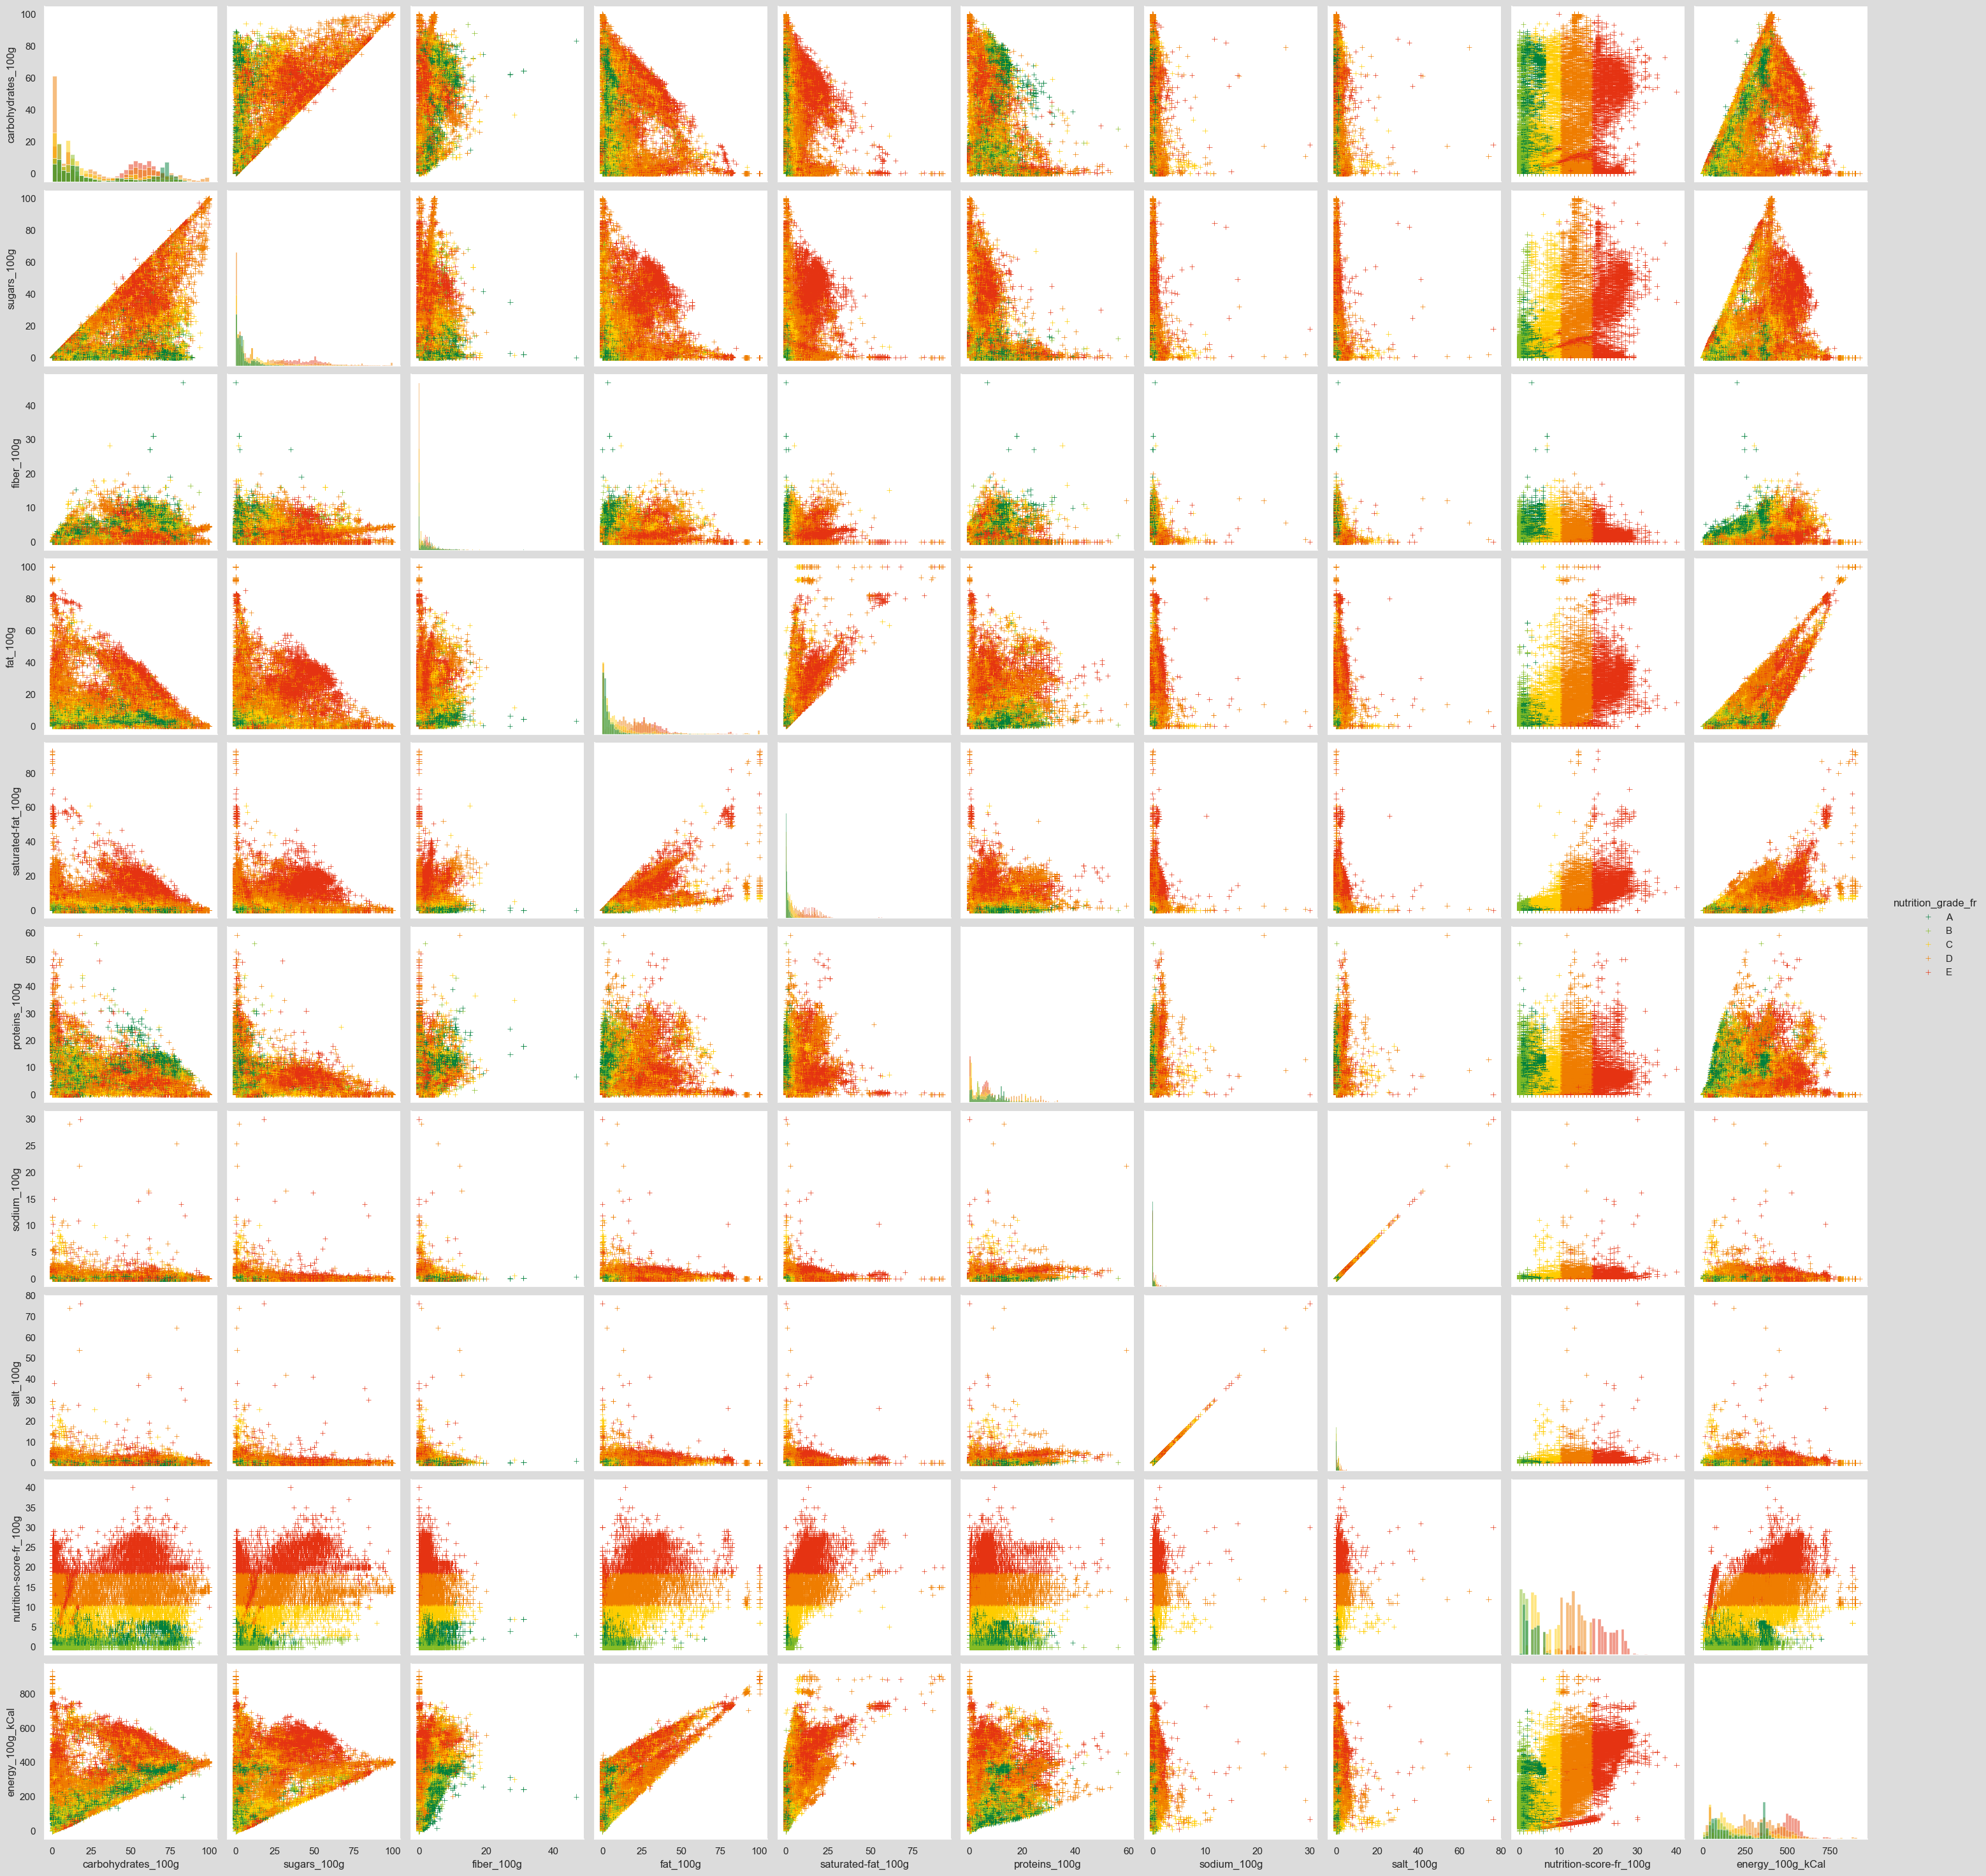

In [128]:
# compare correlation of continuous numerical variables in a pairplot

corr_pairs = sns.pairplot(data_pairs, kind='scatter', height=3, diag_kind='hist', 
                          markers="+", diag_kws= {'color': cyan, 'alpha': 0.5}, hue='nutrition_grade_fr', palette=nutri_palette)                                      
                                                                                                         

plt.savefig("data_pairplot.png")
plt.show()

### 6.2.2 - Correlation matrix

#### 6.2.2.1 - Pearson's ρ 

- The Pearson correlation coefficient is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. Source : https://en.wikipedia.org/wiki/Pearson_correlation_coefficient via https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

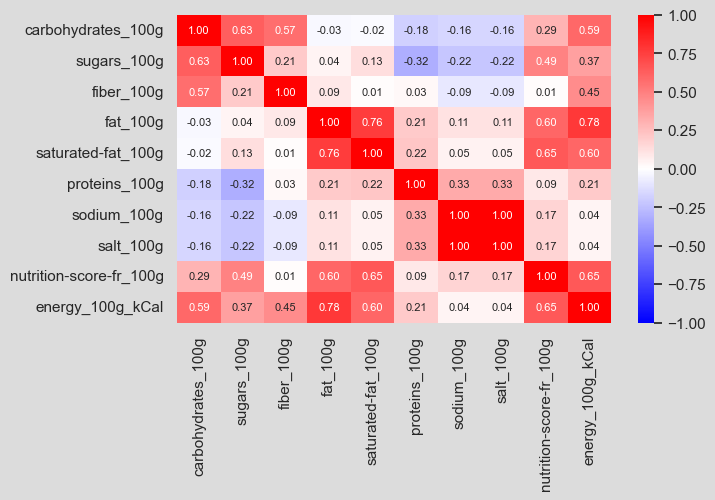

In [129]:
food_corrs_pear = data_pairs.corr(method='pearson', numeric_only=True)
fig, ax = plt.subplots(figsize=(7, 4))
food_corrs_pear_heatmap = sns.heatmap(food_corrs_pear.round(2), vmin=-1, vmax=1, annot=True, cmap="bwr", fmt="0.2f", 
                                 annot_kws={"fontsize":8})
plt.savefig("pearson_heatmap.png")
plt.show()

#### 6.2.2.2 - Spearman's ρ 

- Spearman's rank correlation coefficient or Spearman's ρ [...] is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. Source : https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient via https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

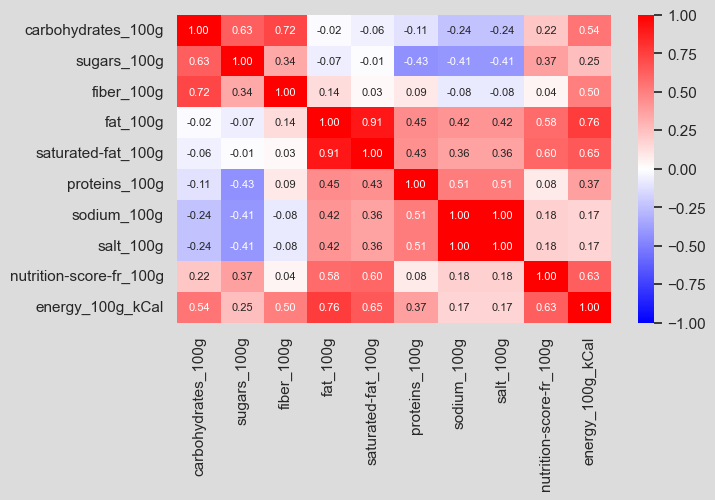

In [130]:
food_corrs_spear = data_pairs.corr(method='spearman', numeric_only=True)
fig, ax = plt.subplots(figsize=(7, 4))
food_corrs_spear_heatmap = sns.heatmap(food_corrs_spear.round(2), vmin=-1, vmax=1, annot=True, cmap="bwr", fmt="0.2f", 
                                 annot_kws={"fontsize":8})
plt.savefig("spearman_heatmap.png", bbox_inches="tight")
plt.show()

Interpretation - source : https://www.researchgate.net/figure/Grading-table-of-Spearman-correlation-coefficient-r_tbl2_331096265

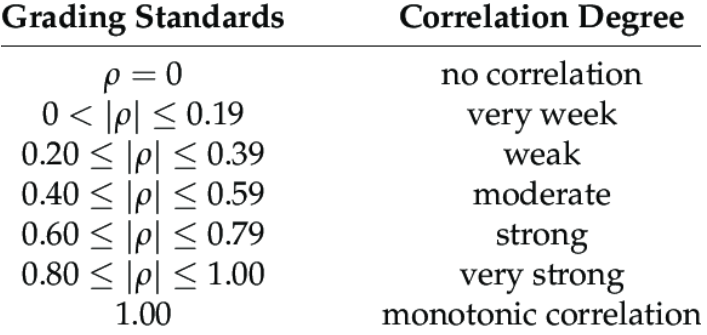

#### 6.2.2.3 - Kendall's 𝜏

- The Kendall rank correlation coefficient, commonly referred to as Kendall's τ coefficient (after the Greek letter τ, tau), is a statistic used to measure the ordinal association between two measured quantities. A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient. It is a measure of rank correlation: the similarity of the orderings of the data when ranked by each of the quantities. Both Kendall's 𝜏 and Spearman's 𝜌 can be formulated as special cases of a more general correlation coefficient. Its notions of concordance and discordance also appear in other areas of statistics, like the Rand index in cluster analysis. Source : https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient via https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

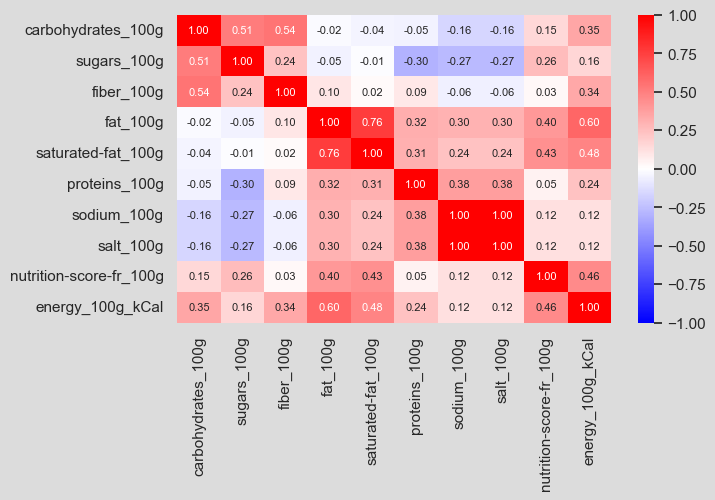

In [131]:
food_corrs_kend = data_pairs.corr(method='kendall', numeric_only=True)
fig, ax = plt.subplots(figsize=(7, 4))
food_corrs_kend_heatmap = sns.heatmap(food_corrs_kend.round(2), vmin=-1, vmax=1, annot=True, cmap="bwr", fmt="0.2f", 
                                 annot_kws={"fontsize":8})
plt.savefig("kendall_heatmap.png")
plt.show()

Interpretation - Source : https://blogs.sas.com/content/iml/2023/04/05/interpret-spearman-kendall-corr.html

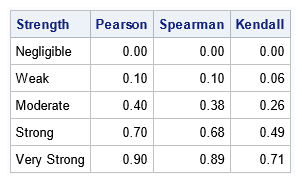

## 6.3 - Normalised PCA

In [132]:
X = data[['carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'fat_100g', 'saturated-fat_100g', 'proteins_100g', 'sodium_100g',
       'salt_100g','ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 'additives_n', 'energy_100g_kCal',
         'nutrition-score-fr_100g']].copy()

# define n as sample size and p as number of variables
n = X.shape[0]
p = X.shape[1]

features = X.columns
products = X.index

# instanciate standard scaler
sc = StandardScaler()

# transform data
X_scaled = sc.fit_transform(X)

# check transformation
print(np.mean(X_scaled,axis=0))
print(np.std(X_scaled,axis=0,ddof=0))

[ 1.67689635e-16 -4.71416643e-18 -1.34690470e-18  1.40414814e-16
  1.34690470e-18  1.07752376e-17  1.30649755e-16 -3.09788080e-17
  5.38761878e-18 -6.76819609e-17  7.84571985e-17  1.34017017e-16
  8.65386267e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [133]:
# instanciate PCA
pca = PCA(svd_solver='full', n_components=p, random_state=42)
# print(pca)

# use pca = PCA(n_components=0.80) to capture 80% of total variance
# the algorithm automatically selects the best number of principal components that keep 80%
# of the variance in the original data.
# to know how many components the algorithm has selected, run pca.n_components_
pca.fit(X_scaled)

PCA(n_components=13, random_state=42, svd_solver='full')

### Scree plot - Kaiser rule

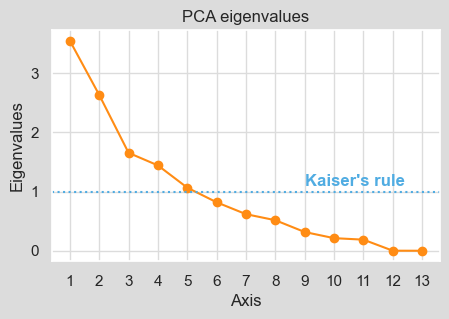

In [134]:
# plot data
plt.figure(figsize=(5,3))
plt.plot(range(1, p+1), pca.explained_variance_, color=zest, marker='o')
plt.xlabel("Axis")
plt.xticks(np.arange(1, p+1, 1))
plt.yticks([0, 1, 2, 3])
plt.ylabel("Eigenvalues")
plt.axhline(y=1, color=ciel, linestyle=':')
plt.text(9, 1.1, "Kaiser's rule", color=ciel, fontweight='bold')
plt.title("PCA eigenvalues")
plt.grid(axis='both', color='gainsboro')
plt.savefig("eigenvalues.png", bbox_inches='tight')
plt.show(block=False)

### Scree plot - % explained variance

In [135]:
# create data
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
a_list = range(1, p+1)
list(a_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

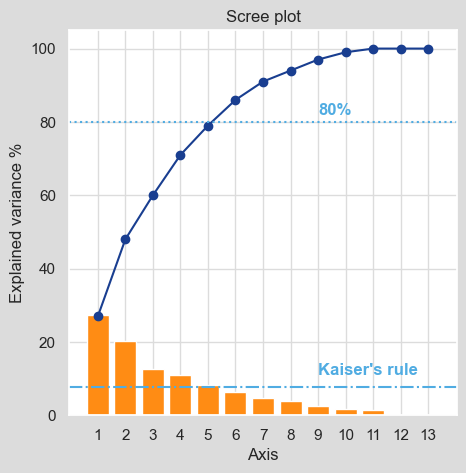

In [136]:
# plot data
plt.figure(figsize=(5,5))
plt.bar(a_list, scree,color=zest)
plt.plot(a_list, scree_cum, color=cyan, marker='o')
plt.xlabel("Axis")
plt.xticks(np.arange(1, p+1, 1))
plt.ylabel("Explained variance %")
plt.axhline(y=100/len(a_list), color=ciel, linestyle='-.') # this is equivalent to Kaiser's Rule
plt.text(9, 82, "80%", color=ciel, fontweight='bold')
plt.axhline(y=80, color=ciel, linestyle=':')
plt.text(9, 11, "Kaiser's rule", color=ciel, fontweight='bold')
plt.title("Scree plot")
plt.grid(axis='both', color='gainsboro')
plt.savefig("scree.png", bbox_inches='tight')
plt.show(block=False)

- The first 5 axes are required to explain 80% of the variance in the data;
- Kaiser's rule and the 80% rule give the same result here : 5 axes are required in order to keep 80% of information.

### Components analysis

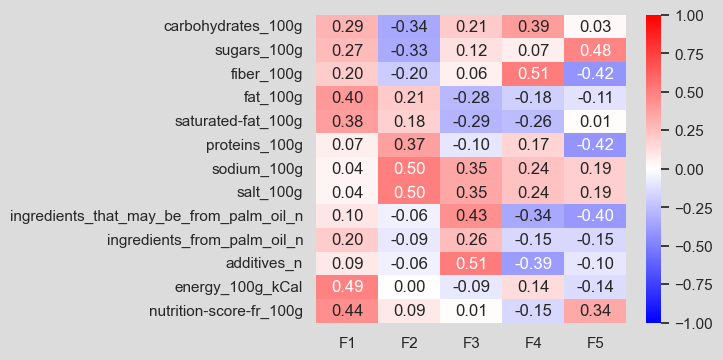

In [137]:
# create components dataframe
acp_components = pd.DataFrame(pca.components_)
acp_components.columns = X.columns
acp_components.index = [f"F{i}" for i in a_list]

# plot heatmap
fig, ax = plt.subplots(figsize=(5, 4))
acp_heatmap = sns.heatmap(acp_components.T[['F1', 'F2', 'F3', 'F4', 'F5']].round(2), vmin=-1, vmax=1, annot=True, cmap="bwr",
                          fmt="0.2f")
plt.savefig("acp_heatmap.png", bbox_inches="tight")

**Interpretation:**
- 1st axis : energetic value of products, which is predominantly a function of the fat and sugar content => cf. ready meals & sugary snacks
- 2nd axis : products high in salt and protein, and low in fiber and carbs => cf. products of animal origin
- 3rd axis : salty products, high in palm oil and additives and low in fiber, fat and protein => cf. ultra-HPF

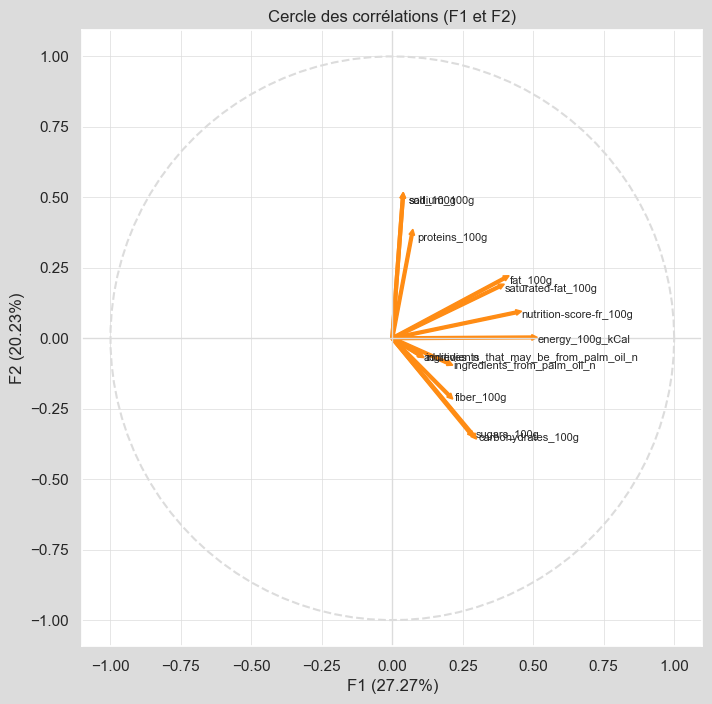

In [138]:
# draw correlation circle for axes 1 and 2
x_y = (0,1)
correlation_graph(pca, x_y, features, col=zest)

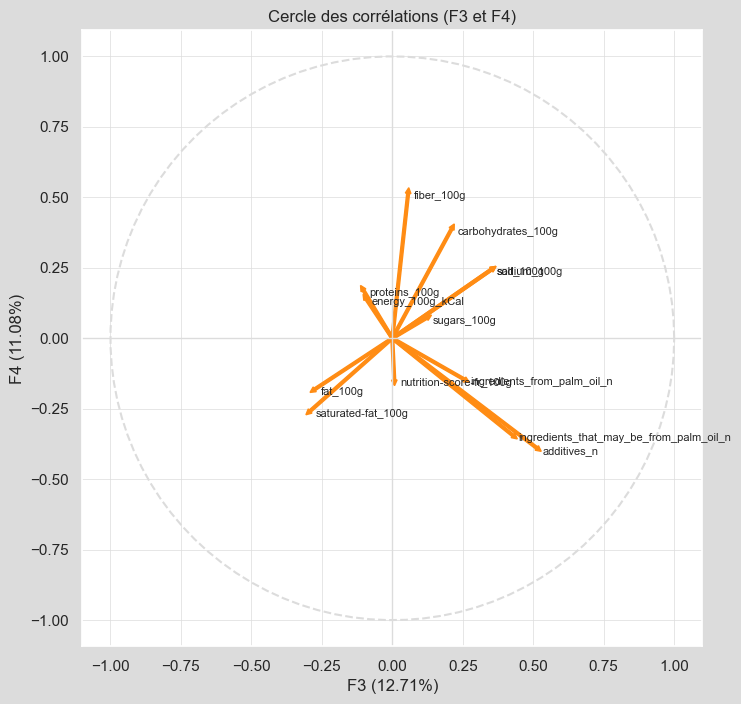

In [139]:
# draw correlation circle for axes 3 and 4
x_y = (2,3)
correlation_graph(pca, x_y, features, col=zest)

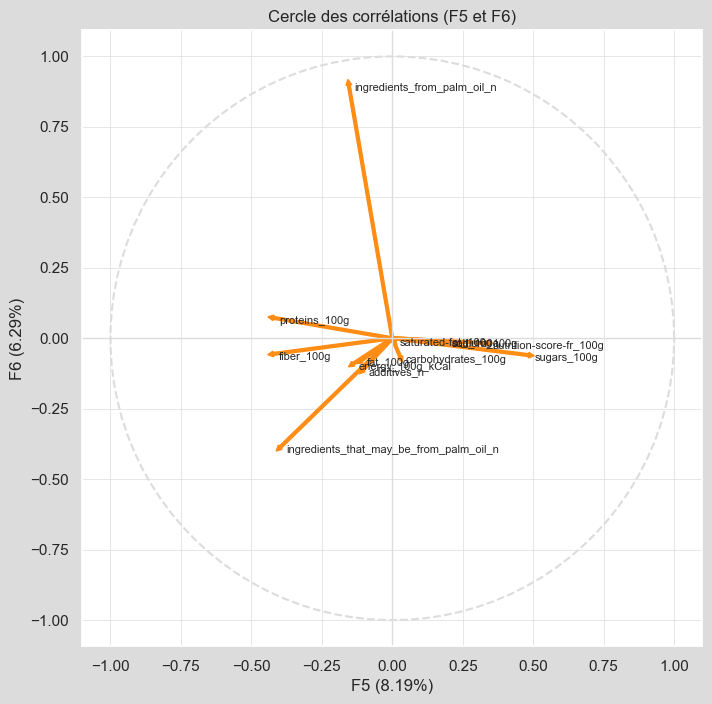

In [140]:
# draw correlation circle for axes 5 and 6
x_y = (4,5)
correlation_graph(pca, x_y, features, col=zest)

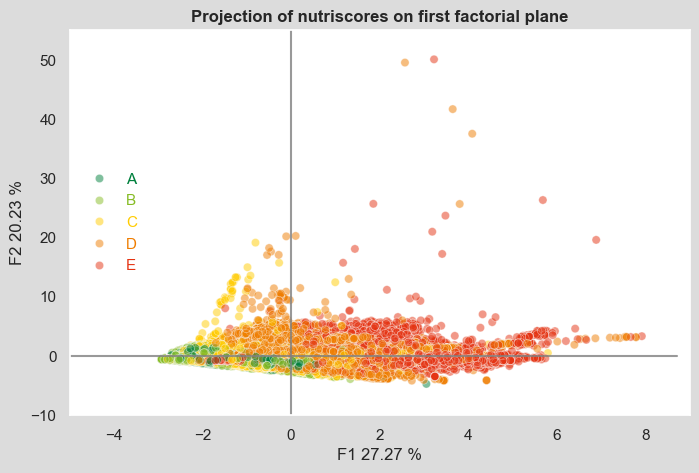

In [141]:
# plot products by nutriscore on 1st factorial plane
x1_y1 = [0,1]
X_proj = pca.transform(X_scaled)
X_ = np.array(X_proj)
labels = []
x1, y1 = x1_y1
fig, ax = plt.subplots(1, 1, figsize=[8,5])
clusters_1=food_facts_trim_final['nutrition_grade_fr']
nutri_plane_1 = sns.scatterplot(data=None, x=X_[:, x1], y=X_[:, y1], hue=clusters_1, palette=nutri_palette, legend='auto',
                               alpha=0.5)
v1 = str(round(100*pca.explained_variance_ratio_[x1],2))  + " %"
v2 = str(round(100*pca.explained_variance_ratio_[y1],2))  + " %"
ax.set_xlabel(f'F{x1+1} {v1}')
ax.set_ylabel(f'F{y1+1} {v2}')
x1_max = np.abs(X_[:, x1]).max() *1.1
y1_max = np.abs(X_[:, y1]).max() *1.1
plt.xlim(-5,9)
plt.ylim(-10,55)
plt.legend(title='', labelcolor=[col_A, col_B, col_C, col_D, col_E], frameon=False, loc='center left')
plt.title('Projection of nutriscores on first factorial plane', fontsize=12, fontweight='bold')
plt.plot([-x1_max, x1_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y1_max, y1_max], color='grey', alpha=0.8)
plt.savefig("nutri_plane_1.png", bbox_inches="tight")
plt.show()

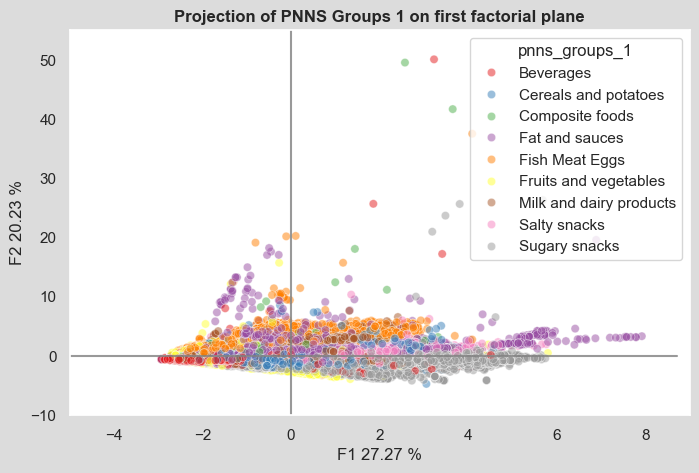

In [142]:
# plot products by PNNS Groups 1 on 1st factorial plane
x1_y1 = [0,1]
X_proj = pca.transform(X_scaled)
X_ = np.array(X_proj)
labels = []
x1, y1 = x1_y1
fig, ax = plt.subplots(1, 1, figsize=[8,5])
clusters_1b=food_facts_trim_final['pnns_groups_1']
nutri_plane_1 = sns.scatterplot(data=None, x=X_[:, x1], y=X_[:, y1], hue=clusters_1b, palette='Set1', legend='auto',
                               alpha=0.5)
v1 = str(round(100*pca.explained_variance_ratio_[x1],2))  + " %"
v2 = str(round(100*pca.explained_variance_ratio_[y1],2))  + " %"
ax.set_xlabel(f'F{x1+1} {v1}')
ax.set_ylabel(f'F{y1+1} {v2}')
x1_max = np.abs(X_[:, x1]).max() *1.1
y1_max = np.abs(X_[:, y1]).max() *1.1
plt.xlim(-5,9)
plt.ylim(-10,55)
plt.title('Projection of PNNS Groups 1 on first factorial plane', fontsize=12, fontweight='bold')
plt.plot([-x1_max, x1_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y1_max, y1_max], color='grey', alpha=0.8)
plt.savefig("nutri_plane_1b.png", bbox_inches="tight")
plt.show()

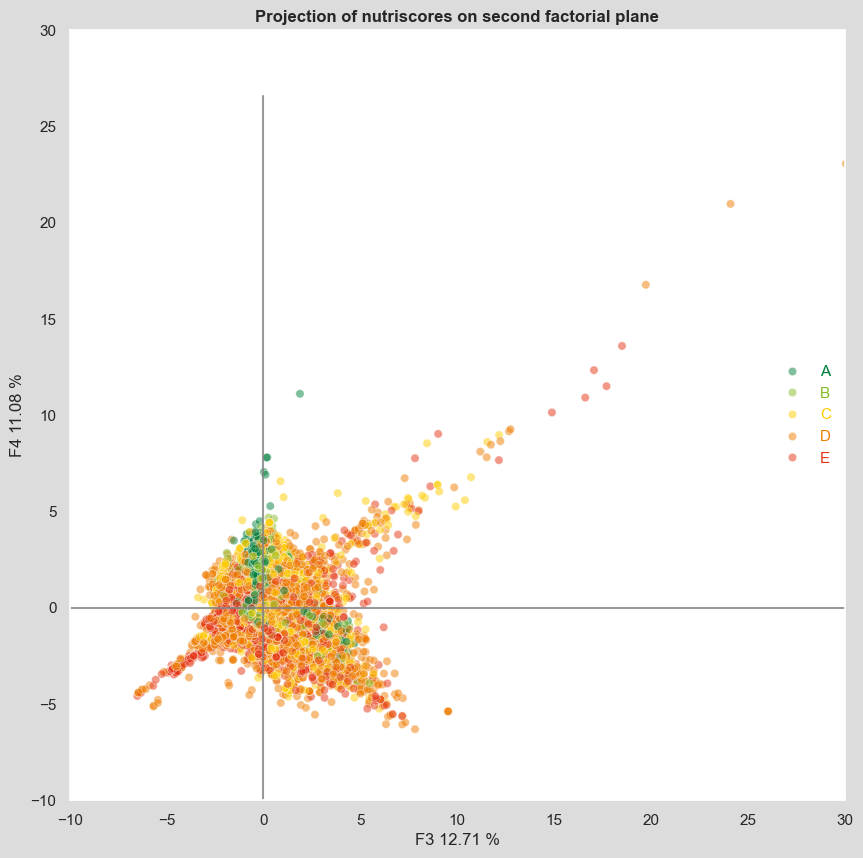

In [143]:
# plot products by nutriscore on 2nd factorial plane
x2_y2 = [2,3]
x2, y2 = x2_y2
fig, ax = plt.subplots(1, 1, figsize=[10,10])
nutri_plane_2 = sns.scatterplot(data=None, x=X_[:, x2], y=X_[:, y2], hue=clusters_1, palette=nutri_palette, legend='auto',
                               alpha=0.5)
v2 = str(round(100*pca.explained_variance_ratio_[x2],2))  + " %"
v3 = str(round(100*pca.explained_variance_ratio_[y2],2))  + " %"
ax.set_xlabel(f'F{x2+1} {v2}')
ax.set_ylabel(f'F{y2+1} {v3}')
x2_max = np.abs(X_[:, x2]).max() *1.1
y2_max = np.abs(X_[:, y2]).max() *1.1
plt.xlim(-10,30)
plt.ylim(-10,30)
plt.legend(title='', labelcolor=[col_A, col_B, col_C, col_D, col_E], frameon=False, loc='center right')
plt.title('Projection of nutriscores on second factorial plane', fontsize=12, fontweight='bold')
plt.plot([-x2_max, x2_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y2_max, y2_max], color='grey', alpha=0.8)
plt.savefig("nutri_plane_2.png")
plt.show()

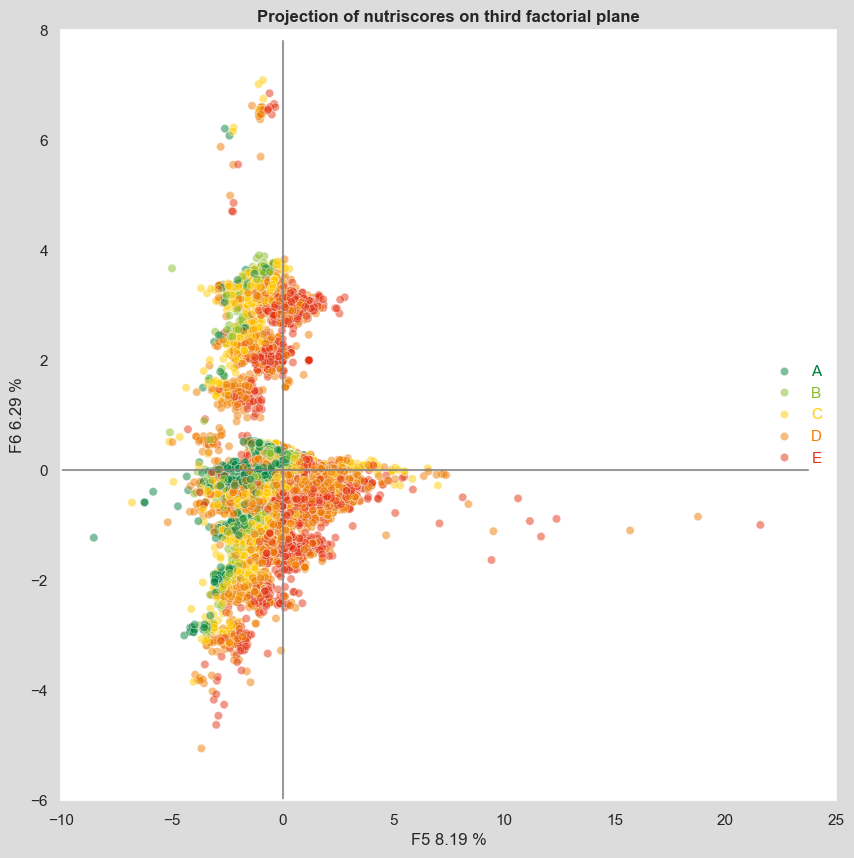

In [144]:
# plot products by nutriscore on 3rd factorial plane
x3_y3 = [4,5]
x3, y3 = x3_y3
fig, ax = plt.subplots(1, 1, figsize=[10,10])
nutri_plane_3 = sns.scatterplot(data=None, x=X_[:, x3], y=X_[:, y3], hue=clusters_1, palette=nutri_palette, legend='auto',
                               alpha=0.5)
v4 = str(round(100*pca.explained_variance_ratio_[x3],2))  + " %"
v5 = str(round(100*pca.explained_variance_ratio_[y3],2))  + " %"
ax.set_xlabel(f'F{x3+1} {v4}')
ax.set_ylabel(f'F{y3+1} {v5}')
x3_max = np.abs(X_[:, x3]).max() *1.1
y3_max = np.abs(X_[:, y3]).max() *1.1
plt.xlim(-10,25)
plt.ylim(-6,8)
plt.legend(title='', labelcolor=[col_A, col_B, col_C, col_D, col_E], frameon=False, loc='center right')
plt.title('Projection of nutriscores on third factorial plane', fontsize=12, fontweight='bold')
plt.plot([-x3_max, x3_max], [0, 0], color='grey', alpha=0.8)
plt.plot([0,0], [-y3_max, y3_max], color='grey', alpha=0.8)
plt.savefig("nutri_plane_3.png")
plt.show()

## 6.4 - Statistical tests

### 6.4.1 - Categorical variables

- For all khi-2 tests in this section, we are trying to find out if our pairs of qualitative variables are independant. A contingency khi-2 test is appropriate in such case;
- We test H0 : the actual distribution of observations is identical across all categories to the expected theoretical frequency for each such variable i.e. the variables are independent, vs. the alternative hypothesis H1, i.e. the actual distribution of observations differs significantly from the expected theoretical frequency for each such variable i.e. the variables are not independent;
- We chose α = 5% as the test significance level;
- Cramer's V will be calculated to characterise the strength of the relation between variables where non-independance is found.

#### 6.4.1.1 - Organic products and nutriscore

In [145]:
# create contingency table for organic products and nutriscore (empirical distribution)
org_nutri = pd.crosstab(food_facts_trim_final['organic_product'], food_facts_trim_final['nutrition_grade_fr'], 
                        margins=True, margins_name='Total')
org_nutri

nutrition_grade_fr     A     B     C      D     E  Total
organic_product                                         
False               5590  5347  8932  11975  8748  40592
True                 400   331   296    368   216   1611
Total               5990  5678  9228  12343  8964  42203

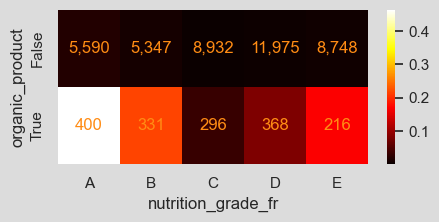

In [146]:
# select total column
freq_org_1 = org_nutri.loc[:, ['Total']]

# select total line
freq_nutri_1 = org_nutri.loc[['Total'], :]

# calculate number of observations in sample
n2 = food_facts_trim_final.shape[0]

# divide by number of observations to find theoretical distribution table
dist_theo_1 = freq_org_1.dot(freq_nutri_1) / n2
dist_calc_1 = (org_nutri - dist_theo_1) ** 2 / dist_theo_1
chi_2_1 = dist_calc_1.sum().sum()
dist_norm_1 = dist_calc_1/chi_2_1
sns.set(rc={'figure.figsize':(5,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
org_nutri_khi_2_1 = sns.heatmap(dist_norm_1.iloc[:-1, :-1], annot=org_nutri.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":zest})

plt.savefig("org_nutri_khi_2_1.png", bbox_inches='tight')

plt.show()

In [147]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
org_nutri_vals = org_nutri.loc[:, org_nutri.columns != 'Total'].drop(index=['Total'])
org_nutri_vals

nutrition_grade_fr     A     B     C      D     E
organic_product                                  
False               5590  5347  8932  11975  8748
True                 400   331   296    368   216

In [148]:
# perform contingent khi-2 test for H0: variables are independant and risk level alpha=5%
alpha = 0.05
stat1_1, p1_1, dof1_1, expected1_1 = st.chi2_contingency(org_nutri_vals)
print("khi-2 value:", round(stat1_1, 2))
print("p-value:", p1_1)
print("Degrees of freedom:", dof1_1)
print("Theoretical khi-2:", round(st.chi2.ppf(alpha, dof1_1), 4))
print("Theoretical distribution:\n", np.round(expected1_1, 0))
if p1_1 < alpha:
    print('Reject H0. Variables are not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_1.tofile("effectifs_theoriques_org_nutri.csv", sep=','))

khi-2 value: 277.32
p-value: 8.43537865067146e-59
Degrees of freedom: 4
Theoretical khi-2: 0.7107
Theoretical distribution:
 [[ 5761.  5461.  8876. 11872.  8622.]
 [  229.   217.   352.   471.   342.]]
Reject H0. Variables are not independant.
None


In [149]:
# Calculate Cramer's V
min_dim_1 = min(org_nutri_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_1 = np.sqrt(chi_2_1/(n2 * min_dim_1))
print("Cramer's V:", round(c_v_1,2))
if c_v_1 > 0 and c_v_1 < 0.05:
    print("No or very weak relationship")
elif c_v_1 >= 0.05 and c_v_1 < 0.1:
    print("Weak relationship")
elif c_v_1 >= 0.1 and c_v_1 < 0.15:
    print("Moderate relationship")
elif c_v_1 >= 0.15 and c_v_1 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")

Cramer's V: 0.08
Weak relationship


#### 6.4.1.2 - Organic products and number of additives

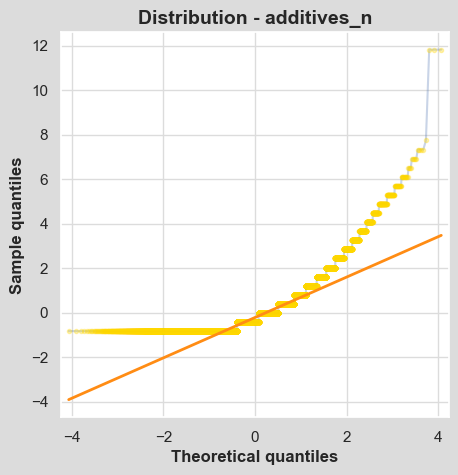

In [150]:
# analyse distribution of number of additives with a QQ plot
fig, ax = plt.subplots(1, figsize=(5,5))
graph6412 = sm.qqplot(food_facts_trim_final['additives_n'],marker='.', markerfacecolor='gold',
                     markeredgecolor='gold', alpha=0.3, line="q", linestyle='solid', fit=True, ax=ax)
plt.xlabel("Theoretical quantiles", fontweight='bold', fontsize=12)
plt.ylabel("Sample quantiles", fontweight='bold', fontsize=12)
plt.title('Distribution - additives_n',fontweight='bold', fontsize=14)
plt.grid(axis='both', color='gainsboro')
ax.get_lines()[1].set_color(zest)
ax.get_lines()[1].set_linewidth("2")
plt.savefig("QQ6412.png", bbox_inches='tight')

- The QQ plot allows to determine graphically that the distribution of the number of additives in products is not Gaussian. This varaible will therefore be studied further using non-parametric tests.

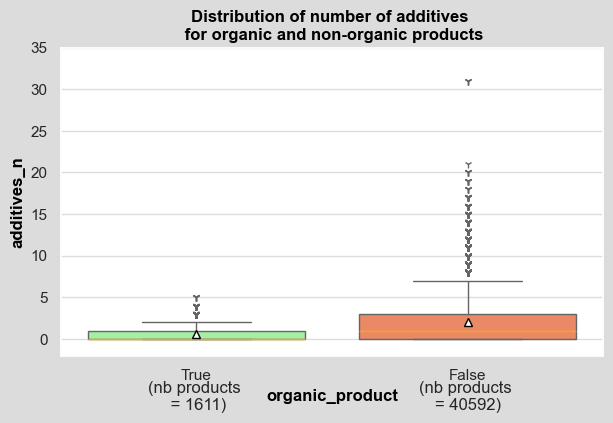

In [151]:
# plot distribution
sns.set(rc={'figure.figsize':(7,4), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_score_add = sns.boxplot(data=food_facts_trim_final, x="organic_product",
                                       y="additives_n", hue="organic_product", order=['True', 'False'],
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette=['coral','palegreen'], legend=False)
plt.ylim(-2, 35)
plt.xlabel("organic_product", fontweight='bold', fontsize=12, color='black')
plt.ylabel("additives_n", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of number of additives \n for organic and non-organic products",fontweight='bold', fontsize=12,
          color='black')
plt.grid(axis='y', color='gainsboro')

# add number of products for each group
nb_products_3 = food_facts_trim_final.groupby('organic_product')['code'].count().reset_index()
plt.text(0, -5,"(nb products \n = {})".format(nb_products_3.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -5,"(nb products \n= {})".format(nb_products_3.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.savefig("box_score_add.png", bbox_inches='tight')
plt.show()

- It seems that the median number of additives contained in organic products is not identical to that of conventional products. Let us verify this hypothesis by a statistical test. As we seek to analyze the relationship between a qualitative variable and a quantitative variable, but the number of additives is not distributed according to a normal law, the ANOVA test is not appropriate here and we will use the non-parametric test by Mann-Whitney.
- We set H0: the number of additives is the same for organic and conventional products, which we test against the alternative hypothesis H1 at the threshold α = 5%.

In [152]:
# perform Mann-Whitney U test
organic = food_facts_trim_final.loc[food_facts_trim_final['organic_product']==True]['additives_n'].values
regular = food_facts_trim_final.loc[food_facts_trim_final['organic_product']==False]['additives_n'].values
s_6412, p_6412 = st.mannwhitneyu(organic, regular, alternative='less', method='asymptotic')
print(s_6412)
print(p_6412)

19708726.0
6.811425128833423e-171


The Mann-Whitney test leads to the conclusion that organic products contain significantly fewer additives than conventional products.

#### 6.4.1.3 - Organic products and palm oil

In [153]:
# create contingency table for organic products and palm oil (empirical distribution)
org_oil = pd.crosstab(food_facts_trim_final['organic_product'], food_facts_trim_final['contains_palm_oil'], 
                        margins=True, margins_name='Total')
org_oil

contains_palm_oil  False  True  Total
organic_product                      
False              34032  6560  40592
True                1545    66   1611
Total              35577  6626  42203

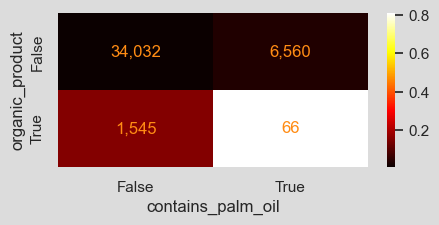

In [154]:
# select total column
freq_org_3 = org_oil.loc[:, ['Total']]

# select total line
freq_oil_3 = org_oil.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_3 = freq_org_3.dot(freq_oil_3) / n2
dist_calc_3 = (org_oil - dist_theo_3) ** 2 / dist_theo_3
chi_2_3 = dist_calc_3.sum().sum()
dist_norm_3 = dist_calc_3/chi_2_3
sns.set(rc={'figure.figsize':(5,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
org_nutri_khi_2_3 = sns.heatmap(dist_norm_3.iloc[:-1, :-1], annot=org_oil.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":zest})

plt.savefig("org_oil_khi_2_3.png", bbox_inches='tight')

plt.show()

- We seek to know if the palm oil content is independent of the biological character of the product. These 2 variables being qualitative, a chi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical for organic products or not at the expected theoretical frequencies, i.e. the biological character of the product does not affect its palm oil content; And
- H1 (alternative hypothesis): the proportion of products containing palm oil depends on the biological character of the product, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [155]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
org_oil_vals = org_oil.loc[:, org_oil.columns != 'Total'].drop(index=['Total'])
org_oil_vals

contains_palm_oil  False  True
organic_product               
False              34032  6560
True                1545    66

In [156]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_3, p1_3, dof1_3, expected1_3 = st.chi2_contingency(org_oil_vals)
print("khi-2 value:", round(stat1_3, 2))
print("p-value", p1_3)
print("Degrees of freedom:", dof1_3)
print("Theoretical khi-2:", round(st.chi2.ppf(alpha, dof1_3), 4))
print("Theoretical distribution:\n", np.round(expected1_3, 0))
if p1_3 < alpha:
    print('Reject H0. Variables are not independant.')
else:
    print("Not enough information to reject H0")
print(expected1_3.tofile("effectifs_theoriques_org_oil.csv", sep=','))

khi-2 value: 169.48
p-value 9.6191850051611e-39
Degrees of freedom: 1
Theoretical khi-2: 0.0039
Theoretical distribution:
 [[34219.  6373.]
 [ 1358.   253.]]
Reject H0. Variables are not independant.
None


In [157]:
# Calculate Cramer's V
min_dim_3 = min(org_oil_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_3 = np.sqrt(chi_2_3/(n2 * min_dim_3))
print("Cramer's V:", round(c_v_3,2))
if c_v_3 > 0 and c_v_3 < 0.05:
    print("No or very weak relationship")
elif c_v_3 >= 0.05 and c_v_3 < 0.1:
    print("Weak relationship")
elif c_v_3 >= 0.1 and c_v_3 < 0.15:
    print("Moderate relationship")
elif c_v_3 >= 0.15 and c_v_3 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")

Cramer's V: 0.06
Weak relationship


- The khi-2 and its p-value make it possible to test the existence of a link between 2 qualitative variables but say nothing about the intensity of the link if it exists. We use Cramer's V to characterize this intensity.
- Cramer's V allows us to conclude that, although the differences between the qualitative variables organic product and palm oil content are statistically significant, the dependence between these two variables is in fact weak and (according to the heatmap) the products biological factors contribute the most to this weak non-independence.

#### 6.4.1.4 - Organic products and PNNS Groups 1

In [158]:
# create contingency table for diet products and nutriscore (empirical distribution)
org_pnns = pd.crosstab(food_facts_trim_final['organic_product'], food_facts_trim_final['pnns_groups_1'], 
                        margins=True, margins_name='Total')
org_pnns

pnns_groups_1    Beverages  Cereals and potatoes  Composite foods  \
organic_product                                                     
False                 4288                  5549             4743   
True                   268                   356               80   
Total                 4556                  5905             4823   

pnns_groups_1    Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
organic_product                                                          
False                      2360            4471                   1799   
True                         87             132                     95   
Total                      2447            4603                   1894   

pnns_groups_1    Milk and dairy products  Salty snacks  Sugary snacks  Total  
organic_product                                                               
False                               6345          2048           8989  40592  
True                                 308            23            262   1611  
Total                               6653          2071           9251  42203

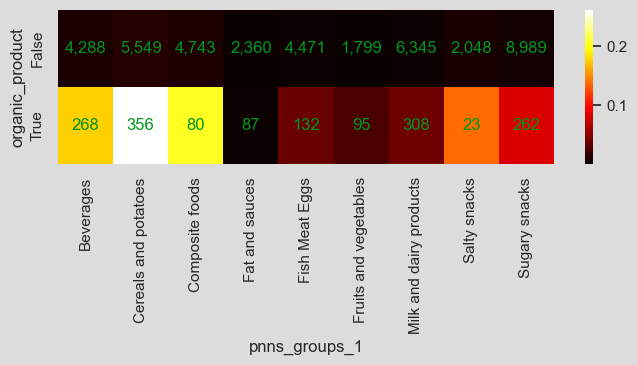

In [159]:
# select total column
freq_org_4 = org_pnns.loc[:, ['Total']]

# select total line
freq_pnns_4 = org_pnns.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_4 = freq_org_4.dot(freq_pnns_4) / n2
dist_calc_4 = (org_pnns - dist_theo_4) ** 2 / dist_theo_4
chi_2_4 = dist_calc_4.sum().sum()
dist_norm_4 = dist_calc_4/chi_2_4
sns.set(rc={'figure.figsize':(8,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
org_nutri_khi_2_5 = sns.heatmap(dist_norm_4.iloc[:-1, :-1], annot=org_pnns.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":sap})

plt.savefig("org_pnns_khi_2_4.png", bbox_inches='tight')

plt.show()

- We seek to know whether the biological character of the product is independent of the PNNS 1 group to which it belongs. These 2 variables being qualitative, a khi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical for the 9 PNNS Groups 1 at the expected theoretical frequencies, i.e. the biological character of the product is not affected by the PNNS group 1 to which it belongs; And
- H1 (alternative hypothesis): the proportion of products in each PNNS group 1 is affected by the biological character of the product, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [160]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
org_pnns_vals = org_pnns.loc[:, org_pnns.columns != 'Total'].drop(index=['Total'])
org_pnns_vals

pnns_groups_1    Beverages  Cereals and potatoes  Composite foods  \
organic_product                                                     
False                 4288                  5549             4743   
True                   268                   356               80   

pnns_groups_1    Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
organic_product                                                          
False                      2360            4471                   1799   
True                         87             132                     95   

pnns_groups_1    Milk and dairy products  Salty snacks  Sugary snacks  
organic_product                                                        
False                               6345          2048           8989  
True                                 308            23            262

In [161]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_4, p1_4, dof1_4, expected1_4 = st.chi2_contingency(org_pnns_vals)
print("khi-2:", round(stat1_4, 2))
print("p-value", p1_4)
print("Degrees of freedom:", dof1_4)
print("Theoretical khi-2:", round(st.chi2.ppf(alpha, dof1_4), 4))
print("Theoretical distribution:\n", np.round(expected1_4, 0))
if p1_4 < alpha:
    print('Reject H0. Variables not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_4.tofile("effectifs_theoriques_org_pnns.csv", sep=','))

khi-2: 289.69
p-value 6.434354503299883e-58
Degrees of freedom: 8
Theoretical khi-2: 2.7326
Theoretical distribution:
 [[4382. 5680. 4639. 2354. 4427. 1822. 6399. 1992. 8898.]
 [ 174.  225.  184.   93.  176.   72.  254.   79.  353.]]
Reject H0. Variables not independant.
None


In [162]:
# Calculate Cramer's V
min_dim_4 = min(org_pnns_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_4 = np.sqrt(chi_2_4/(n2 * min_dim_4))
print("Cramer's V:", round(c_v_4,2))
if c_v_4 > 0 and c_v_4 < 0.05:
    print("No or very weak relationship")
elif c_v_4 >= 0.05 and c_v_4 < 0.1:
    print("Weak relationship")
elif c_v_4 >= 0.1 and c_v_4 < 0.15:
    print("Moderate relationship")
elif c_v_4 >= 0.15 and c_v_4 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")

Cramer's V: 0.08
Weak relationship


- The khi-2 and its p-value make it possible to test the existence of a link between 2 qualitative variables but say nothing about the intensity of the link if it exists. We use Cramer's V to characterize this intensity.
- Cramer's V allows us to conclude that, although the differences between the qualitative variables light product and PNNS group 1 are statistically significant, the dependence between these two variables is in fact moderate and (according to the heatmap) the products of the Cereals groups & Potatoes and Composite Foods contribute the most to this moderate non-independence.

#### 6.4.1.5 - Diet products and additives

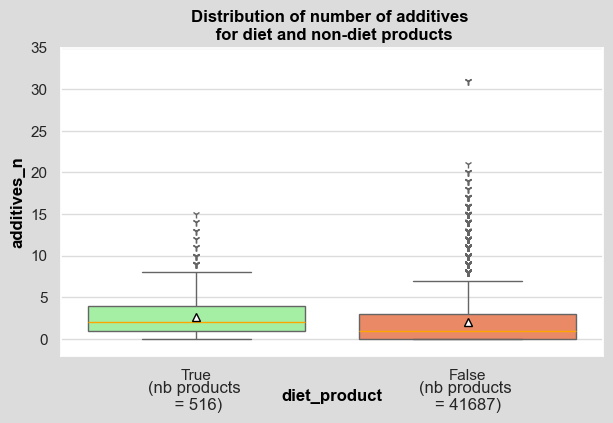

In [163]:
# plot distribution of 'additives_n' by 'diet_product'
sns.set(rc={'figure.figsize':(7,4), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_score_diet = sns.boxplot(data=food_facts_trim_final, x="diet_product",
                                       y="additives_n", hue="diet_product", order=['True', 'False'],
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette=['coral','palegreen'], legend=False)
plt.ylim(-2, 35)
plt.xlabel("diet_product", fontweight='bold', fontsize=12, color='black')
plt.ylabel("additives_n", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of number of additives \n for diet and non-diet products",fontweight='bold', fontsize=12,
          color='black')
plt.grid(axis='y', color='gainsboro')

# add number of products for each group
nb_products_4 = food_facts_trim_final.groupby('diet_product')['code'].count().reset_index()
plt.text(0, -5,"(nb products \n = {})".format(nb_products_4.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -5,"(nb products \n= {})".format(nb_products_4.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.savefig("box_score_diet.png", bbox_inches='tight')
plt.show()

- It seems that the median number of additives contained in diet products is not identical to that of conventional products. Let us verify this hypothesis by a statistical test. As we seek to analyze the relationship between a qualitative variable and a quantitative variable, but the number of additives is not distributed according to a normal law, the ANOVA test is not appropriate here and we will use the non-parametric test by Mann-Whitney.
- We set H0: the number of additives is the same for diet and conventional products, which we test against the alternative hypothesis H1 at the threshold α = 5%.

In [164]:
# perform Mann-Whitney U test
diet = food_facts_trim_final.loc[food_facts_trim_final['diet_product']==True]['additives_n'].values
non_diet = food_facts_trim_final.loc[food_facts_trim_final['diet_product']==False]['additives_n'].values
s_6415, p_6415 = st.mannwhitneyu(diet, non_diet, alternative='greater', method='asymptotic')
print(s_6415)
print(p_6415)

12497721.0
3.692289156016294e-11


- The Mann-Whitney test leads to the conclusion that so-called "diet" products contain significantly more additives than conventional products.

#### 6.4.1.6 - Diet products and palm oil

In [165]:
# create contingency table for diet products and nutriscore (empirical distribution)
diet_oil = pd.crosstab(food_facts_trim_final['diet_product'], food_facts_trim_final['contains_palm_oil'], 
                        margins=True, margins_name='Total')
diet_oil

contains_palm_oil  False  True  Total
diet_product                         
False              35140  6547  41687
True                 437    79    516
Total              35577  6626  42203

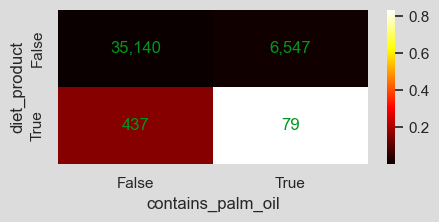

In [166]:
# select total column
freq_diet_6 = diet_oil.loc[:, ['Total']]

# select total line
freq_oil_6 = diet_oil.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_6 = freq_diet_6.dot(freq_oil_6) / n2
dist_calc_6 = (diet_oil - dist_theo_6) ** 2 / dist_theo_6
chi_2_6 = dist_calc_6.sum().sum()
dist_norm_6 = dist_calc_6/chi_2_6
sns.set(rc={'figure.figsize':(5,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
org_nutri_khi_2_6 = sns.heatmap(dist_norm_6.iloc[:-1, :-1], annot=diet_oil.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":sap})

plt.savefig("diet_oil_khi_2_6.png", bbox_inches='tight')

plt.show()

- We are trying to find out if the presence of palm oil in the product is independent of the light nature of the product. These 2 variables being qualitative, a chi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical to the theoretical frequencies expected for products whether they are light or not, i.e. the light nature of the product does not affect the palm oil content of the product; And
- H1 (alternative hypothesis): the palm oil content of the product depends on the light nature of the product, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [167]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
diet_oil_vals = diet_oil.loc[:, diet_oil.columns != 'Total'].drop(index=['Total'])
diet_oil_vals

contains_palm_oil  False  True
diet_product                  
False              35140  6547
True                 437    79

In [168]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_6, p1_6, dof1_6, expected1_6 = st.chi2_contingency(diet_oil_vals)
print("Khi-2:", round(stat1_6, 5))
print("p-value", p1_6)
print("Degrees of freedom:", dof1_6)
print("Theoretical Khi-2:", round(st.chi2.ppf(alpha, dof1_6), 4))
print("Theoretical distribution:\n", np.round(expected1_6, 0))
if p1_6 < alpha:
    print('Reject H0. Variables not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_6.tofile("effectifs_theoriques_diet_oil.csv", sep=','))

Khi-2: 0.03396
p-value 0.8537918658820869
Degrees of freedom: 1
Theoretical Khi-2: 0.0039
Theoretical distribution:
 [[35142.  6545.]
 [  435.    81.]]
Not enough information to reject H0.
None


- The khi-2 test does not allow us to conclude there exists a link between the fact that a product is called "diet" and its palm oil content.

In [169]:
# Calculate Cramer's V
min_dim_6 = min(diet_oil_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_6 = np.sqrt(chi_2_6/(n2 * min_dim_6))
print("Cramer's V:", round(c_v_6,2))
if c_v_6 > 0 and c_v_6 < 0.05:
    print("No or very weak relationship")
elif c_v_6 >= 0.05 and c_v_6 < 0.1:
    print("Weak relationship")
elif c_v_6 >= 0.1 and c_v_6 < 0.15:
    print("Moderate relationship")
elif c_v_6 >= 0.15 and c_v_6 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")


Cramer's V: 0.0
No or very weak relationship


- Cramer's V being equal to zero, it confirms the absence of a link between the two variables.

#### 6.4.1.7 - Diet products and nutriscore

In [170]:
# create contingency table for diet products and nutriscore (empirical distribution)
diet_nutri = pd.crosstab(food_facts_trim_final['diet_product'], food_facts_trim_final['nutrition_grade_fr'], 
                        margins=True, margins_name='Total')
diet_nutri

nutrition_grade_fr     A     B     C      D     E  Total
diet_product                                            
False               5841  5595  9068  12237  8946  41687
True                 149    83   160    106    18    516
Total               5990  5678  9228  12343  8964  42203

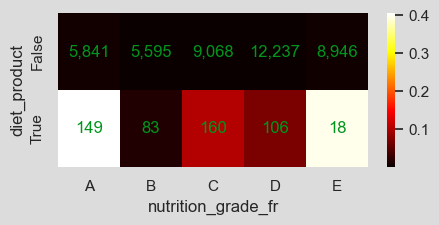

In [171]:
# select total column
freq_diet_7 = diet_nutri.loc[:, ['Total']]

# select total line
freq_nutri_7 = diet_nutri.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_7 = freq_diet_7.dot(freq_nutri_7) / n2
dist_calc_7 = (diet_nutri - dist_theo_7) ** 2 / dist_theo_7
chi_2_7 = dist_calc_7.sum().sum()
dist_norm_7 = dist_calc_7/chi_2_7
sns.set(rc={'figure.figsize':(5,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
org_nutri_khi_2_7 = sns.heatmap(dist_norm_7.iloc[:-1, :-1], annot=diet_nutri.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":sap})

plt.savefig("diet_nutri_khi_2_7.png", bbox_inches='tight')

plt.show()

- We seek to know if the nutriscore of the product is independent of its light character. These 2 variables being qualitative, a chi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical to the theoretical frequencies expected for products whether they are light or not, i.e. the light character of the product does not affect its nutriscore; And
- H1 (alternative hypothesis): the nutriscore of the product depends on its light character, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [172]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
diet_nutri_vals = diet_nutri.loc[:, diet_nutri.columns != 'Total'].drop(index=['Total'])
diet_nutri_vals

nutrition_grade_fr     A     B     C      D     E
diet_product                                     
False               5841  5595  9068  12237  8946
True                 149    83   160    106    18

In [173]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_7, p1_7, dof1_7, expected1_7 = st.chi2_contingency(diet_nutri_vals)
print("Khi-2:", round(stat1_7, 5))
print("p-value", p1_7)
print("Degrees of freedom:", dof1_7)
print("Theoretical Khi-2:", round(st.chi2.ppf(alpha, dof1_7), 4))
print("Theoretical distribition:\n", np.round(expected1_7, 0))
if p1_7 < alpha:
    print('Reject H0. Variables not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_7.tofile("effectifs_theoriques_diet_nutri.csv", sep=','))

Khi-2: 193.03525
p-value 1.1803520438499525e-40
Degrees of freedom: 4
Theoretical Khi-2: 0.7107
Theoretical distribition:
 [[ 5917.  5609.  9115. 12192.  8854.]
 [   73.    69.   113.   151.   110.]]
Reject H0. Variables not independant.
None


In [174]:
# Calculate Cramer's V
min_dim_7 = min(diet_nutri_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_7 = np.sqrt(chi_2_7/(n2 * min_dim_7))
print("Cramer's V:", round(c_v_7,2))
if c_v_7 > 0 and c_v_7 < 0.05:
    print("No or very weak relationship")
elif c_v_7 >= 0.05 and c_v_7 < 0.1:
    print("Weak relationship")
elif c_v_7 >= 0.1 and c_v_7 < 0.15:
    print("Moderate relationship")
elif c_v_7 >= 0.15 and c_v_7 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")

Cramer's V: 0.07
Weak relationship


- The khi-2 and its p-value make it possible to test the existence of a link between 2 qualitative variables but say nothing about the intensity of the link if it exists. We use Cramer's V to characterize this intensity.
- Cramer's V allows us to conclude that, although the differences between the qualitative variables light product and nutriscore are statistically significant, the dependence between these two variables is in fact moderate and (according to the heatmap) the products of the Creals & Potatoes and Composite Foods E and A contribute the most to this moderate non-independence.

#### 6.4.1.8 - Diet products and PNNS Groups 1

In [175]:
# create contingency table for diet products and nutriscore (empirical distribution)
diet_pnns = pd.crosstab(food_facts_trim_final['diet_product'], food_facts_trim_final['pnns_groups_1'], 
                        margins=True, margins_name='Total')
diet_pnns

pnns_groups_1  Beverages  Cereals and potatoes  Composite foods  \
diet_product                                                      
False               4489                  5821             4802   
True                  67                    84               21   
Total               4556                  5905             4823   

pnns_groups_1  Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
diet_product                                                           
False                    2393            4597                   1804   
True                       54               6                     90   
Total                    2447            4603                   1894   

pnns_groups_1  Milk and dairy products  Salty snacks  Sugary snacks  Total  
diet_product                                                                
False                             6591          2051           9139  41687  
True                                62            20            112    516  
Total                             6653          2071           9251  42203

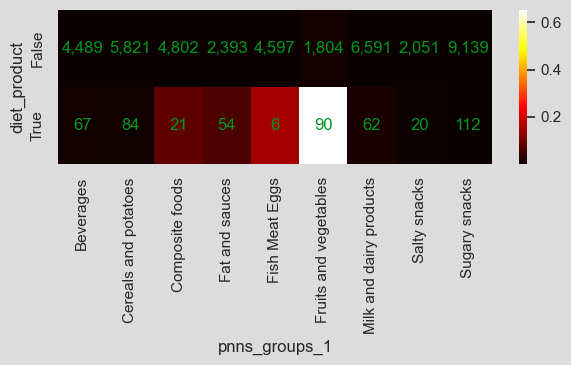

In [176]:
# select total column
freq_diet_8 = diet_pnns.loc[:, ['Total']]

# select total line
freq_pnns_8 = diet_pnns.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_8 = freq_diet_8.dot(freq_pnns_8) / n2
dist_calc_8 = (diet_pnns - dist_theo_8) ** 2 / dist_theo_8
chi_2_8 = dist_calc_8.sum().sum()
dist_norm_8 = dist_calc_8/chi_2_8
sns.set(rc={'figure.figsize':(7,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
org_nutri_khi_2_8 = sns.heatmap(dist_norm_8.iloc[:-1, :-1], annot=diet_pnns.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":sap})

plt.savefig("diet_pnns_khi_2_8.png", bbox_inches='tight')

plt.show()

- We seek to know whether the PNNS Group 1 of the product is independent of its lightweight nature. These 2 variables being qualitative, a chi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical to the theoretical frequencies expected for products whether they are light or not, i.e. the light character of the product does not affect its PNNS Group 1; And
- H1 (alternative hypothesis): the nutriscore of the product depends on its light character, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [177]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
diet_pnns_vals = diet_pnns.loc[:, diet_pnns.columns != 'Total'].drop(index=['Total'])
diet_pnns_vals

pnns_groups_1  Beverages  Cereals and potatoes  Composite foods  \
diet_product                                                      
False               4489                  5821             4802   
True                  67                    84               21   

pnns_groups_1  Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
diet_product                                                           
False                    2393            4597                   1804   
True                       54               6                     90   

pnns_groups_1  Milk and dairy products  Salty snacks  Sugary snacks  
diet_product                                                         
False                             6591          2051           9139  
True                                62            20            112

In [178]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_8, p1_8, dof1_8, expected1_8 = st.chi2_contingency(diet_pnns_vals)
print("Khi-2:", round(stat1_8, 5))
print("p-value", p1_8)
print("Degrees of freedom:", dof1_8)
print("Theoretical khi-2:", round(st.chi2.ppf(alpha, dof1_8), 4))
print("Theoretical distribution:\n", np.round(expected1_8, 0))
if p1_8 < alpha:
    print('Reject H0. Variables not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_8.tofile("effectifs_theoriques_diet_pnns.csv", sep=','))

Khi-2: 295.24832
p-value 4.224922864003663e-59
Degrees of freedom: 8
Theoretical khi-2: 2.7326
Theoretical distribution:
 [[4500. 5833. 4764. 2417. 4547. 1871. 6572. 2046. 9138.]
 [  56.   72.   59.   30.   56.   23.   81.   25.  113.]]
Reject H0. Variables not independant.
None


In [179]:
# Calculate Cramer's V
min_dim_8 = min(diet_pnns_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_8 = np.sqrt(chi_2_8/(n2 * min_dim_8))
print("Cramer's V:", round(c_v_8,2))
if c_v_8 > 0 and c_v_8 < 0.05:
    print("No or very weak relationship")
elif c_v_8 >= 0.05 and c_v_8 < 0.1:
    print("Weak relationship")
elif c_v_8 >= 0.1 and c_v_8 < 0.15:
    print("Moderate relationship")
elif c_v_8 >= 0.15 and c_v_8 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")

Cramer's V: 0.08
Weak relationship


- The khi-2 and its p-value make it possible to test the existence of a link between 2 qualitative variables but say nothing about the intensity of the link if it exists. We use Cramer's V to characterize this intensity.
- Cramer's V allows us to conclude that, although the differences between the qualitative variables light product and PNNS Group 1 are statistically significant, the dependence between these two variables is in fact weak and (according to the heatmap) the products of the groups Fruits & Vegetables and Fish, Meat & Eggs contribute the most to this moderate non-independence.

#### 6.4.1.9 - Can eat daily and additives

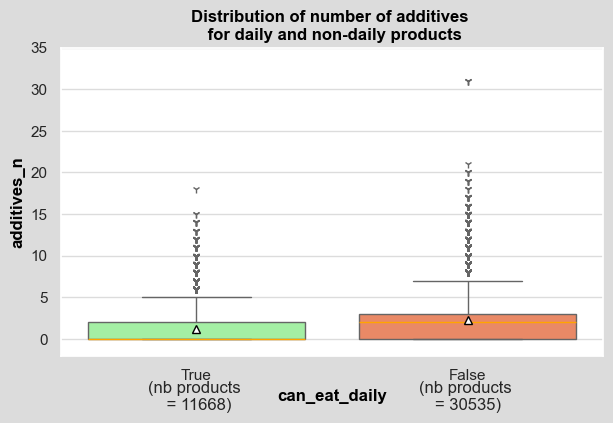

In [180]:
# plot distribution of 'additives_n' by 'can_eat_daily'
sns.set(rc={'figure.figsize':(7,4), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_score_daily = sns.boxplot(data=food_facts_trim_final, x="can_eat_daily",
                                       y="additives_n", hue="can_eat_daily", order=['True', 'False'],
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette=['coral','palegreen'], legend=False)
plt.ylim(-2, 35)
plt.xlabel("can_eat_daily", fontweight='bold', fontsize=12, color='black')
plt.ylabel("additives_n", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of number of additives \n for daily and non-daily products",fontweight='bold', fontsize=12,
          color='black')
plt.grid(axis='y', color='gainsboro')

# add number of products for each group
nb_products_5 = food_facts_trim_final.groupby('can_eat_daily')['code'].count().reset_index()
plt.text(0, -5,"(nb products \n = {})".format(nb_products_5.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -5,"(nb products \n= {})".format(nb_products_5.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.savefig("box_score_daily.png", bbox_inches='tight')
plt.show()

- It seems that the median number of additives contained in products with recommended daily consumption is not identical to that of conventional products. Let us verify this hypothesis by a statistical test. As we seek to analyze the relationship between a qualitative variable and a quantitative variable, but the number of additives is not distributed according to a normal law, the ANOVA test is not appropriate here and we will use the non-parametric test by Mann-Whitney.
- We set H0: the number of additives is the same for products for daily consumption or not, which we test against the alternative hypothesis H1 at the threshold α = 5%.

In [181]:
# perform Mann-Whitney U test
daily = food_facts_trim_final.loc[food_facts_trim_final['can_eat_daily']==True]['additives_n'].values
non_daily = food_facts_trim_final.loc[food_facts_trim_final['can_eat_daily']==False]['additives_n'].values
s_6419, p_6419 = st.mannwhitneyu(organic, regular, alternative='less', method='asymptotic')
print(s_6419)
print(p_6419)

19708726.0
6.811425128833423e-171


- The Mann-Whitney test leads to the conclusion that products recommended for daily consumption contain significantly fewer additives than products recommended for less frequent consumption.

#### 6.4.1.10 - Can Eat Daily and PNNS Groups 1

In [182]:
# create contingency table for diet products and nutriscore (empirical distribution)
ced_pnns = pd.crosstab(food_facts_trim_final['can_eat_daily'], food_facts_trim_final['pnns_groups_1'], 
                        margins=True, margins_name='Total')
ced_pnns

pnns_groups_1  Beverages  Cereals and potatoes  Composite foods  \
can_eat_daily                                                     
False               3888                  2204             2393   
True                 668                  3701             2430   
Total               4556                  5905             4823   

pnns_groups_1  Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
can_eat_daily                                                          
False                    2321            3535                    421   
True                      126            1068                   1473   
Total                    2447            4603                   1894   

pnns_groups_1  Milk and dairy products  Salty snacks  Sugary snacks  Total  
can_eat_daily                                                               
False                             4711          1972           9090  30535  
True                              1942            99            161  11668  
Total                             6653          2071           9251  42203

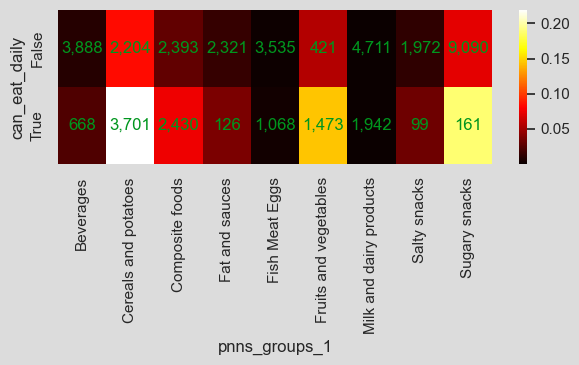

In [183]:
# select total column
freq_ced_10 = ced_pnns.loc[:, ['Total']]

# select total line
freq_pnns_10 = ced_pnns.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_10 = freq_ced_10.dot(freq_pnns_10) / n2
dist_calc_10 = (ced_pnns - dist_theo_10) ** 2 / dist_theo_10
chi_2_10 = dist_calc_10.sum().sum()
dist_norm_10 = dist_calc_10/chi_2_10
sns.set(rc={'figure.figsize':(7,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
org_nutri_khi_2_10 = sns.heatmap(dist_norm_10.iloc[:-1, :-1], annot=ced_pnns.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":sap})

plt.savefig("ced_pnns_khi_2_10.png", bbox_inches='tight')

plt.show()

- We seek to know whether the PNNS Group 1 of the product is independent of the recommended frequency of consumption of it. These 2 variables being qualitative, a chi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical to the theoretical frequencies expected for products whether they are for daily consumption or not, i.e. the frequency of consumption of the product does not affect its PNNS Group 1; And
- H1 (alternative hypothesis): the PNNS Groupr 1 of the product affects its frequency of consumption, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [184]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
ced_pnns_vals = ced_pnns.loc[:, ced_pnns.columns != 'Total'].drop(index=['Total'])
ced_pnns_vals

pnns_groups_1  Beverages  Cereals and potatoes  Composite foods  \
can_eat_daily                                                     
False               3888                  2204             2393   
True                 668                  3701             2430   

pnns_groups_1  Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
can_eat_daily                                                          
False                    2321            3535                    421   
True                      126            1068                   1473   

pnns_groups_1  Milk and dairy products  Salty snacks  Sugary snacks  
can_eat_daily                                                        
False                             4711          1972           9090  
True                              1942            99            161

In [185]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_10, p1_10, dof1_10, expected1_10 = st.chi2_contingency(ced_pnns_vals)
print("Khi-2:", round(stat1_10, 5))
print("p-value", p1_10)
print("Degrees of freedom:", dof1_10)
print("Theoretical khi-2:", round(st.chi2.ppf(alpha, dof1_10), 4))
print("Theoretical distribution:\n", np.round(expected1_10, 0))
if p1_10 < alpha:
    print('Reject H0. Variables not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_10.tofile("effectifs_theoriques_ced_pnns.csv", sep=','))

Khi-2: 11949.21375
p-value 0.0
Degrees of freedom: 8
Theoretical khi-2: 2.7326
Theoretical distribution:
 [[3296. 4272. 3490. 1770. 3330. 1370. 4814. 1498. 6693.]
 [1260. 1633. 1333.  677. 1273.  524. 1839.  573. 2558.]]
Reject H0. Variables not independant.
None


In [186]:
# Calculate Cramer's V
min_dim_10 = min(ced_pnns_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_10 = np.sqrt(chi_2_10/(n2 * min_dim_10))
print("Cramer's V:", round(c_v_10,2))
if c_v_10 > 0 and c_v_10 < 0.05:
    print("No or very weak relationship")
elif c_v_10 >= 0.05 and c_v_10 < 0.1:
    print("Weak relationship")
elif c_v_10 >= 0.1 and c_v_10 < 0.15:
    print("Moderate relationship")
elif c_v_10 >= 0.15 and c_v_10 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")


Cramer's V: 0.53
Very strong relationship


- The chi-square and its p-value make it possible to test the existence of a link between 2 qualitative variables but say nothing about the intensity of the link if it exists. We use Cramer's V to characterize this intensity.
- Cramer's V allows us to conclude that the dependence between the PNNS Group of the product and the fact that its daily consumption is recommended is in fact very strong and that (according to the heatmap) the products of the Creals & Potatoes and Fruits & Vegetables (and to a lesser extent Sugary Snacks) contribute the most to this strong non-independence.

#### 6.4.1.11 - Can Eat Daily and diet products

In [187]:
# create contingency table for diet products and nutriscore (empirical distribution)
ced_diet = pd.crosstab(food_facts_trim_final['can_eat_daily'], food_facts_trim_final['diet_product'], 
                        margins=True, margins_name='Total')
ced_diet

diet_product   False  True  Total
can_eat_daily                    
False          30251   284  30535
True           11436   232  11668
Total          41687   516  42203

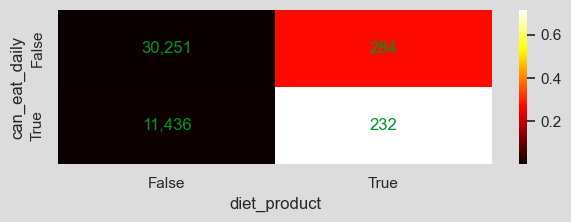

In [188]:
# select total column
freq_ced_11 = ced_diet.loc[:, ['Total']]

# select total line
freq_diet_11 = ced_diet.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_11 = freq_ced_11.dot(freq_diet_11) / n2
dist_calc_11 = (ced_diet - dist_theo_11) ** 2 / dist_theo_11
chi_2_11 = dist_calc_11.sum().sum()
dist_norm_11 = dist_calc_11/chi_2_11
sns.set(rc={'figure.figsize':(7,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
ced_diet_khi_2_11 = sns.heatmap(dist_norm_11.iloc[:-1, :-1], annot=ced_diet.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":sap})

plt.savefig("ced_diet_khi_2_11.png", bbox_inches='tight')

plt.show()

- We seek to know whether the recommended frequency of consumption of the product is independent of its low-fat nature. These 2 variables being qualitative, a chi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical to the theoretical frequencies expected for products whether they are low-fat or not, i.e. the low-fat nature of the product does not affect its recommended consumption frequency; And
- H1 (alternative hypothesis): the recommended frequency of consumption of the product depends on its light character, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [189]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
ced_diet_vals = ced_diet.loc[:, ced_diet.columns != 'Total'].drop(index=['Total'])
ced_diet_vals

diet_product   False  True
can_eat_daily             
False          30251   284
True           11436   232

In [190]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_11, p1_11, dof1_11, expected1_11 = st.chi2_contingency(ced_diet_vals)
print("Khi-2:", round(stat1_11, 5))
print("p-value", p1_11)
print("Degrees of freedom:", dof1_11)
print("Theoretical khi-2:", round(st.chi2.ppf(alpha, dof1_11), 4))
print("Theoretical distribution:\n", np.round(expected1_11, 0))
if p1_11 < alpha:
    print('Reject H0. Variables not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_11.tofile("effectifs_theoriques_ced_diet.csv", sep=','))

Khi-2: 77.41062
p-value 1.3886678698491222e-18
Degrees of freedom: 1
Theoretical khi-2: 0.0039
Theoretical distribution:
 [[30162.   373.]
 [11525.   143.]]
Reject H0. Variables not independant.
None


In [191]:
# Calculate Cramer's V
min_dim_11 = min(ced_diet_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_11 = np.sqrt(chi_2_11/(n2 * min_dim_11))
print("Cramer's V:", round(c_v_11,2))
if c_v_11 > 0 and c_v_11 < 0.05:
    print("No or very weak relationship")
elif c_v_11 >= 0.05 and c_v_11 < 0.1:
    print("Weak relationship")
elif c_v_11 >= 0.1 and c_v_11 < 0.15:
    print("Moderate relationship")
elif c_v_11 >= 0.15 and c_v_11 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")

Cramer's V: 0.04
No or very weak relationship


- The chi-square and its p-value make it possible to test the existence of a link between 2 qualitative variables but say nothing about the intensity of the link if it exists. We use Cramer's V to characterize this intensity.
- Cramer's V allows us to conclude that, although the differences between the qualitative variables low-fat product and recommended consumption frequency are statistically significant, the dependence between these two variables is in fact weak and (according to the heatmap) diet products contribute the most to this weak non-independence.

#### 6.4.1.12 - Can Eat Daily and palm oil

In [192]:
# create contingency table for diet products and nutriscore (empirical distribution)
ced_oil = pd.crosstab(food_facts_trim_final['can_eat_daily'], food_facts_trim_final['contains_palm_oil'], 
                        margins=True, margins_name='Total')
ced_oil

contains_palm_oil  False  True  Total
can_eat_daily                        
False              24765  5770  30535
True               10812   856  11668
Total              35577  6626  42203

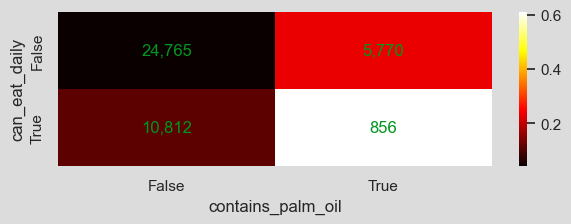

In [193]:
# select total column
freq_ced_12 = ced_oil.loc[:, ['Total']]

# select total line
freq_oil_12 = ced_oil.loc[['Total'], :]

# divide by number of observations to find theoretical distribution table
dist_theo_12 = freq_ced_12.dot(freq_oil_12) / n2
dist_calc_12 = (ced_oil - dist_theo_12) ** 2 / dist_theo_12
chi_2_12 = dist_calc_12.sum().sum()
dist_norm_12 = dist_calc_12/chi_2_12
sns.set(rc={'figure.figsize':(7,2),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
ced_oil_khi_2_12 = sns.heatmap(dist_norm_12.iloc[:-1, :-1], annot=ced_oil.iloc[:-1, :-1], cmap='hot', fmt=',d',
            annot_kws={"size": 12, "color":sap})

plt.savefig("ced_oil_khi_2_12.png", bbox_inches='tight')

plt.show()

- We seek to know whether the recommended frequency of consumption of the product is independent of its palm oil content. These 2 variables being qualitative, a chi-square contingency test is appropriate.
- We pose H0 (null hypothesis): the distribution of observations is identical to the theoretical frequencies expected for products whether they are for daily consumption or not, i.e. the palm oil content of the product does not affect its recommended consumption frequency ; And
- H1 (alternative hypothesis): the recommended frequency of consumption of the product depends on its palm oil content, i.e. the observed frequencies differ significantly from the expected theoretical frequencies.
- We also set α = 5%

In [194]:
# select data from crosstable without total line and total column (otherwise p-value calculation is wrong)
ced_oil_vals = ced_oil.loc[:, ced_oil.columns != 'Total'].drop(index=['Total'])
ced_oil_vals

contains_palm_oil  False  True
can_eat_daily                 
False              24765  5770
True               10812   856

In [195]:
# perform contingent chi2 test for H0: variables are independant and risk level alpha=5%
# alpha1_2 = 0.05
stat1_12, p1_12, dof1_12, expected1_12 = st.chi2_contingency(ced_oil_vals)
print("Khi-2:", round(stat1_12, 5))
print("p-value", p1_12)
print("Degrees of freedom:", dof1_12)
print("Theroretical khi-2:", round(st.chi2.ppf(alpha, dof1_12), 4))
print("Theoretical distribution:\n", np.round(expected1_12, 0))
if p1_12 < alpha:
    print('Reject H0. Variables not independant.')
else:
    print("Not enough information to reject H0.")
print(expected1_12.tofile("effectifs_theoriques_ced_oil.csv", sep=','))

Khi-2: 851.51198
p-value 3.4108246951027244e-187
Degrees of freedom: 1
Theroretical khi-2: 0.0039
Theoretical distribution:
 [[25741.  4794.]
 [ 9836.  1832.]]
Reject H0. Variables not independant.
None


In [196]:
# Calculate Cramer's V
min_dim_12 = min(ced_oil_vals.shape) - 1  #-1 if numpy array w/o totals, -2 otherwise (data dimension doesn't include totals)
c_v_12 = np.sqrt(chi_2_12/(n2 * min_dim_12))
print("Cramer's V:", round(c_v_12,2))
if c_v_12 > 0 and c_v_12 < 0.05:
    print("No or very weak relationship")
elif c_v_12 >= 0.05 and c_v_12 < 0.1:
    print("Weak relationship")
elif c_v_12 >= 0.1 and c_v_12 < 0.15:
    print("Moderate relationship")
elif c_v_12 >= 0.15 and c_v_12 < 0.25:
    print("Strong relationship")
else:
    print("Very strong relationship")

Cramer's V: 0.14
Moderate relationship


- The khi-2 and its p-value make it possible to test the existence of a link between 2 qualitative variables but say nothing about the intensity of the link if it exists. We use Cramer's V to characterize this intensity.
- Cramer's V allows us to conclude that, although the differences between the qualitative variables palm oil content and recommended consumption frequency are statistically significant, the dependence between these two variables is in fact moderate and (according to the heatmap) products containing palm oil contribute the most to this moderate non-independence.

## 6.4.2 - Nutriscore and sodium content anaysis

ANOVA is a statistical method used to analyze the differences among group means in a dataset. It assesses whether the means of two or more groups are significantly different from each other. ANOVA partitions the total variance in the data into different sources, including the variance within groups and the variance between groups.
After conducting the ANOVA test, we obtain an F-statistic and a p-value. The F-statistic measures the ratio of the variance between groups to the variance within groups, while the p-value indicates the probability of observing the data if the null hypothesis were true. A low p-value (< 0.05) suggests that there is significant evidence to reject the null hypothesis. Source : https://medium.com/@lomso.dzingwa/mastering-anova-analysis-of-variance-in-statistical-inference-a-practical-guide-with-python-fa9d0fcf09ff

### 6.4.2.1 - ANOVA on nutriscore and sodium content

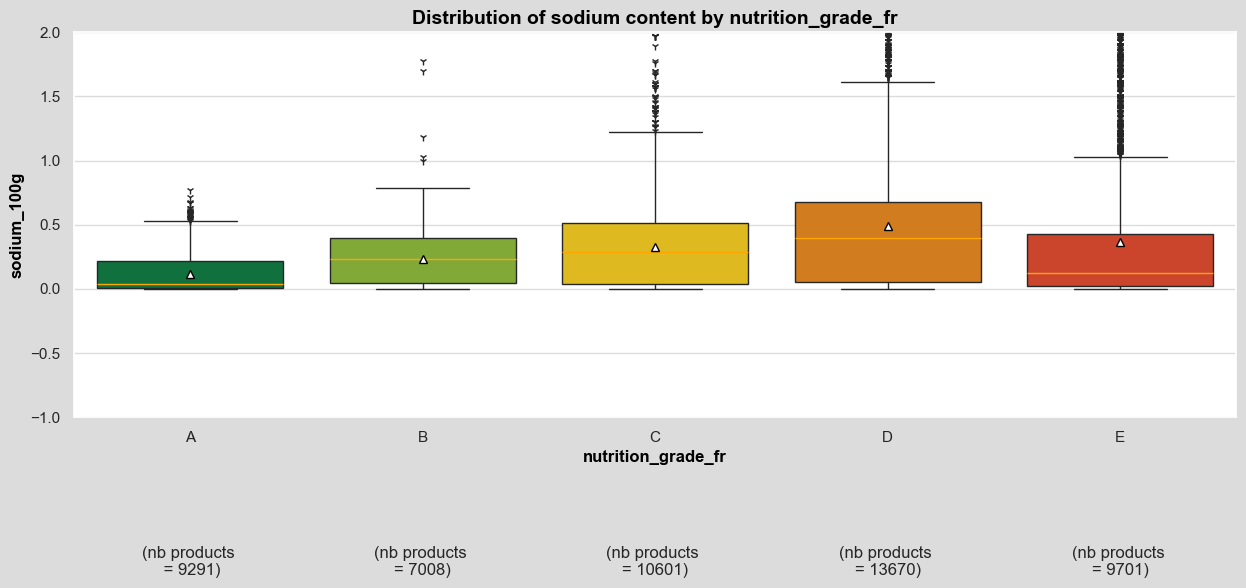

In [197]:
# plot distribution of 'nutrition-score-fr_100g' by 'nutrition_grade_fr'
sns.set(rc={'figure.figsize':(15,5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
box_score_sodium = sns.boxplot(data=food_facts_trim_final, x="nutrition_grade_fr",
                                       y="sodium_100g", hue="nutrition_grade_fr",
                       flierprops={"marker": "1"}, medianprops={"color" : "orange"}, 
                       meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, orient="v", color=zest,
                       showmeans=True, dodge=False, palette=nutri_palette, legend=False)
plt.ylim(-1, 2)
plt.xticks([0, 1, 2, 3, 4], ['A', 'B', 'C', 'D', 'E'])
plt.xlabel("nutrition_grade_fr", fontweight='bold', fontsize=12, color='black')
plt.ylabel("sodium_100g", fontweight='bold', fontsize=12, color='black')
plt.title("Distribution of sodium content by nutrition_grade_fr",fontweight='bold', fontsize=14, color='black')
plt.grid(axis='y', color='gainsboro')

# add number of countries for each income group
# nb_products_2 = food_facts_trim.groupby('nutrition_grade_fr')['code'].count().reset_index()
plt.text(0, -2,"(nb products \n = {})".format(nb_products_2.iloc[0, 1]), horizontalalignment='center',
         verticalalignment='top')  
plt.text(1, -2,"(nb products \n= {})".format(nb_products_2.iloc[1, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(2, -2,"(nb products \n= {})".format(nb_products_2.iloc[2, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(3, -2,"(nb products \n= {})".format(nb_products_2.iloc[3, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.text(4, -2,"(nb products \n= {})".format(nb_products_2.iloc[4, 1]), horizontalalignment='center',
         verticalalignment='top')
plt.savefig("box_score_sodium.png", bbox_inches='tight')
plt.show()

In [198]:
sod_A = food_facts_trim_final.loc[food_facts_trim_final['nutrition_grade_fr']=='A']['sodium_100g']
sod_B = food_facts_trim_final.loc[food_facts_trim_final['nutrition_grade_fr']=='B']['sodium_100g']
sod_C = food_facts_trim_final.loc[food_facts_trim_final['nutrition_grade_fr']=='C']['sodium_100g']
sod_D = food_facts_trim_final.loc[food_facts_trim_final['nutrition_grade_fr']=='D']['sodium_100g']
sod_E = food_facts_trim_final.loc[food_facts_trim_final['nutrition_grade_fr']=='E']['sodium_100g']

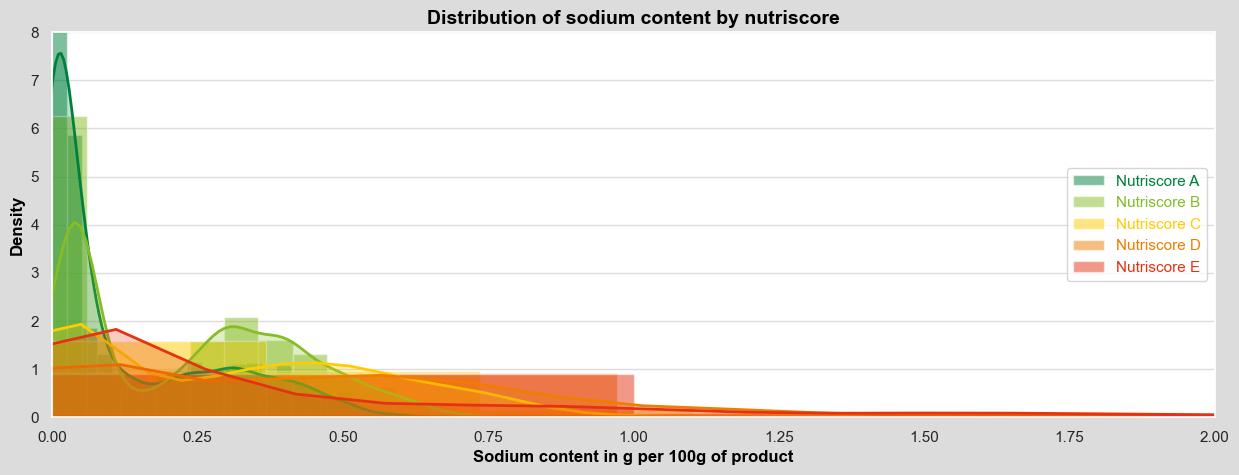

In [199]:
# plot distribution of sodium content by nutriscore
plt.figure(figsize=(15, 5))

plt.hist(sod_A, bins=30, density=True, alpha=0.5, color=col_A, label='Nutriscore A')
plt.hist(sod_B,  bins=30, density=True, alpha=0.5, color=col_B, label='Nutriscore B')
plt.hist(sod_C, bins=30, density=True, alpha=0.5, color=col_C, label='Nutriscore C')
plt.hist(sod_D, bins=30, density=True, alpha=0.5, color=col_D, label='Nutriscore D')
plt.hist(sod_E, bins=30, density=True, alpha=0.5, color=col_E, label='Nutriscore E')

sns.kdeplot(x=sod_A, fill=True, alpha=0.25, linewidth=2, color=col_A)
sns.kdeplot(x=sod_B, fill=True, alpha=0.25, linewidth=2, color=col_B)
sns.kdeplot(x=sod_C, fill=True, alpha=0.25, linewidth=2, color=col_C)
sns.kdeplot(x=sod_D, fill=True, alpha=0.25, linewidth=2, color=col_D)
sns.kdeplot(x=sod_E, fill=True, alpha=0.25, linewidth=2, color=col_E)

plt.xlabel('Sodium content in g per 100g of product', fontweight='bold', fontsize=12, color='black')
plt.ylabel('Density',fontweight='bold', fontsize=12, color='black')
plt.title('Distribution of sodium content by nutriscore', fontweight='bold', fontsize=14, color='black')
plt.legend(title='', labelcolor=[col_A, col_B, col_C, col_D, col_E], frameon=True, loc='center right')
plt.grid(axis='y', color='gainsboro')
plt.xlim([0, 2])
plt.ylim([0, 8])
plt.show()

**- ANOVA assumption 1 :** normality of distribution

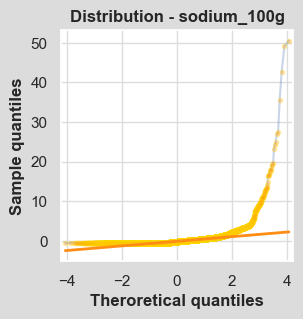

In [200]:
# analyse sodium content distribution with a QQ plot
fig, ax = plt.subplots(1, figsize=(3,3))
qq_sod = sm.qqplot(food_facts_trim_final['sodium_100g'], marker='.', markerfacecolor=zest,
                     markeredgecolor='gold', alpha=0.3, line="q", linestyle='solid', fit=True, ax=ax)
ax.get_lines()[1].set_color(zest)
ax.get_lines()[1].set_linewidth("2")
plt.xlabel("Theroretical quantiles", fontweight='bold', fontsize=12)
plt.ylabel("Sample quantiles", fontweight='bold', fontsize=12)
plt.title("Distribution - sodium_100g",fontweight='bold', fontsize=12)
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_sod.png", bbox_inches='tight')

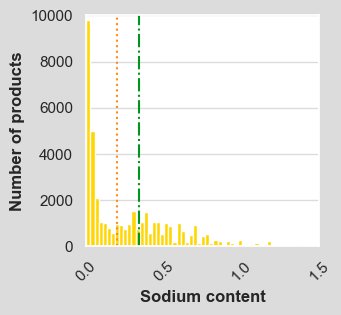

In [201]:
# analyse sodium content distribution with a histogram
sns.set(rc = {'figure.figsize':(3, 3), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
sod_hist = plt.hist(food_facts_trim_final['sodium_100g'], color='gold', bins='auto')
plt.xticks([0, 0.5, 1, 1.5], rotation=45)
plt.axvline(food_facts_trim_final['sodium_100g'].median(), color=zest, linestyle=':')
plt.axvline(food_facts_trim_final['sodium_100g'].mean(), color=sap, linestyle='-.')
plt.xlim([0, 1.5])
plt.ylim([0,10000])
plt.xlabel('Sodium content', fontweight='bold', fontsize='12')
plt.ylabel('Number of products', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("sod_hist.png", bbox_inches='tight')

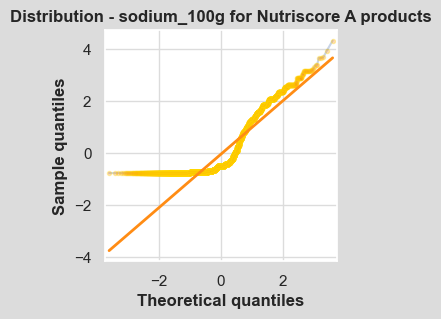

In [202]:
# analyse sodium content distribution with a QQ plot for products with nutriscore A
fig, ax = plt.subplots(1, figsize=(3,3))
qq_sod_A = sm.qqplot(sod_A, marker='.', markerfacecolor=zest, markeredgecolor='gold', alpha=0.3, line="q",
                     linestyle='solid', fit=True, ax=ax)
ax.get_lines()[1].set_color(zest)
ax.get_lines()[1].set_linewidth("2")
plt.xlabel("Theoretical quantiles", fontweight='bold', fontsize=12)
plt.ylabel("Sample quantiles", fontweight='bold', fontsize=12)
plt.title("Distribution - sodium_100g for Nutriscore A products",fontweight='bold', fontsize=12)
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_sod_A.png", bbox_inches='tight')

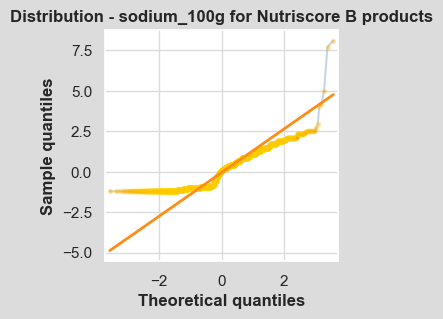

In [203]:
# analyse sodium content distribution with a QQ plot for products with nutriscore AB
fig, ax = plt.subplots(1, figsize=(3,3))
qq_sod_A = sm.qqplot(sod_B,
                     marker='.', markerfacecolor=zest,
                     markeredgecolor='gold', alpha=0.3, line="q", linestyle='solid', fit=True, ax=ax)
ax.get_lines()[1].set_color(zest)
ax.get_lines()[1].set_linewidth("2")
plt.xlabel("Theoretical quantiles", fontweight='bold', fontsize=12)
plt.ylabel("Sample quantiles", fontweight='bold', fontsize=12)
plt.title("Distribution - sodium_100g for Nutriscore B products",fontweight='bold', fontsize=12)
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_sod_B.png", bbox_inches='tight')

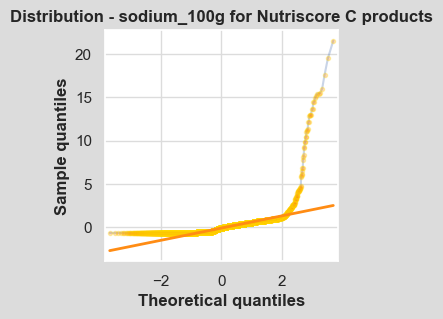

In [204]:
# analyse sodium content distribution with a QQ plot for products with nutriscore C
fig, ax = plt.subplots(1, figsize=(3,3))
qq_sod_A = sm.qqplot(sod_C,
                     marker='.', markerfacecolor=zest,
                     markeredgecolor='gold', alpha=0.3, line="q", linestyle='solid', fit=True, ax=ax)
ax.get_lines()[1].set_color(zest)
ax.get_lines()[1].set_linewidth("2")
plt.xlabel("Theoretical quantiles", fontweight='bold', fontsize=12)
plt.ylabel("Sample quantiles", fontweight='bold', fontsize=12)
plt.title("Distribution - sodium_100g for Nutriscore C products",fontweight='bold', fontsize=12)
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_sod_C.png", bbox_inches='tight')

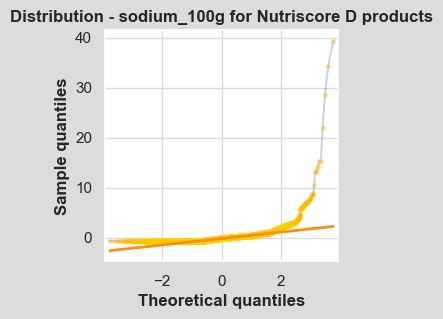

In [205]:
# analyse sodium content distribution with a QQ plot for products with nutriscore D
fig, ax = plt.subplots(1, figsize=(3,3))
qq_sod_A = sm.qqplot(sod_D,
                     marker='.', markerfacecolor=zest,
                     markeredgecolor='gold', alpha=0.3, line="q", linestyle='solid', fit=True, ax=ax)
ax.get_lines()[1].set_color(zest)
ax.get_lines()[1].set_linewidth("2")
plt.xlabel("Theoretical quantiles", fontweight='bold', fontsize=12)
plt.ylabel("Sample quantiles", fontweight='bold', fontsize=12)
plt.title("Distribution - sodium_100g for Nutriscore D products",fontweight='bold', fontsize=12)
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_sod_D.png", bbox_inches='tight')

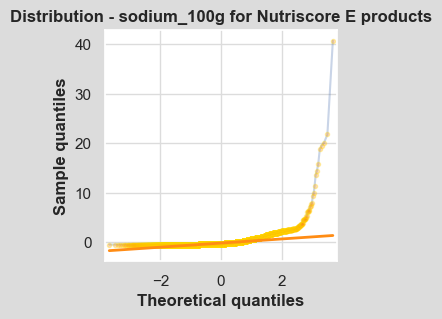

In [206]:
# analyse sodium content distribution with a QQ plot for products with nutriscore E
fig, ax = plt.subplots(1, figsize=(3,3))
qq_sod_A = sm.qqplot(sod_E,
                     marker='.', markerfacecolor=zest,
                     markeredgecolor='gold', alpha=0.3, line="q", linestyle='solid', fit=True, ax=ax)
ax.get_lines()[1].set_color(zest)
ax.get_lines()[1].set_linewidth("2")
plt.xlabel("Theoretical quantiles", fontweight='bold', fontsize=12)
plt.ylabel("Sample quantiles", fontweight='bold', fontsize=12)
plt.title("Distribution - sodium_100g for Nutriscore E products",fontweight='bold', fontsize=12)
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_sod_E.png", bbox_inches='tight')

- Normality hypothesis not verified by QQ Plots.

**- ANOVA assumption 2 :** homogeneity of variance

In [207]:
vars = food_facts_trim_final.groupby('nutrition_grade_fr')['sodium_100g'].std()
display(vars)
var_ratio = vars.max() / vars.min()
display(var_ratio)

nutrition_grade_fr
A    0.150749
B    0.190205
C    0.496272
D    0.727426
E    0.726991
Name: sodium_100g, dtype: float64

4.825424704260349

- The ratio of the largest to the smallest standard deviation is close to 5, i.e. more than the threshold of 2. The homogeneity of variance assumption is therefore not fullfilled. Confirm result with Levene test ;
- Levene's test is an alternative to the Bartlett test. The Levene test is less sensitive than the Bartlett test to departures from normality. If you have strong evidence that your data do in fact come from a normal, or nearly normal, distribution, then Bartlett's test has better performance;
- Levene’s test is used to assess the equality of variance between two different samples. For every case, it calculates the absolute difference between the value of that case and its cell mean and performs a one-way analysis of variance (ANOVA) on those differences. Assumptions of Levene’s Test : The samples from the populations under consideration are independent and the populations under consideration are approximately normally distributed. Source : https://www.geeksforgeeks.org/levenes-test/
- Levene's test assesses the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population. Source : https://en.wikipedia.org/wiki/Levene%27s_test

In [208]:
# perform Levene's test - Note : results are the same whether center is 'median' or 'trimmed'
# only the W statistics differs but the p-value remains zero in all 3 cases
alpha = 0.05
w_1, p_1 = st.levene(sod_A, sod_B, sod_C, sod_D, sod_E, center='mean')
print('W statistic :', w_1)
print('p-value :', round(p_1, 6))
 
if p_1 > alpha:
    print("Not enough information to reject the null hypothesis, the variance of the groups is homogenous.")
else:
    print("Reject the null hypothesis, the variance of the groups in not homogenous.")

W statistic : 469.55917056586605
p-value : 0.0
Reject the null hypothesis, the variance of the groups in not homogenous.


**- ANOVA assumption 3 :** independant observations

- In the absence of evidence to the contrary, we will consider this assumption is met.

**- ANOVA calculations :** 

In [209]:
# Perform one-way ANOVA with SciPy
f_2, p_2 = st.f_oneway(sod_A, sod_B, sod_C, sod_D, sod_E)

print("F statistic:", f_2)
print("p-value:", p_2)

F statistic: 501.4586195631717
p-value: 0.0


- The p-value is less than 0.05, therefore we would reject the null hypothesis and conclude that there is enough information to say that there exists a difference in the sodium content across the 5 nutriscore groups **IF THE 3 ANOVA ASSUMPTIONS WERE MET.** 

In [210]:
# Perform one-way ANOVA with StatsModels API
model = ols('sodium_100g ~ C(nutrition_grade_fr)', data=food_facts_trim_final).fit()
results = sm.stats.anova_lm(model)
print(results)

                            df       sum_sq     mean_sq          F  PR(>F)
C(nutrition_grade_fr)      4.0    659.85587  164.963967  501.45862     0.0
Residual               42198.0  13881.80246    0.328968        NaN     NaN


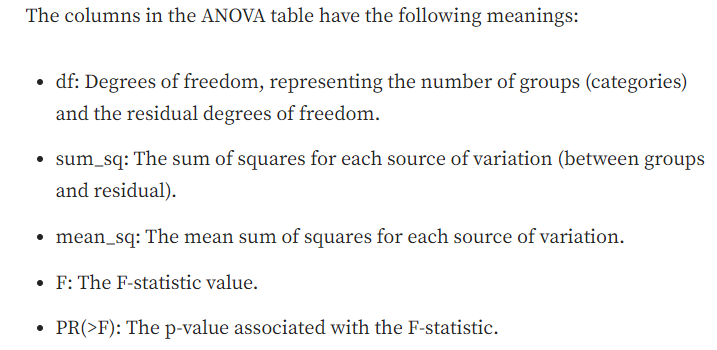

**- Quantify the differences : η² calculation** 

η² is a measure of effect size that is commonly used in ANOVA models. It measures the proportion of variance associated with each main effect and interaction effect in an ANOVA model. 
The formula is: η² = SSeffect / SStotal, where
SSeffect is the sums of squares for the effect being studied.
SStotal is the total sums of squares for all effects, errors and interactions in the ANOVA study.

In [211]:
# calculate η² method 1
sodium_data = food_facts_trim_final[['nutrition_grade_fr','sodium_100g']].copy()
sodium_data['sodium_sq'] = sodium_data['sodium_100g']**2
sodium_data.head()

nutrition_grade_fr  sodium_100g  sodium_sq
0                  C     0.850000   0.722500
1                  C     0.255000   0.065025
2                  B     0.196000   0.038416
3                  E     0.035433   0.001256
4                  C     0.078700   0.006194

In [212]:
sodium_stats = sodium_data.groupby('nutrition_grade_fr').agg({'nutrition_grade_fr': 'count','sodium_100g': ['sum', 'mean'],
                                                      'sodium_sq': ['sum', 'mean']}).reset_index()
sodium_stats

nutrition_grade_fr         sodium_100g              sodium_sq          
                      count          sum      mean          sum      mean
0                  A   5990   696.057515  0.116203   216.985022  0.036225
1                  B   5678  1307.518310  0.230278   506.474056  0.089199
2                  C   9228  3036.982897  0.329105  3271.965845  0.354569
3                  D  12343  6074.459859  0.492138  9520.225181  0.771306
4                  E   8964  3253.288970  0.362928  5917.799376  0.660174

In [213]:
N = sodium_stats[('nutrition_grade_fr', 'count')].sum()

# this is equivalent to Y = my_data['sodium_sq'].sum()
Y = sodium_stats[('sodium_sq','sum')].sum()
sodium_stats['A_i'] = (sodium_stats[('sodium_100g','mean')]**2) * sodium_stats[('nutrition_grade_fr', 'count')]
A = sodium_stats['A_i'].sum()
T = (sodium_data['sodium_100g'].mean()**2) * N

SSW = Y - A
SSB = A - T
SST = Y - T

eta_sq = SSB / SST

print('Y =', round(Y,2))
print('A =', round(A,2))
print('T =',  round(T,2))
print('Sum on squares within =',  round(SSW,2))
print('Sum of squares between =',  round(SSB,2))
print('Total sum of squares =',  round(SST,2))
print('η² =', round(eta_sq,6))

Y = 19433.45
A = 5551.65
T = 4891.79
Sum on squares within = 13881.8
Sum of squares between = 659.86
Total sum of squares = 14541.66
η² = 0.045377


In [214]:
# calculate η² method 2 : detailed calculation

In [215]:
# calculate SSW
A_mean = sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'A']['sodium_100g'].mean()
B_mean = sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'B']['sodium_100g'].mean()
C_mean = sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'C']['sodium_100g'].mean()
D_mean = sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'D']['sodium_100g'].mean()
E_mean = sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'E']['sodium_100g'].mean()


sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'A', 'sq_mean_dist'] = (sodium_data['sodium_100g'] - A_mean)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'B', 'sq_mean_dist'] = (sodium_data['sodium_100g'] - B_mean)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'C', 'sq_mean_dist'] = (sodium_data['sodium_100g'] - C_mean)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'D', 'sq_mean_dist'] = (sodium_data['sodium_100g'] - D_mean)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'E', 'sq_mean_dist'] = (sodium_data['sodium_100g'] - E_mean)**2

SSW = round(sodium_data['sq_mean_dist'].sum(), 2)
print("Sum of squares within:", SSW)

Sum of squares within: 13881.8


In [216]:
# calculate SSB
grand_mean_sod = sodium_data['sodium_100g'].mean()

sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'A', 'sq_gd_mean_dist'] = (A_mean - grand_mean_sod)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'B', 'sq_gd_mean_dist'] = (B_mean - grand_mean_sod)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'C', 'sq_gd_mean_dist'] = (C_mean - grand_mean_sod)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'D', 'sq_gd_mean_dist'] = (D_mean - grand_mean_sod)**2
sodium_data.loc[sodium_data['nutrition_grade_fr'] == 'E', 'sq_gd_mean_dist'] = (E_mean - grand_mean_sod)**2

SSB = round(sodium_data['sq_gd_mean_dist'].sum(), 2)
print("Sum of squares between:", SSB)
SST = SSW + SSB
print("Total sum of squares:", SST)
eta_sq_2 = round(SSB / SST, 6)
print('η² =', round(eta_sq_2,6))

Sum of squares between: 659.86
Total sum of squares: 14541.66
η² = 0.045377


In [217]:
# calculate η² method 3 : using StatsModels API ANOVA table results
def anova_table(res):
    res['mean_sq'] = res[:]['sum_sq']/res[:]['df']
    res['eta_sq'] = res[:-1]['sum_sq']/sum(res['sum_sq'])
    res['omega_sq'] = (res[:-1]['sum_sq']-(res[:-1]['df']*res['mean_sq'][-1]))/(sum(res['sum_sq'])+res['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    res = res[cols]
    return res

anova_table(results)

sum_sq       df     mean_sq          F  PR(>F)  \
C(nutrition_grade_fr)    659.85587      4.0  164.963967  501.45862     0.0   
Residual               13881.80246  42198.0    0.328968        NaN     NaN   

                         eta_sq  omega_sq  
C(nutrition_grade_fr)  0.045377  0.045285  
Residual                    NaN       NaN

In [218]:
eta_sq = results['sum_sq'][0]/(results['sum_sq'][0]+results['sum_sq'][1])
eta_sq

0.04537693396801381

- All three calculations are consistent and point to an overall small effect size for the characteristic studied (nutriscore).

### 6.4.2.2 - Kruskal-Wallis test on nutriscore and sodium content

- It seems that the median sodium content is not identical among our 5 nutriscores. Let us verify this hypothesis by a statistical test. As we seek to analyze the relationship between a qualitative variable and a quantitative variable, but the sodium content is not distributed according to a normal law, the ANOVA test is not appropriate here and we will use the non-parametric test of Kruskal-Wallis, which is a generalization of the Mann-Whitney test to more than 2 populations (the populations here being the sodium content of our product groups in each nutriscore).
- We set H0: the median sodium content is the same for all nutriscores, which we test against the alternative hypothesis H1: the median sodium content of at least one nutriscore is different from that of the 4 others, at a threshold α = 5%.

In [219]:
groupednumbers6422 = {grp6422: sodium_data['sodium_100g'][sodium_data['nutrition_grade_fr']==grp6422
                                                           ].values for grp6422 in sorted(sodium_data['nutrition_grade_fr'
                                                                                                     ].unique())}
args6422 = groupednumbers6422.values()
args6422 = [groupednumbers6422[grp6422] for grp6422 in sorted(sodium_data['nutrition_grade_fr'].unique())]
stat6422, p6422 = st.kruskal(*args6422)
print("Stat:", stat6422)
print("p-value:", "{:e}".format(p6422))

Stat: 3789.4503984452213
p-value: 0.000000e+00


In [220]:
sorted(sodium_data['nutrition_grade_fr'].unique())

['A', 'B', 'C', 'D', 'E']

- We therefore reject H0: at least one group of products has an average sodium content different from the 4 others. Let's apply Dunn's post-hoc test to determine which one(s).

In [221]:
# perform Dunn's post-hoc test to see which nutriscore group(s) differ
args6422[0] = args6422[0].tolist()
args6422[1] = args6422[1].tolist()
args6422[2] = args6422[2].tolist()
args6422[3] = args6422[3].tolist()
args6422[4] = args6422[4].tolist()
data6422 = [args6422[0], args6422[1], args6422[2],  args6422[3], args6422[4]]
dunn6422 = sp.posthoc_dunn(data6422, p_adjust=None, sort=False)
df6422 = pd.DataFrame(data=dunn6422.values, index=sorted(sodium_data['nutrition_grade_fr'].unique()),
                      columns=sorted(sodium_data['nutrition_grade_fr'].unique()))
print(df6422.to_csv("dunn6422.csv", index=False))
df6422

None


A              B             C              D              E
A   1.000000e+00  2.092099e-201  0.000000e+00   0.000000e+00  1.232736e-219
B  2.092099e-201   1.000000e+00  9.030128e-11  3.517201e-132   5.229128e-02
C   0.000000e+00   9.030128e-11  1.000000e+00   6.024807e-94   8.611896e-22
D   0.000000e+00  3.517201e-132  6.024807e-94   1.000000e+00  3.415926e-206
E  1.232736e-219   5.229128e-02  8.611896e-22  3.415926e-206   1.000000e+00

- The Dunn test giving p-values ​​for all the differences between the nutriscores very close to zero except for nutriscores B and E, we can conclude that all our nutriscores, except nutriscores B and E, have medians of the content in sodium different at the threshold α = 5%.